# Problem Set 2

### Question 1 : I will perform an extensive exploratory data analysis below

##### Research Question: I want to investigate the relationship between the annual salary of police officers and their sex, race, job title, experience years, and age using the Dallas Police Department Data.
##### Data Sources: Dallas Police Department
##### Data Loading: Done below
##### Summary Statistics: Done below
##### Key Variable Distributions: Done below
##### Covariates: Done below

In [ ]:
# !pip install --upgrade scipy
# !pip install --upgrade pmdarima
# !pip install --upgrade streamlit

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing packages and library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
plt.figure(figsize=(20, 10))
sns.set(rc={'figure.figsize':(20, 10)})

# Loading data
police_hr = "/content/gdrive/My Drive/Colab Notebooks/police_hr.xlsx"
df=pd.read_excel(police_hr)
# I won't show the data here as it contains police names.

<Figure size 2000x1000 with 0 Axes>

In [ ]:
df.shape

(3167, 10)

In [ ]:
# Checking for missing values
df.isna().sum()

Employee Name          0
Dept Short Desc        0
State Jobcode Descr    0
FUNC Jobcode Descr     0
Annual                 0
Sex                    0
Age                    0
Race                   0
Hire Dt                0
ID Number              0
dtype: int64

In [ ]:
df.dtypes

Employee Name                  object
Dept Short Desc                object
State Jobcode Descr            object
FUNC Jobcode Descr             object
Annual                        float64
Sex                            object
Age                             int64
Race                           object
Hire Dt                datetime64[ns]
ID Number                       int64
dtype: object

In [ ]:
# Renaming my variables
df = df.rename(columns={'Annual':'Annual_salary','Employee Name':'Employee_name','Dept Short Desc':'Short_desc','State Jobcode Descr':'Job_title','FUNC Jobcode Descr':'Job_function','Hire Dt':'Hire_date','ID Number':'Id_no'})

In [ ]:
# Summary statistics
df.describe()

Annual_salary          Age         Id_no
count    3167.000000  3167.000000   3167.000000
mean    67051.435908    37.316072  12859.723398
std     12985.790152     9.915126   2537.300323
min     44082.000000    21.000000   1345.000000
25%     53241.960000    29.000000  11360.500000
50%     64918.920000    35.000000  13812.000000
75%     75967.920000    45.000000  14826.500000
max    198164.040000    74.000000  15689.000000

In [ ]:
df.columns

Index(['Employee_name', 'Short_desc', 'Job_title', 'Job_function',
       'Annual_salary', 'Sex', 'Age', 'Race', 'Hire_date', 'Id_no'],
      dtype='object')

In [ ]:
# Drop the 'Employee Name' column for data privacy reasons
df = df.drop(columns=['Employee_name', 'Short_desc'])


In [ ]:
# Rearrange the columns to make 'Id_no' the first column
df = df[['Id_no', 'Job_title', 'Job_function', 'Annual_salary', 'Sex', 'Age', 'Race', 'Hire_date']]

# Sort the DataFrame by 'Id_no' in ascending order
df = df.sort_values(by='Id_no', ascending=True)

# Optional: Reset the index if needed
df.reset_index(drop=True, inplace=True)

In [ ]:
df

Id_no                Job_title                 Job_function  \
0      1345                  Trooper       Highway Patrol Trooper   
1      2749                 Corporal      Highway Patrol Corporal   
2      3004                  Trooper                  CVE Trooper   
3      3183                  Trooper                  CVE Trooper   
4      3374  Sergeant, Public Safety  Training Technical Sergeant   
...     ...                      ...                          ...   
3162  15685     Probationary Trooper         Probationary Trooper   
3163  15686     Probationary Trooper         Probationary Trooper   
3164  15687     Probationary Trooper         Probationary Trooper   
3165  15688     Probationary Trooper         Probationary Trooper   
3166  15689     Probationary Trooper         Probationary Trooper   

      Annual_salary Sex  Age   Race  Hire_date  
0          79323.00   M   74  WHITE 2002-10-01  
1          69540.96   M   34  BLACK 2007-08-20  
2          79323.00   M   69  WHITE 2002-10-01  
3          79323.00   M   71  WHITE 2003-10-01  
4          86494.92   M   68  WHITE 2002-08-01  
...             ...  ..  ...    ...        ...  
3162       44082.00   M   30  WHITE 2018-06-03  
3163       44082.00   M   23  BLACK 2018-06-03  
3164       44082.00   F   22  HISPA 2018-06-03  
3165       44082.00   M   24  BLACK 2018-06-03  
3166       44082.00   M   26  HISPA 2018-06-03  

[3167 rows x 8 columns]

In [ ]:
# I want to check values in each variable

for column in df:
    unique_vals = np.unique(df[column])
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for variable {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for variable {} :{}'.format(column, nr_values))

The number of values for variable Id_no :3165
The number of values for variable Job_title :10
The number of values for variable Job_function :22
The number of values for variable Annual_salary :24
The number of values for variable Sex :2 -- ['F' 'M']
The number of values for variable Age :52
The number of values for variable Race :5 -- ['AMIND' 'ASIAN' 'BLACK' 'HISPA' 'WHITE']
The number of values for variable Hire_date :308


In [ ]:
df.columns

Index(['Id_no', 'Job_title', 'Job_function', 'Annual_salary', 'Sex', 'Age',
       'Race', 'Hire_date'],
      dtype='object')

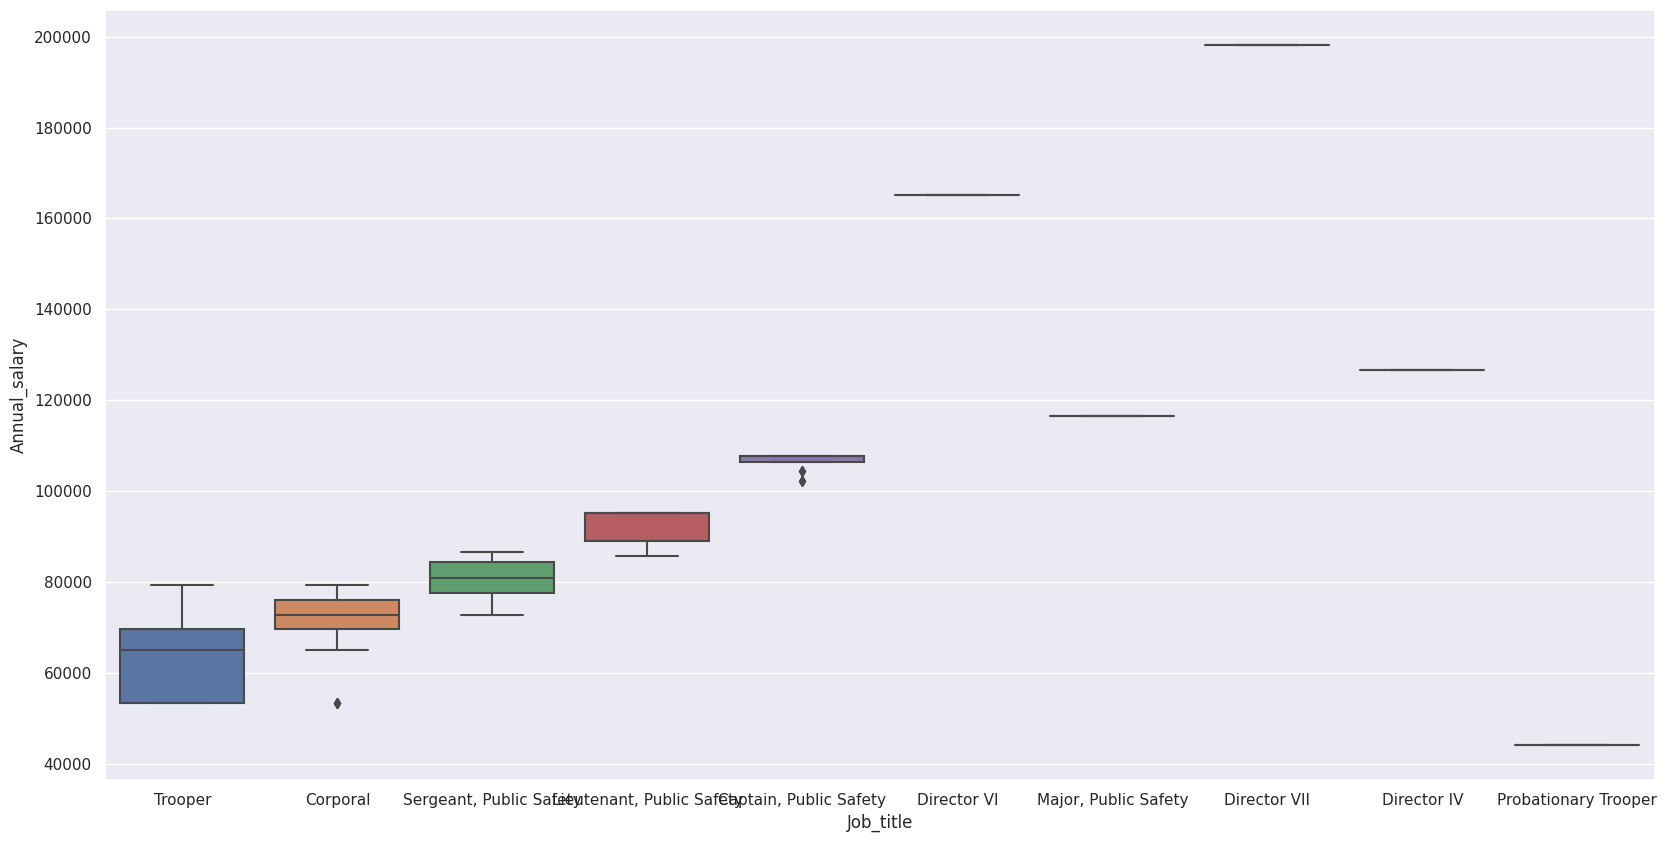

In [ ]:
# Investigate unique values
ax = sns.boxplot(x = 'Job_title', y = 'Annual_salary', data = df)

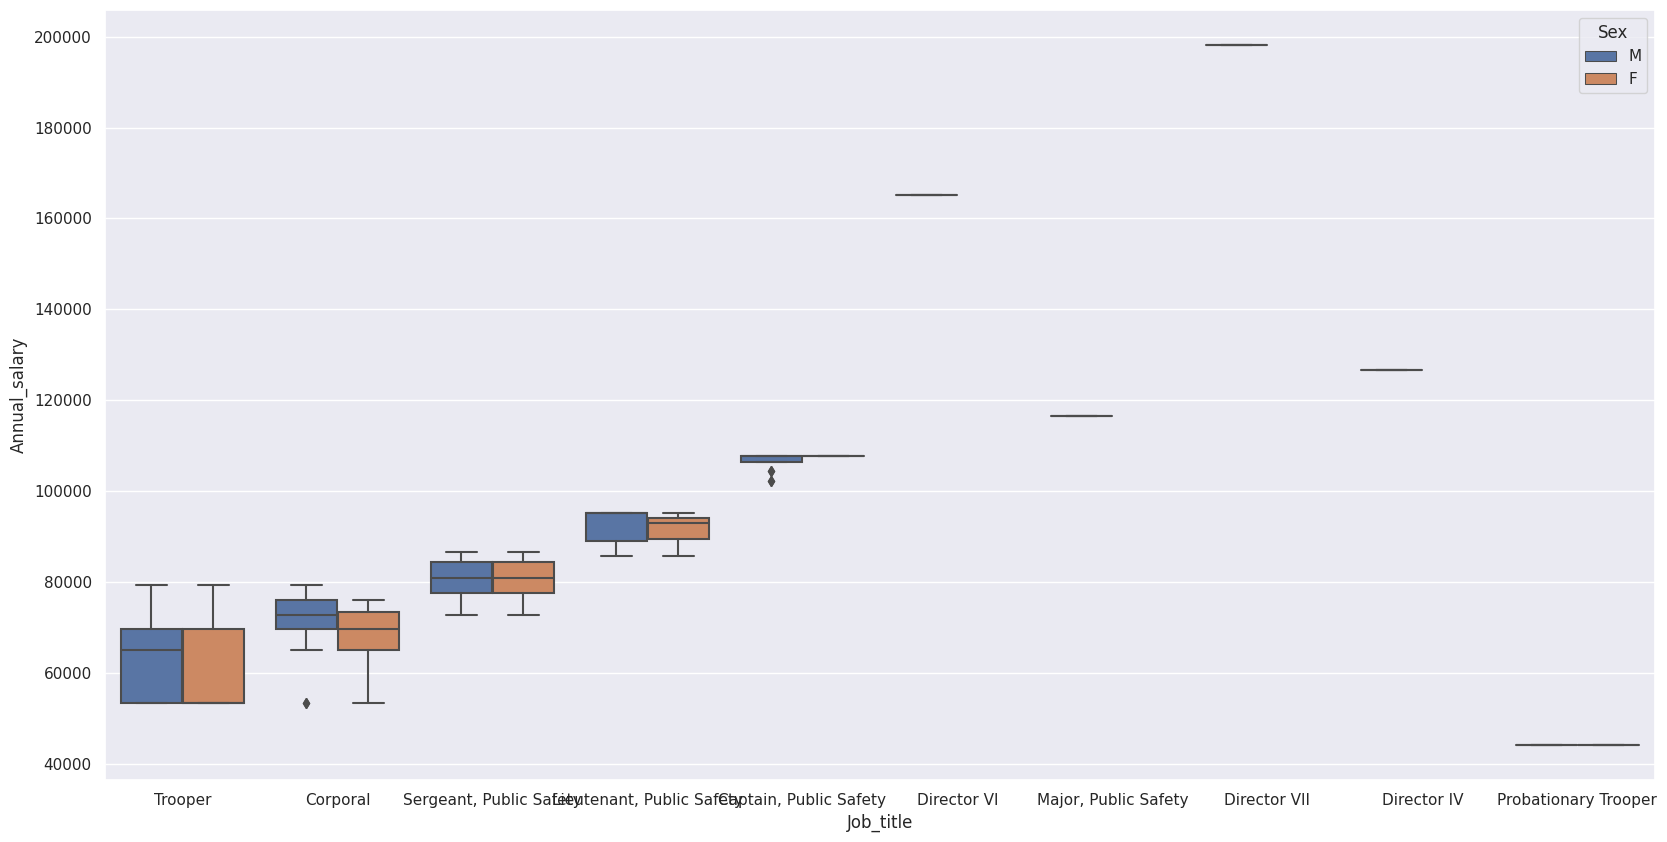

In [ ]:
# Investigate unique values
ax = sns.boxplot(x = 'Job_title', y = 'Annual_salary', data = df, hue = 'Sex')

In [ ]:
df['Date'] = '01-Jan-2021'
df['Date']= pd.to_datetime(df['Date'])
df['Hire_date']= pd.to_datetime(df['Hire_date'])
df['Experience'] = df['Date'] - df['Hire_date']
df['Experience'] = df['Experience']
#changing experience in days to years
df['Experience_years'] = pd.to_timedelta(df.Experience, unit='D') / np.timedelta64(1,'Y')

In [ ]:
df.columns

Index(['Id_no', 'Job_title', 'Job_function', 'Annual_salary', 'Sex', 'Age',
       'Race', 'Hire_date', 'Date', 'Experience', 'Experience_years'],
      dtype='object')

In [ ]:
df['Date']

0      2021-01-01
1      2021-01-01
2      2021-01-01
3      2021-01-01
4      2021-01-01
          ...    
3162   2021-01-01
3163   2021-01-01
3164   2021-01-01
3165   2021-01-01
3166   2021-01-01
Name: Date, Length: 3167, dtype: datetime64[ns]

The meadian is:  64918.92


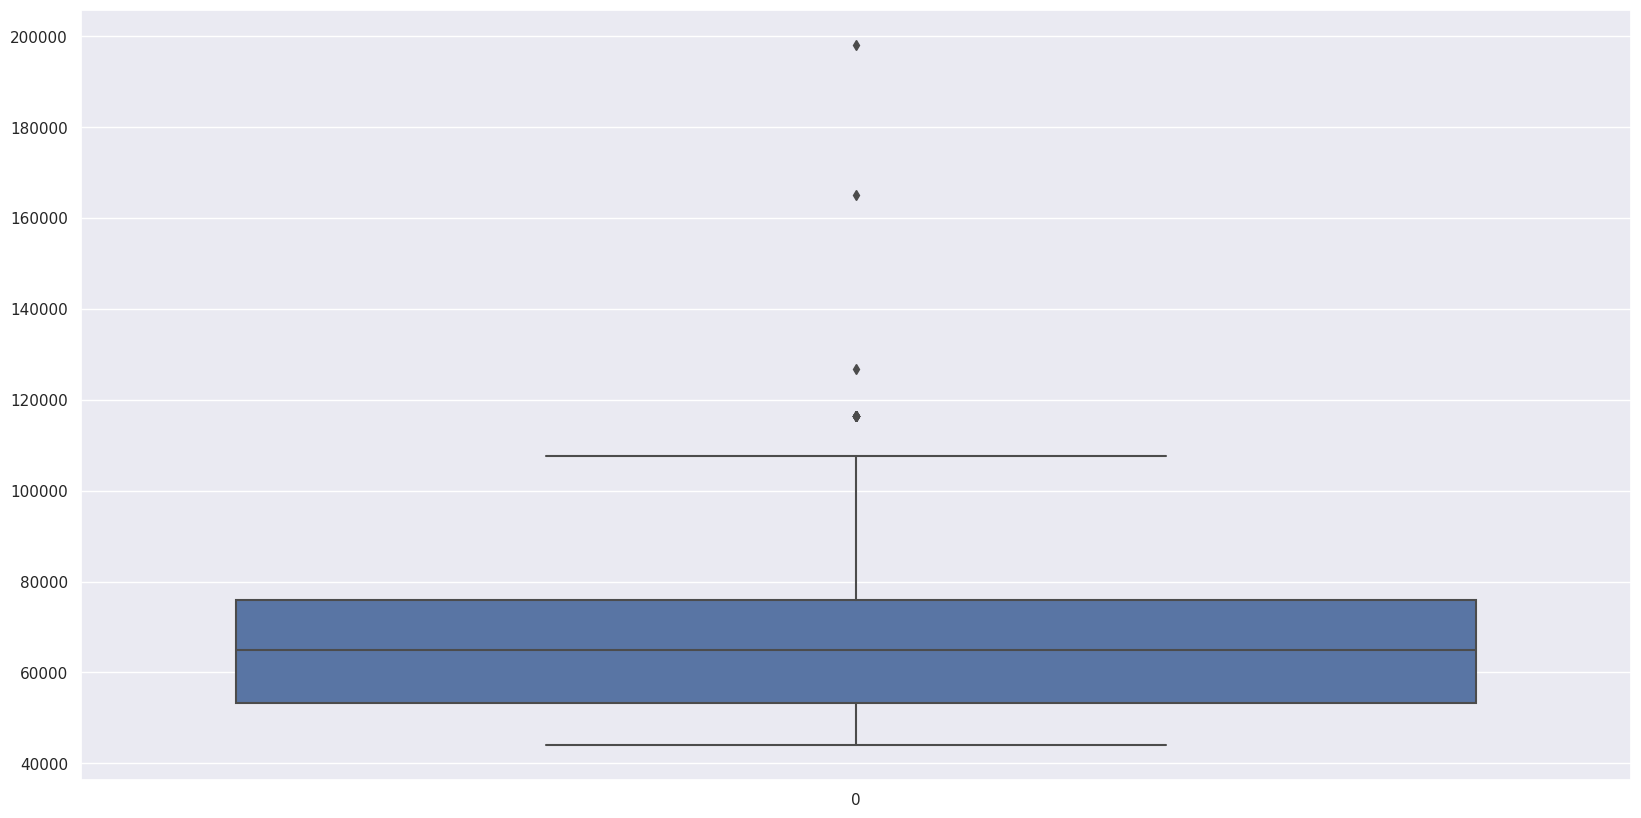

In [ ]:
# Checking for outliers

x = df['Annual_salary'].values

ax = sns.boxplot(x)

print('The meadian is: ', df['Annual_salary'].median())

In [ ]:
# The directors' salaries are the outliers, but if I delete them the data will have no directors

df[df['Annual_salary']>120000]

Id_no     Job_title             Job_function  Annual_salary Sex  Age  \
67    6066   Director VI     Assistant Chief, THP      165136.68   M   59   
99    6880  Director VII               Chief, THP      198164.04   M   50   
202   8342   Director IV  Major THP Chief's Staff      126714.60   M   54   

      Race  Hire_date       Date Experience  Experience_years  
67   WHITE 1985-01-09 2021-01-01 13141 days         35.978836  
99   WHITE 1989-09-12 2021-01-01 11434 days         31.305229  
202  WHITE 1995-02-21 2021-01-01  9446 days         25.862270

In [ ]:
# Checking to see that we have just 3 directors
df[['Id_no','Job_title']].groupby('Job_title').count()

Id_no
Job_title                       
Captain, Public Safety        29
Corporal                     233
Director IV                    1
Director VI                    1
Director VII                   1
Lieutenant, Public Safety     83
Major, Public Safety          12
Probationary Trooper         150
Sergeant, Public Safety      368
Trooper                     2289

The meadian is:  8.936528470810488


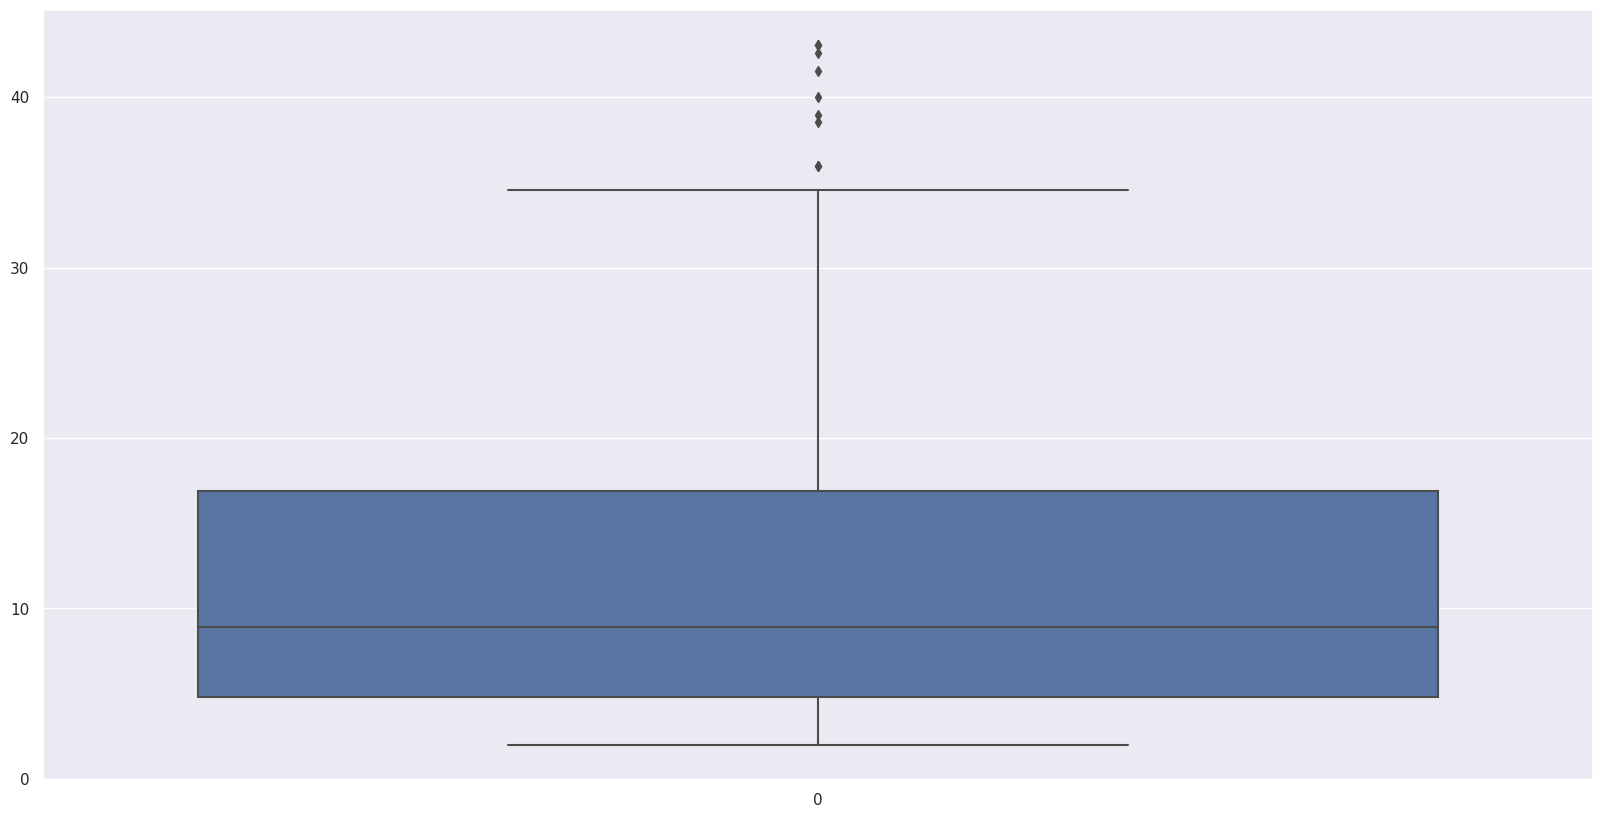

In [ ]:
# Let's see why we have only 3 directors or what makes a director. Experience?

x = df['Experience_years'].values
x
ax = sns.boxplot(x)

print('The meadian is: ', df['Experience_years'].median())

In [ ]:
df[df['Experience_years']>36]
# So it seems the directors aren't among the most experienced

Id_no                  Job_title               Job_function  \
20   4464                    Trooper     Highway Patrol Trooper   
21   4504  Lieutenant, Public Safety  Highway Patrol Lieutenant   
23   4570                    Trooper                CVE Trooper   
31   4780                    Trooper                CVE Trooper   
33   4879  Lieutenant, Public Safety             CVE Lieutenant   
46   5342                    Trooper     Highway Patrol Trooper   
56   5610                   Corporal    Highway Patrol Corporal   

    Annual_salary Sex  Age   Race  Hire_date       Date Experience  \
20       79323.00   M   65  HISPA 1977-12-07 2021-01-01 15731 days   
21       95191.92   M   63  WHITE 1977-12-07 2021-01-01 15731 days   
23       79323.00   M   62  WHITE 1978-05-24 2021-01-01 15563 days   
31       79323.00   M   60  HISPA 1979-06-13 2021-01-01 15178 days   
33       95191.92   M   64  HISPA 1981-01-01 2021-01-01 14610 days   
46       79323.00   M   62  BLACK 1982-01-13 2021-01-01 14233 days   
56       79323.00   M   56  HISPA 1982-06-09 2021-01-01 14086 days   

    Experience_years  
20         43.070015  
21         43.070015  
23         42.610047  
31         41.555953  
33         40.000821  
46         38.968630  
56         38.566158

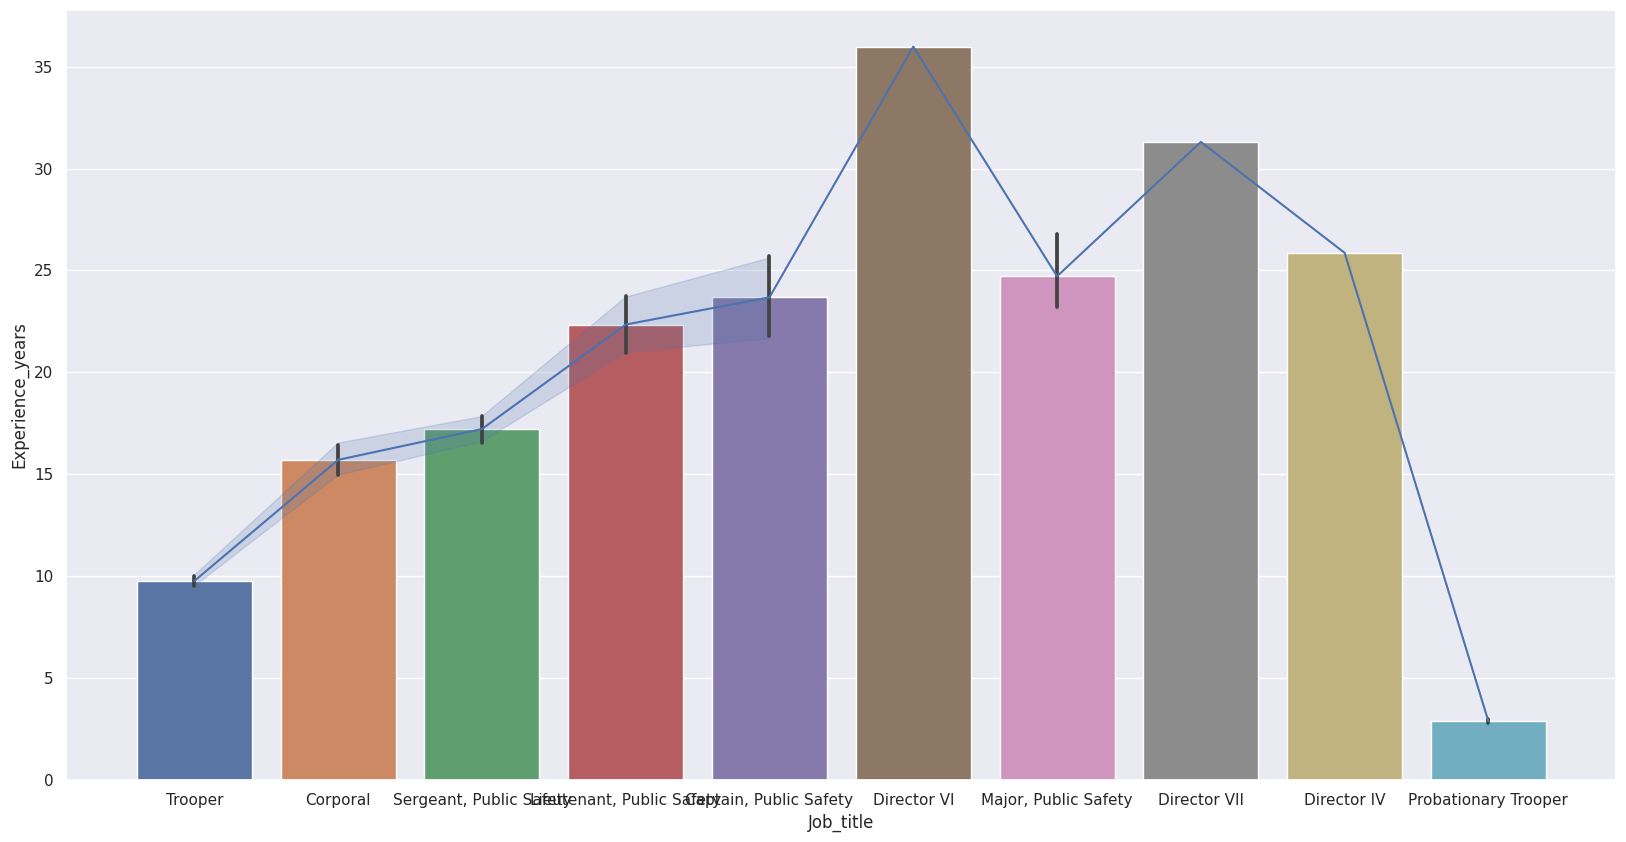

In [ ]:
# Let's plot experience by job title then
ax = sns.barplot(x="Job_title", y="Experience_years", data=df)

# The barplot shows average, so it shows the 3 directors as the most experienced because there is one of each
ax = sns.lineplot(x="Job_title", y="Experience_years", data=df)

In [ ]:
# Calculating the maximum experience for each job title
#df[['Job_title', 'Experience_years']].groupby('Job_title', as_index = True).agg({'Experience_years':'max'})
u = pd.DataFrame(df[['Job_title', 'Experience_years']].groupby('Job_title', as_index = True).max())
u

Experience_years
Job_title                                  
Captain, Public Safety            35.978836
Corporal                          38.566158
Director IV                       25.862270
Director VI                       35.978836
Director VII                      31.305229
Lieutenant, Public Safety         43.070015
Major, Public Safety              34.560600
Probationary Trooper               8.670951
Sergeant, Public Safety           34.560600
Trooper                           43.070015

Text(0.5, 1.0, 'Experience by Job title')

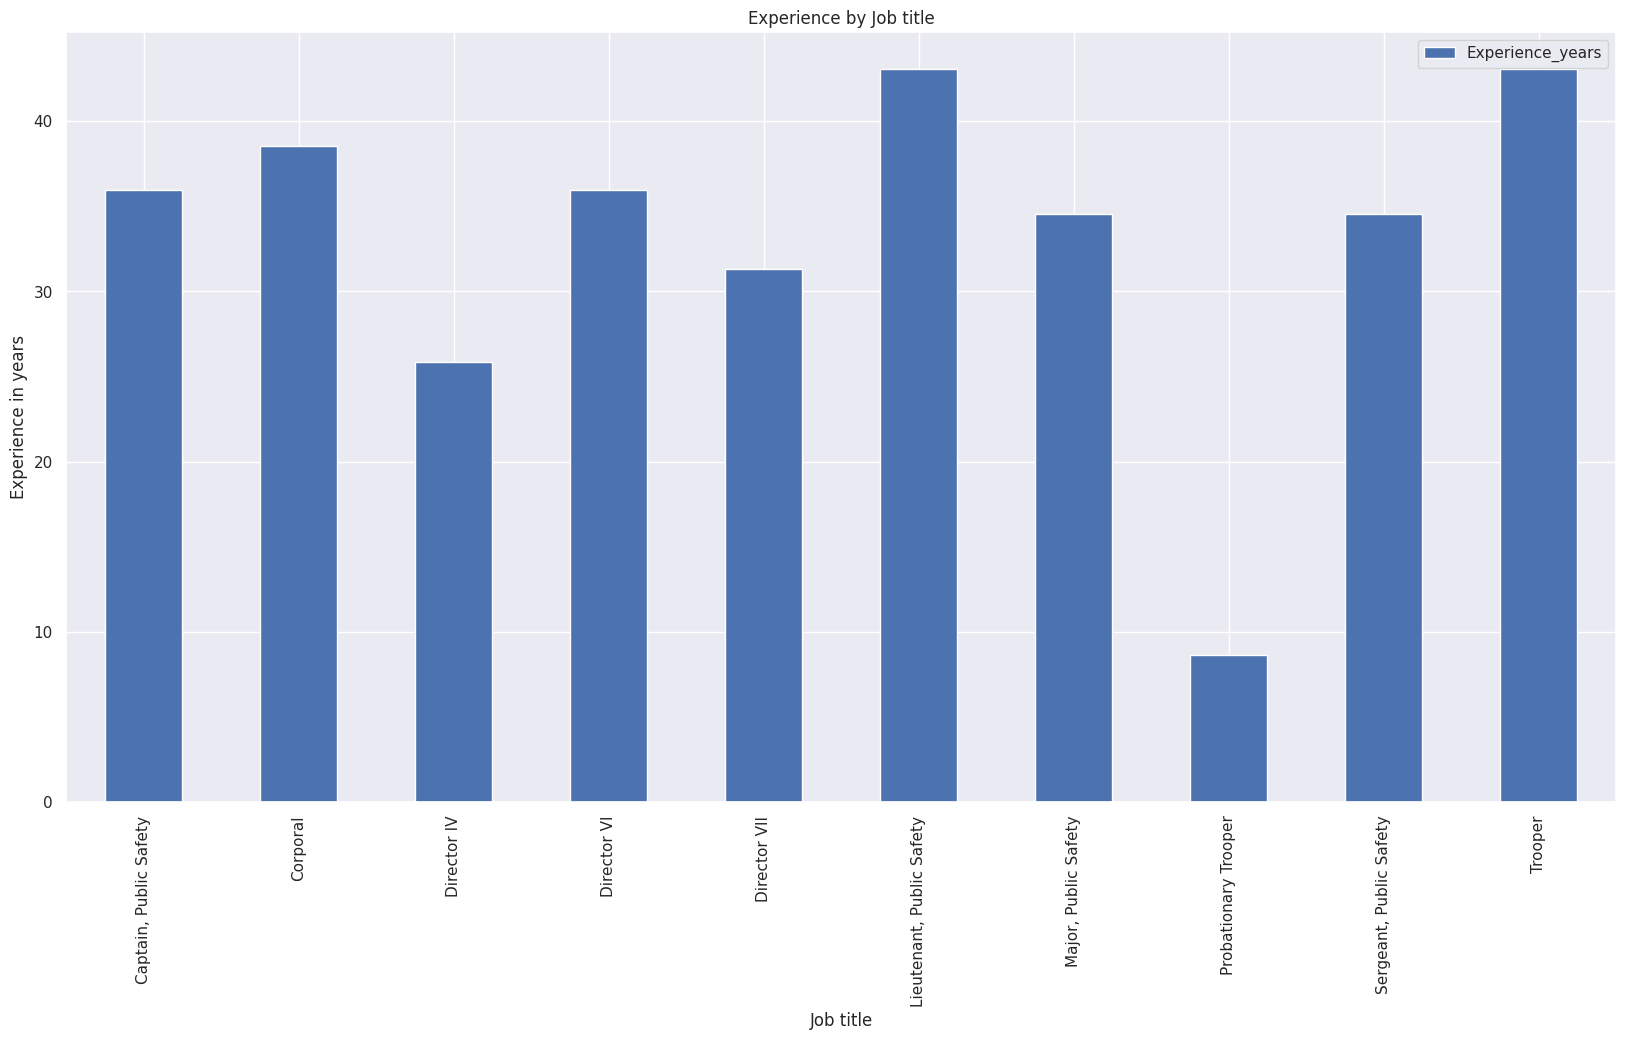

In [ ]:
u.plot(kind = 'bar', figsize =(20,10))
plt.ylabel('Experience in years')
plt.xlabel('Job title')
plt.title('Experience by Job title')
# So the directors are clearly not the most experienced

In [ ]:
df.head()

Id_no                Job_title                 Job_function  Annual_salary  \
0   1345                  Trooper       Highway Patrol Trooper       79323.00   
1   2749                 Corporal      Highway Patrol Corporal       69540.96   
2   3004                  Trooper                  CVE Trooper       79323.00   
3   3183                  Trooper                  CVE Trooper       79323.00   
4   3374  Sergeant, Public Safety  Training Technical Sergeant       86494.92   

  Sex  Age   Race  Hire_date       Date Experience  Experience_years  
0   M   74  WHITE 2002-10-01 2021-01-01  6667 days         18.253626  
1   M   34  BLACK 2007-08-20 2021-01-01  4883 days         13.369200  
2   M   69  WHITE 2002-10-01 2021-01-01  6667 days         18.253626  
3   M   71  WHITE 2003-10-01 2021-01-01  6302 days         17.254290  
4   M   68  WHITE 2002-08-01 2021-01-01  6728 days         18.420638

In [ ]:
# trying out some filtering
Above_50 = df[df['Age']>50]

In [ ]:
Above_50

Id_no                Job_title                 Job_function  \
0      1345                  Trooper       Highway Patrol Trooper   
2      3004                  Trooper                  CVE Trooper   
3      3183                  Trooper                  CVE Trooper   
4      3374  Sergeant, Public Safety  Training Technical Sergeant   
5      3406                 Corporal                 CVE Corporal   
...     ...                      ...                          ...   
2147  14576                  Trooper       Highway Patrol Trooper   
2153  14583                  Trooper       Highway Patrol Trooper   
2212  14647                  Trooper       Highway Patrol Trooper   
2854  15340                  Trooper       Highway Patrol Trooper   
2900  15388                  Trooper       Highway Patrol Trooper   

      Annual_salary Sex  Age   Race  Hire_date       Date Experience  \
0          79323.00   M   74  WHITE 2002-10-01 2021-01-01  6667 days   
2          79323.00   M   69  WHITE 2002-10-01 2021-01-01  6667 days   
3          79323.00   M   71  WHITE 2003-10-01 2021-01-01  6302 days   
4          86494.92   M   68  WHITE 2002-08-01 2021-01-01  6728 days   
5          79323.00   M   67  WHITE 2003-09-22 2021-01-01  6311 days   
...             ...  ..  ...    ...        ...        ...        ...   
2147       64918.92   M   55  HISPA 2015-06-21 2021-01-01  2021 days   
2153       64918.92   M   53  HISPA 2015-06-21 2021-01-01  2021 days   
2212       53241.96   M   53  HISPA 2015-07-12 2021-01-01  2000 days   
2854       53241.96   M   52  WHITE 2017-03-12 2021-01-01  1391 days   
2900       53241.96   M   52  WHITE 2017-03-12 2021-01-01  1391 days   

      Experience_years  
0            18.253626  
2            18.253626  
3            17.254290  
4            18.420638  
5            17.278931  
...                ...  
2147          5.533310  
2153          5.533310  
2212          5.475814  
2854          3.808429  
2900          3.808429  

[328 rows x 11 columns]

In [ ]:
# trying out some filtering
Officer_40_50 = df[(df['Age']>40) & (df['Age']<50)]

In [ ]:
Officer_40_50

Id_no                Job_title             Job_function  Annual_salary  \
109    7021  Sergeant, Public Safety  Highway Patrol Sergeant       86494.92   
121    7694                  Trooper              CVE Trooper       79323.00   
122    7698                  Trooper   Highway Patrol Trooper       79323.00   
124    7702                  Trooper   Highway Patrol Trooper       79323.00   
127    7718  Sergeant, Public Safety  Highway Patrol Sergeant       86494.92   
...     ...                      ...                      ...            ...   
3009  15507                  Trooper   Highway Patrol Trooper       53241.96   
3012  15510                  Trooper   Highway Patrol Trooper       53241.96   
3052  15550     Probationary Trooper     Probationary Trooper       44082.00   
3086  15586     Probationary Trooper     Probationary Trooper       44082.00   
3149  15672     Probationary Trooper     Probationary Trooper       44082.00   

     Sex  Age   Race  Hire_date       Date Experience  Experience_years  
109    M   49  AMIND 1990-03-27 2021-01-01 11238 days         30.768599  
121    M   47  WHITE 1993-09-28 2021-01-01  9957 days         27.261340  
122    M   48  WHITE 1993-09-28 2021-01-01  9957 days         27.261340  
124    M   46  WHITE 1993-09-28 2021-01-01  9957 days         27.261340  
127    M   47  WHITE 1993-09-28 2021-01-01  9957 days         27.261340  
...   ..  ...    ...        ...        ...        ...               ...  
3009   F   42  WHITE 2017-07-09 2021-01-01  1272 days          3.482618  
3012   M   43  WHITE 2017-07-09 2021-01-01  1272 days          3.482618  
3052   M   48  HISPA 2018-01-07 2021-01-01  1090 days          2.984319  
3086   M   41  WHITE 2018-01-07 2021-01-01  1090 days          2.984319  
3149   M   49  WHITE 2018-06-03 2021-01-01   943 days          2.581846  

[724 rows x 11 columns]

In [ ]:
#trying out some filtering
Officer_30_40 = df[(df['Age']>30) & (df['Age']<40)]
Officer_30_40

Id_no                Job_title                 Job_function  \
1      2749                 Corporal      Highway Patrol Corporal   
495   10177                  Trooper       Highway Patrol Trooper   
594   10599   Captain, Public Safety       Highway Patrol Captain   
600   10615                  Trooper                  CVE Trooper   
615   10738  Sergeant, Public Safety  Training Technical Sergeant   
...     ...                      ...                          ...   
3143  15666     Probationary Trooper         Probationary Trooper   
3145  15668     Probationary Trooper         Probationary Trooper   
3146  15669     Probationary Trooper         Probationary Trooper   
3160  15683     Probationary Trooper         Probationary Trooper   
3161  15684     Probationary Trooper         Probationary Trooper   

      Annual_salary Sex  Age   Race  Hire_date       Date Experience  \
1          69540.96   M   34  BLACK 2007-08-20 2021-01-01  4883 days   
495        75967.92   M   39  WHITE 2000-09-18 2021-01-01  7410 days   
594       106405.92   M   38  WHITE 2002-01-07 2021-01-01  6934 days   
600        75967.92   M   39  WHITE 2002-01-07 2021-01-01  6934 days   
615        84390.96   M   39  WHITE 2002-06-01 2021-01-01  6789 days   
...             ...  ..  ...    ...        ...        ...        ...   
3143       44082.00   M   37  BLACK 2018-06-03 2021-01-01   943 days   
3145       44082.00   M   35  BLACK 2018-06-03 2021-01-01   943 days   
3146       44082.00   M   32  BLACK 2018-06-03 2021-01-01   943 days   
3160       44082.00   M   32  WHITE 2018-06-03 2021-01-01   943 days   
3161       44082.00   M   37  WHITE 2018-06-03 2021-01-01   943 days   

      Experience_years  
1            13.369200  
495          20.287891  
594          18.984647  
600          18.984647  
615          18.587651  
...                ...  
3143          2.581846  
3145          2.581846  
3146          2.581846  
3160          2.581846  
3161          2.581846  

[945 rows x 11 columns]

In [ ]:
#trying out some filtering
Officer_below_30 = df[df['Age']<30]
Officer_below_30

Id_no             Job_title            Job_function  Annual_salary Sex  \
1409  13391               Trooper  Highway Patrol Trooper       69540.96   M   
1543  13701               Trooper  Highway Patrol Trooper       64918.92   M   
1547  13760               Trooper  Highway Patrol Trooper       64918.92   M   
1549  13763               Trooper  Highway Patrol Trooper       64918.92   M   
1568  13788               Trooper  Highway Patrol Trooper       64918.92   M   
...     ...                   ...                     ...            ...  ..   
3159  15682  Probationary Trooper    Probationary Trooper       44082.00   M   
3163  15686  Probationary Trooper    Probationary Trooper       44082.00   M   
3164  15687  Probationary Trooper    Probationary Trooper       44082.00   F   
3165  15688  Probationary Trooper    Probationary Trooper       44082.00   M   
3166  15689  Probationary Trooper    Probationary Trooper       44082.00   M   

      Age   Race  Hire_date       Date Experience  Experience_years  
1409   29  WHITE 2009-07-20 2021-01-01  4183 days         11.452665  
1543   29  WHITE 2011-03-06 2021-01-01  3589 days          9.826348  
1547   29  HISPA 2011-08-17 2021-01-01  3425 days          9.377331  
1549   28  WHITE 2011-08-17 2021-01-01  3425 days          9.377331  
1568   28  HISPA 2011-08-17 2021-01-01  3425 days          9.377331  
...   ...    ...        ...        ...        ...               ...  
3159   26  HISPA 2018-06-03 2021-01-01   943 days          2.581846  
3163   23  BLACK 2018-06-03 2021-01-01   943 days          2.581846  
3164   22  HISPA 2018-06-03 2021-01-01   943 days          2.581846  
3165   24  BLACK 2018-06-03 2021-01-01   943 days          2.581846  
3166   26  HISPA 2018-06-03 2021-01-01   943 days          2.581846  

[864 rows x 11 columns]

##### How annual salary varies with age using lineplot

<ipython-input-35-b12db521db6d>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.lineplot(x='Age', y='Annual_salary', data = df, ci=False)


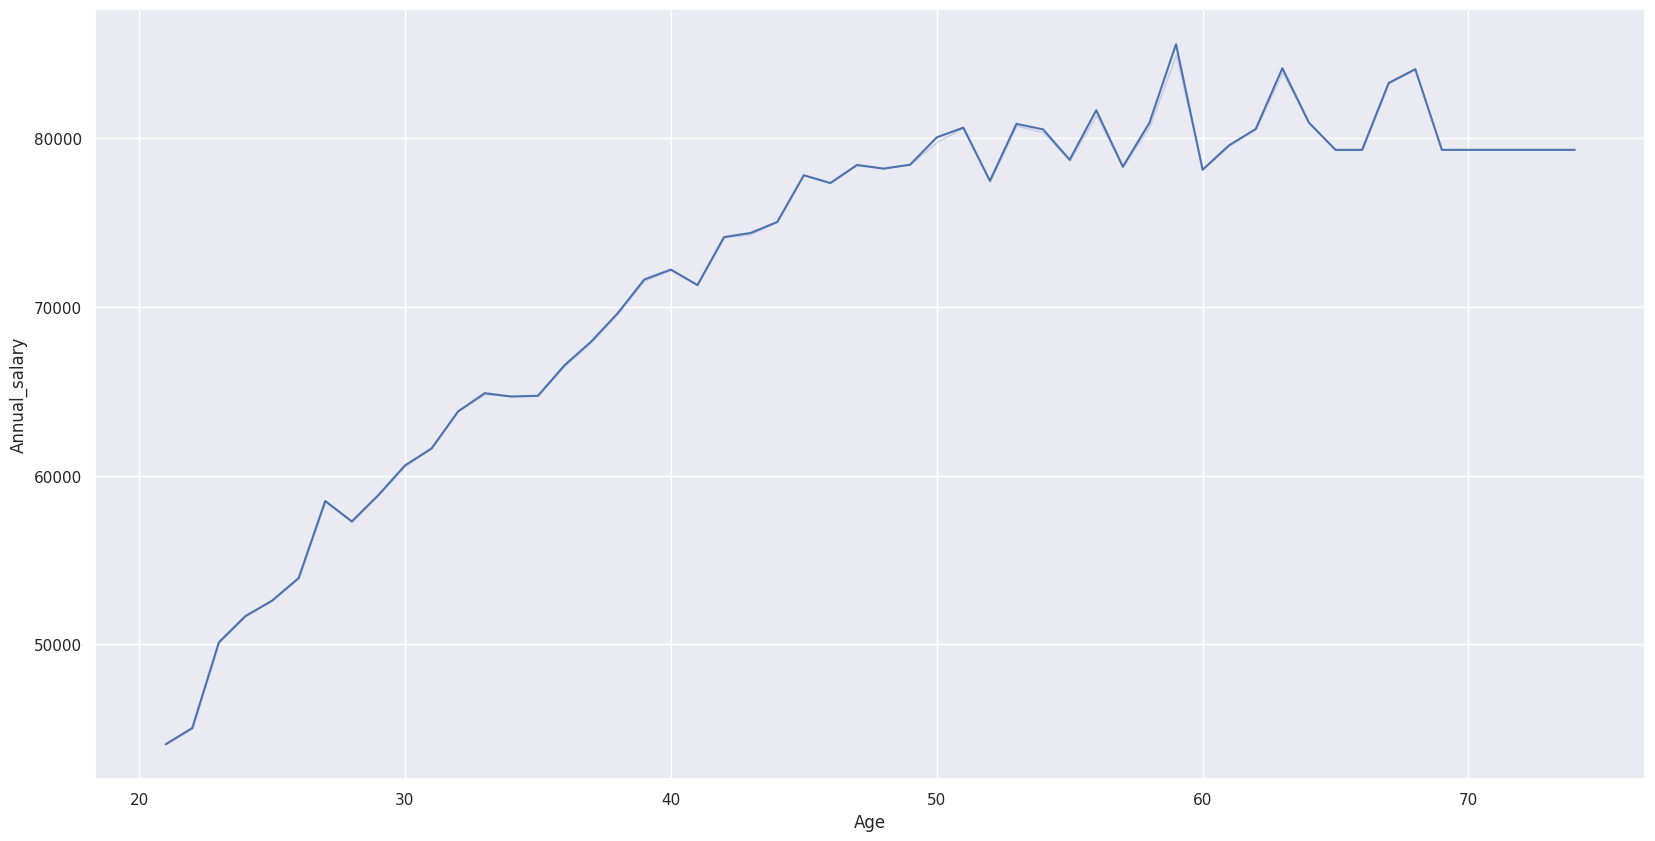

In [ ]:
ax = sns.lineplot(x='Age', y='Annual_salary', data = df, ci=False)

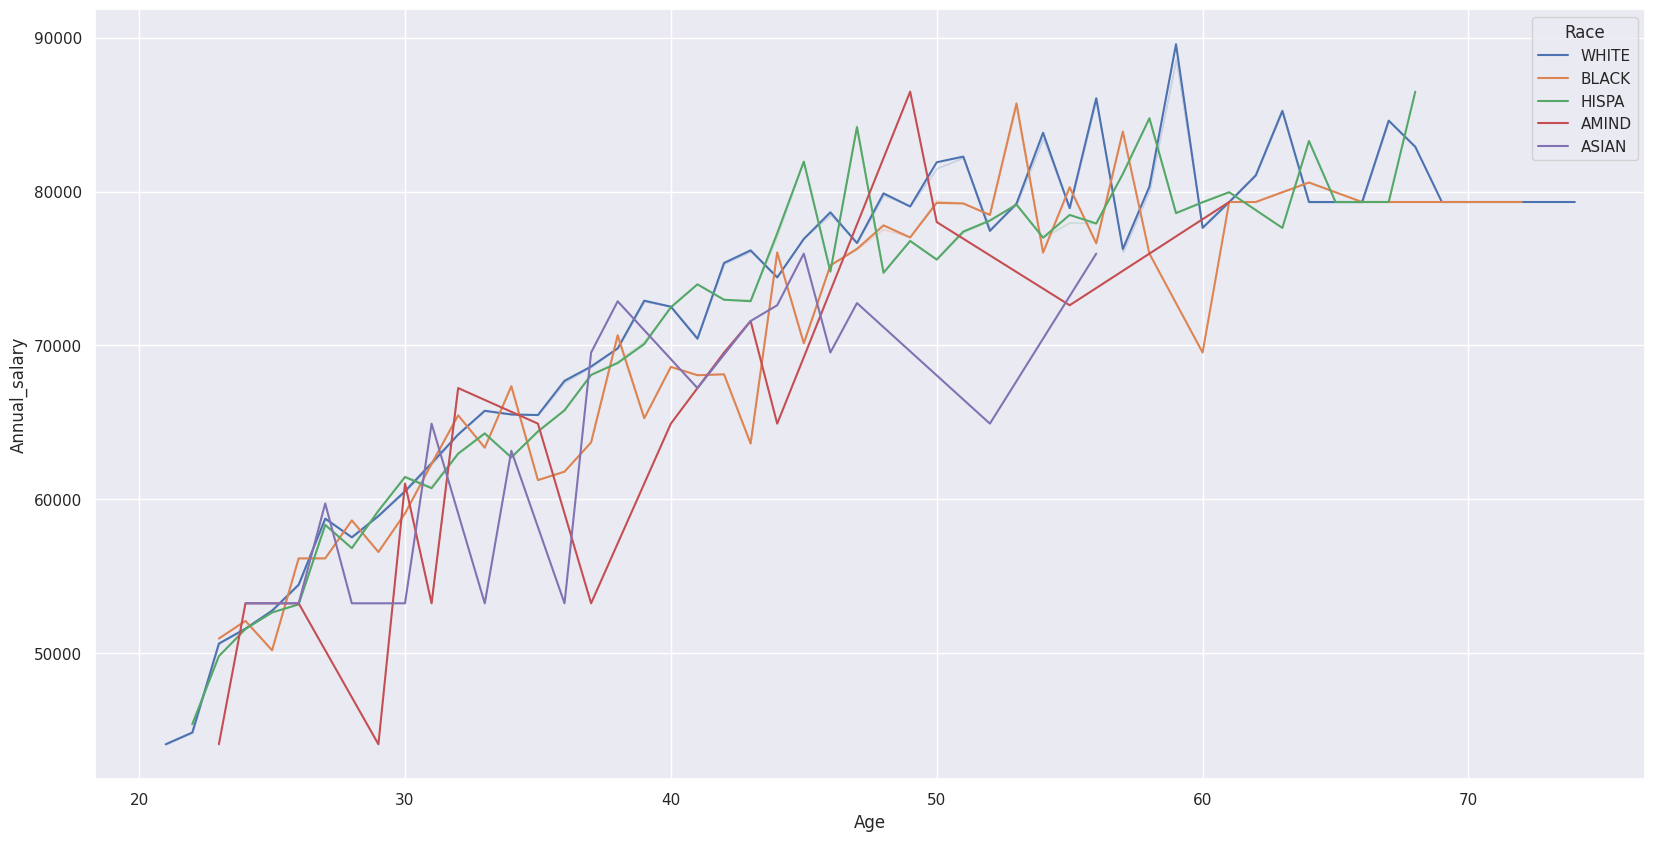

In [ ]:
ax = sns.lineplot(x='Age', y='Annual_salary', hue= 'Race', data = df, errorbar=('ci', False))

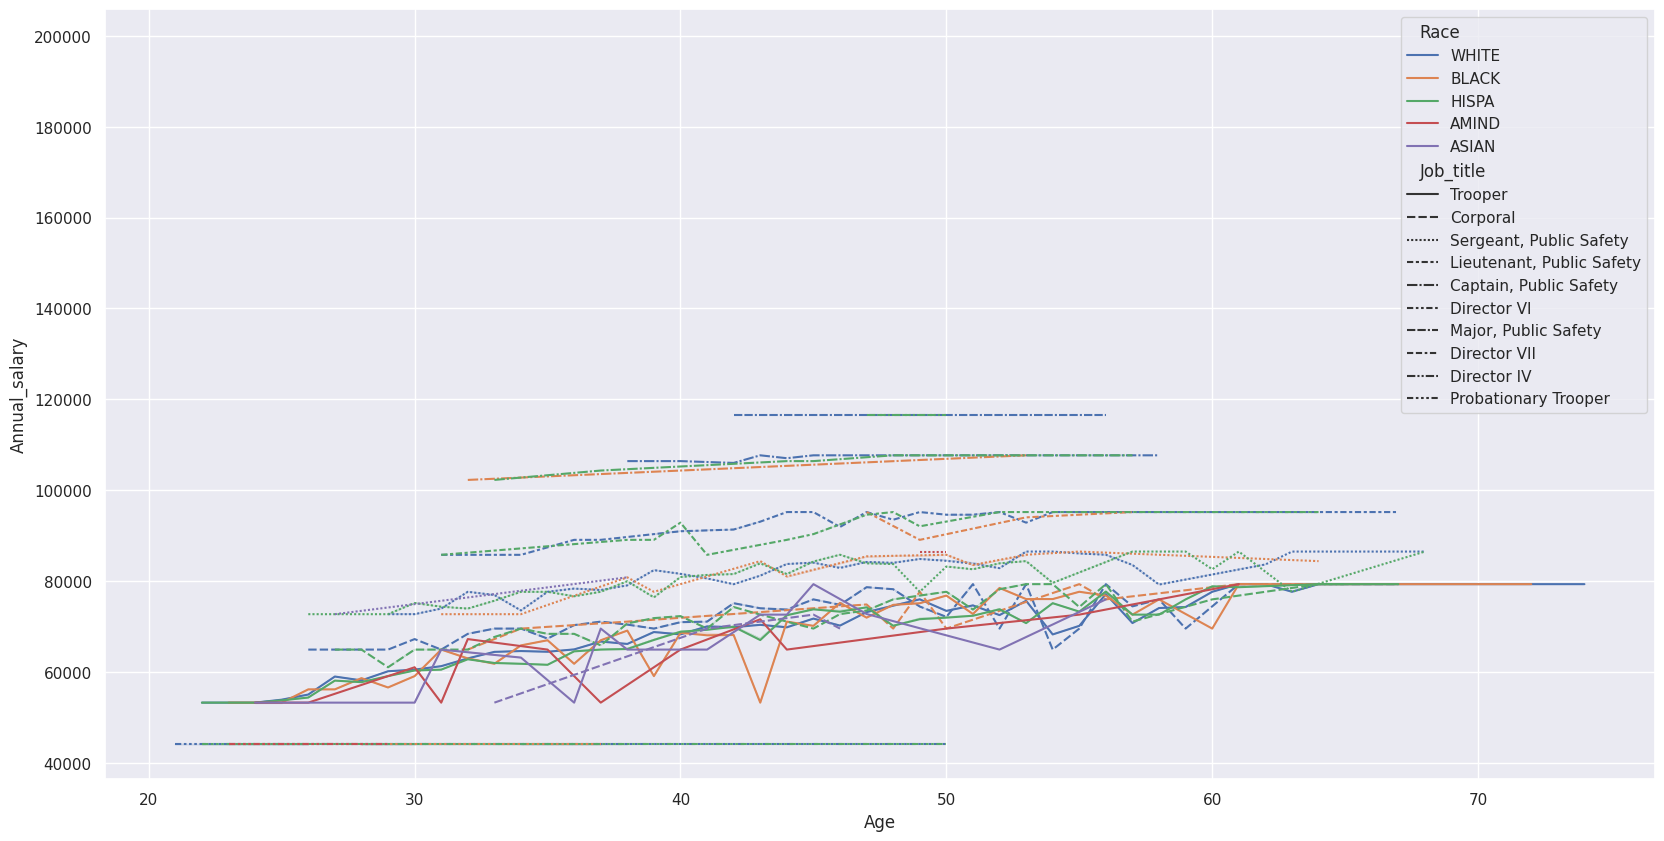

In [ ]:
ax = sns.lineplot(x='Age', y='Annual_salary', hue='Race', style='Job_title', data=df, errorbar=('ci', False))


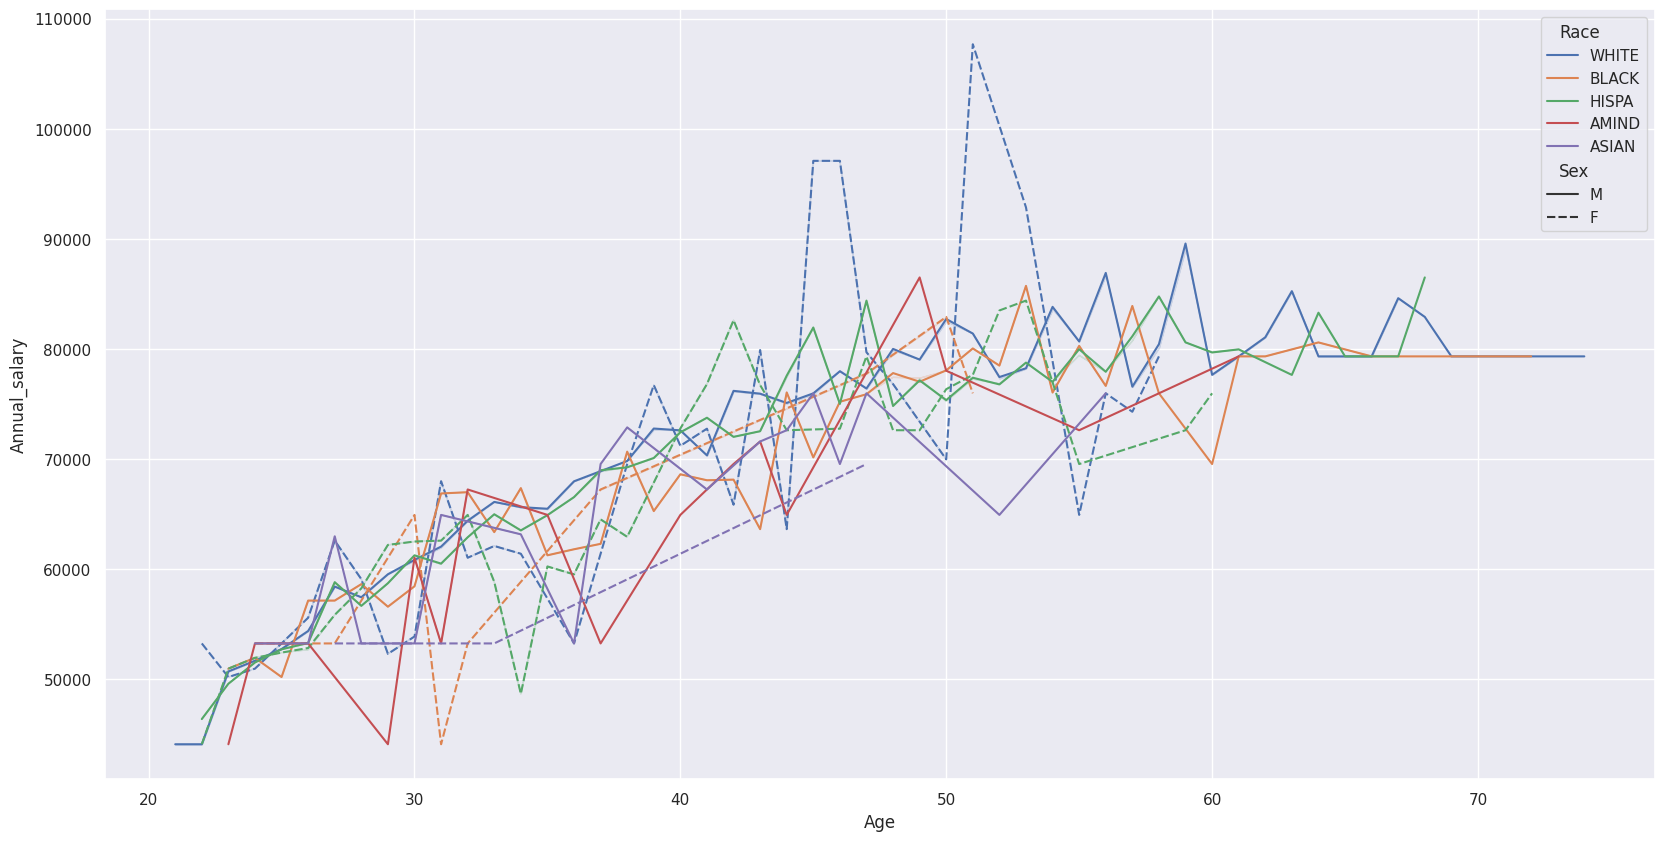

In [ ]:
ax = sns.lineplot(x='Age', y='Annual_salary', hue= 'Race', style='Sex', data = df, errorbar=('ci', False))

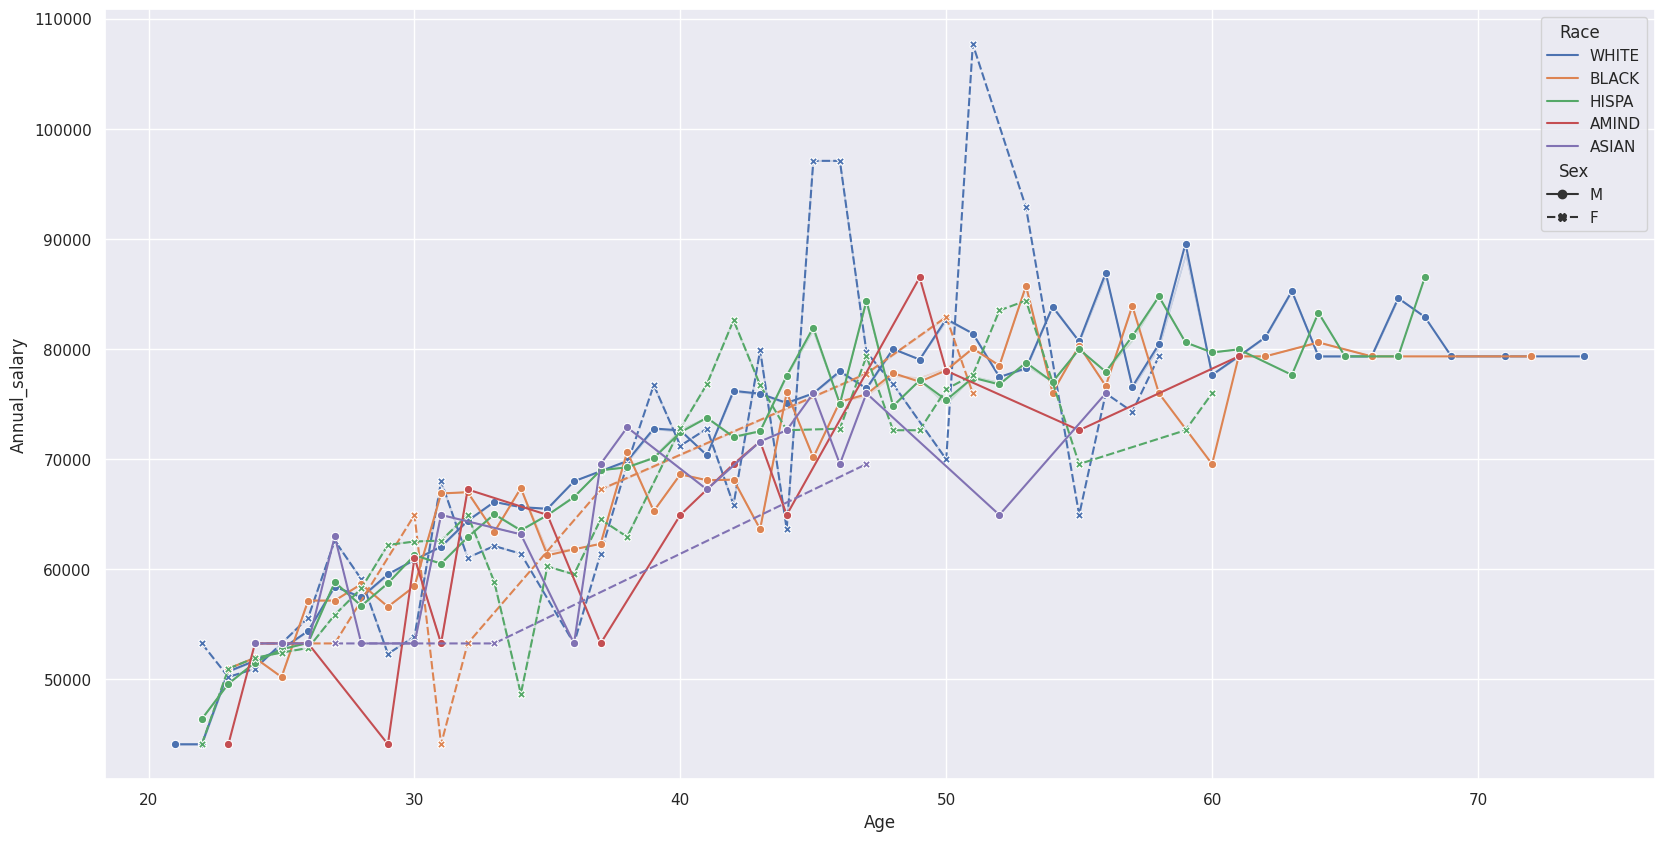

In [ ]:
ax = sns.lineplot(x='Age', y='Annual_salary', hue= 'Race', style='Sex', data = df, errorbar=('ci', False), markers = True)

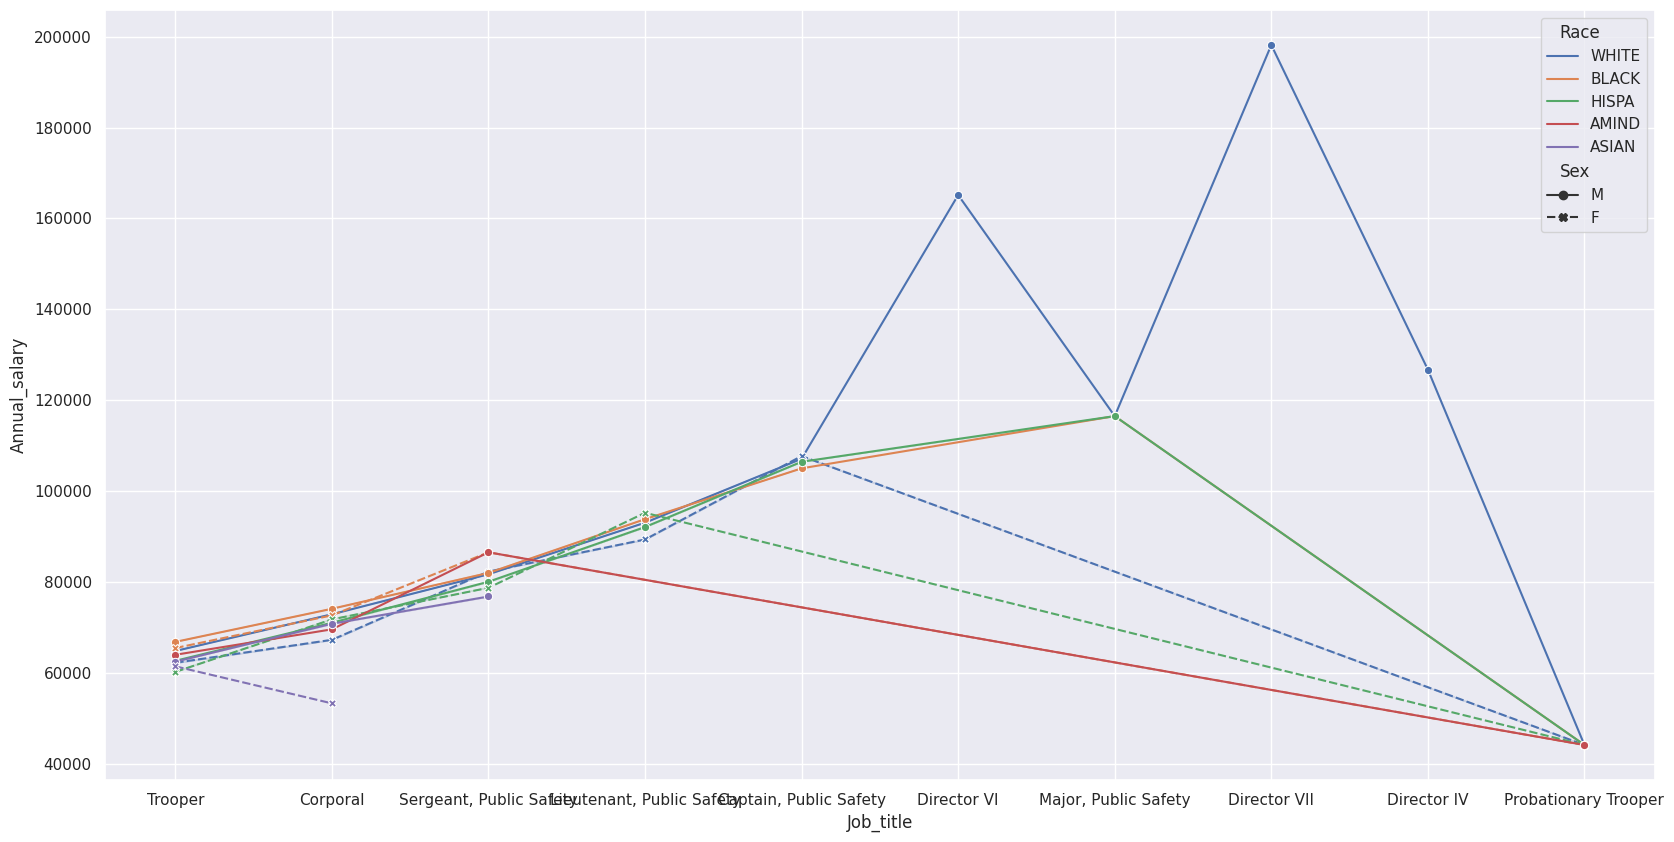

In [ ]:

ax = sns.lineplot(x='Job_title', y='Annual_salary', hue= 'Race', style='Sex', data = df, errorbar=('ci', False), markers = True)

##### How annual salary varies with age using barplot

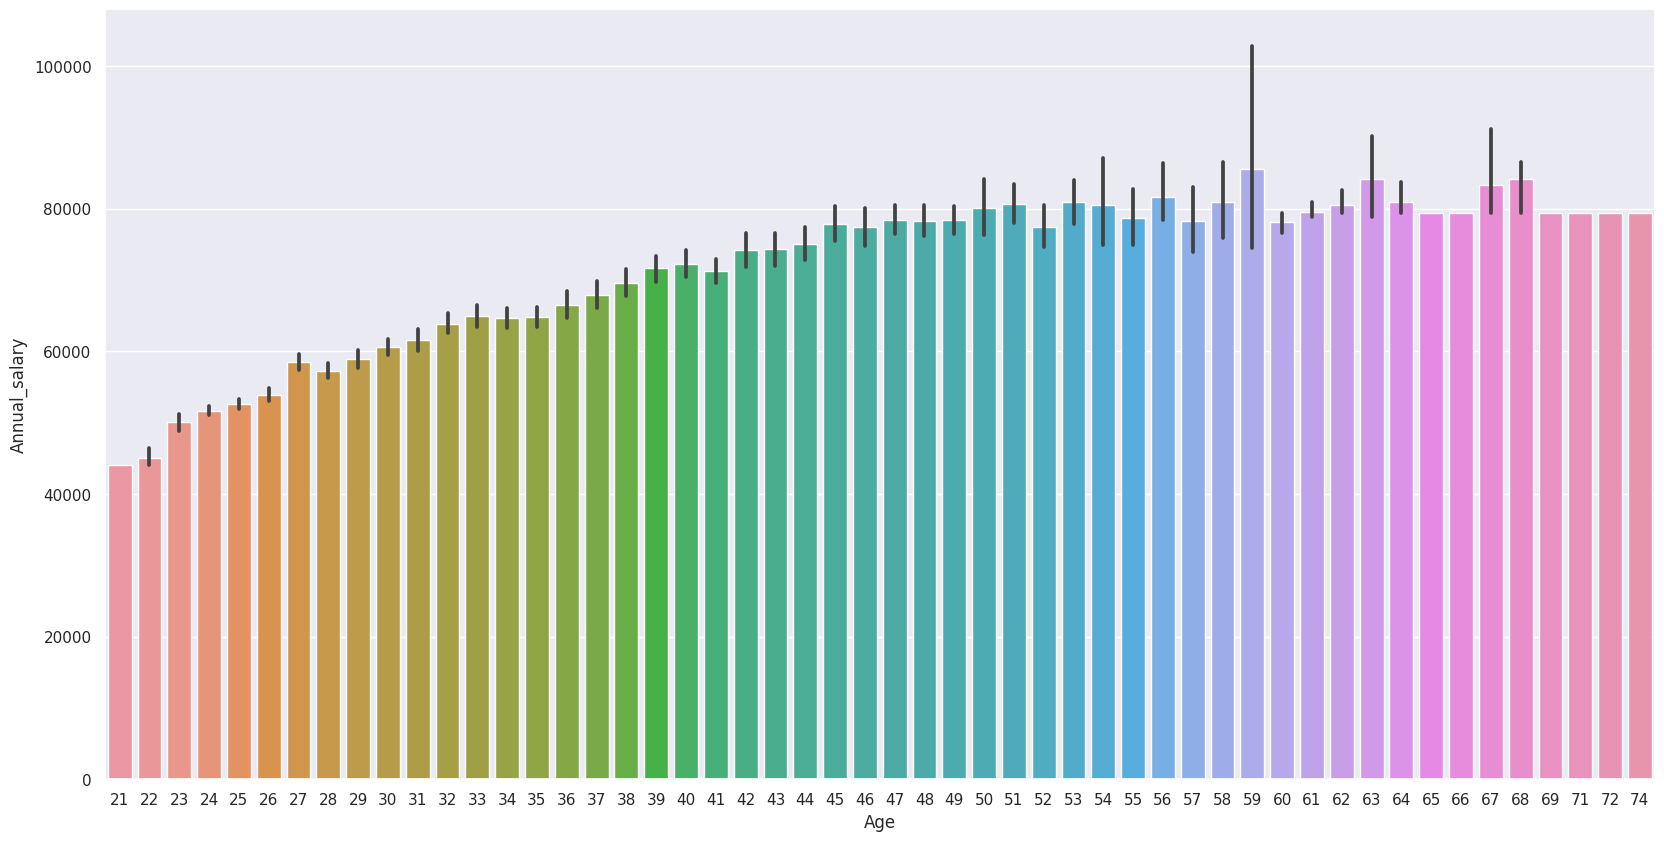

In [ ]:
ax = sns.barplot(x="Age", y="Annual_salary", data=df)

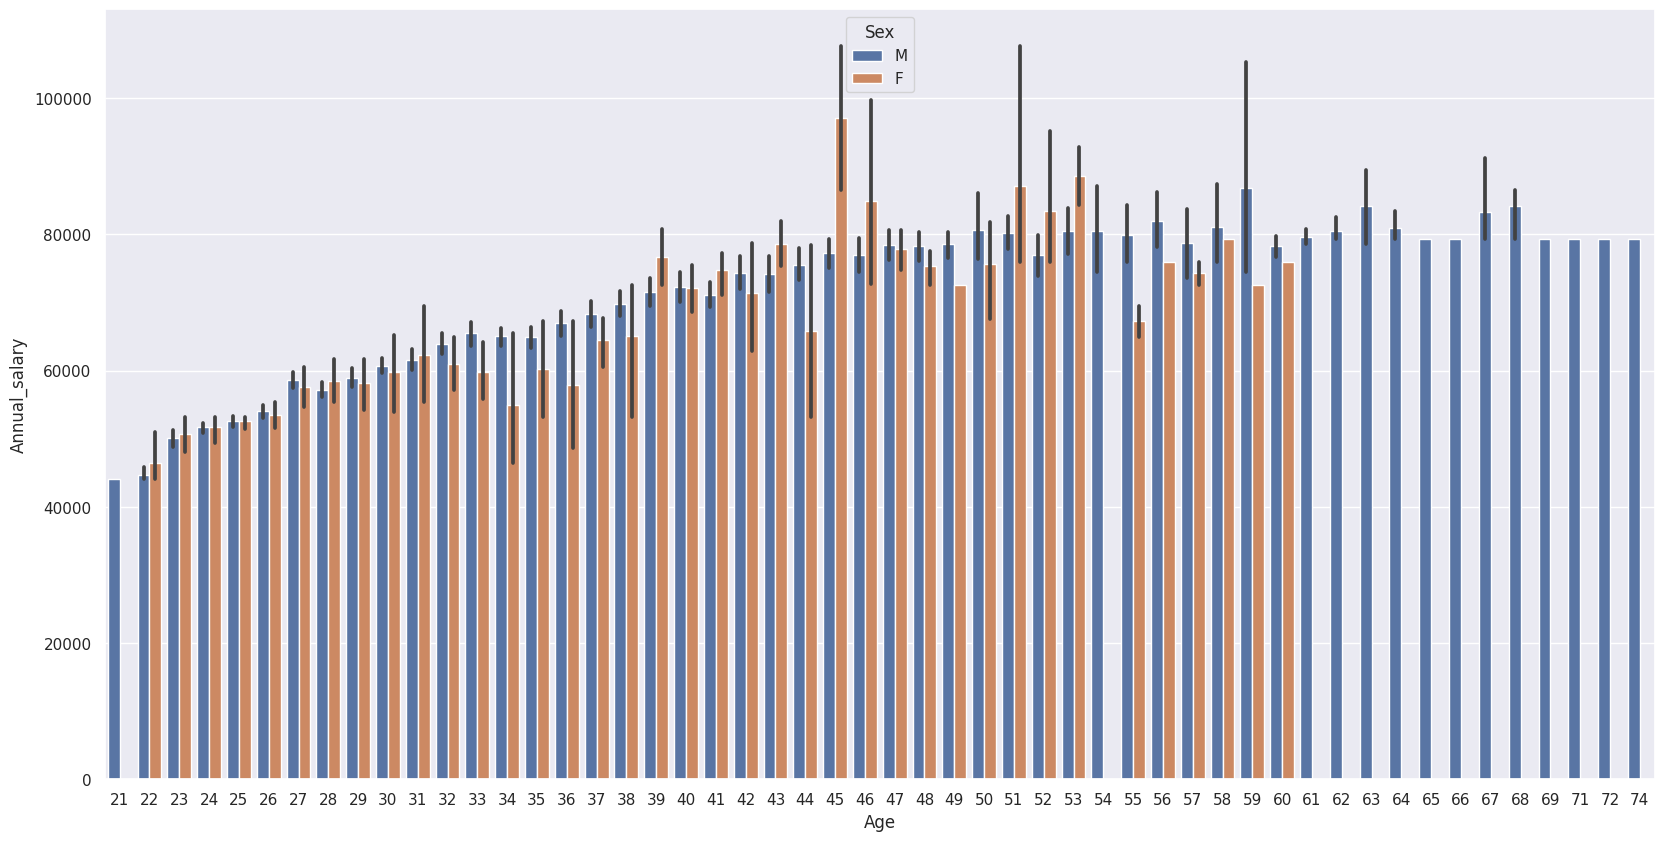

In [ ]:
ax = sns.barplot(x="Age", y="Annual_salary", hue='Sex', data=df)

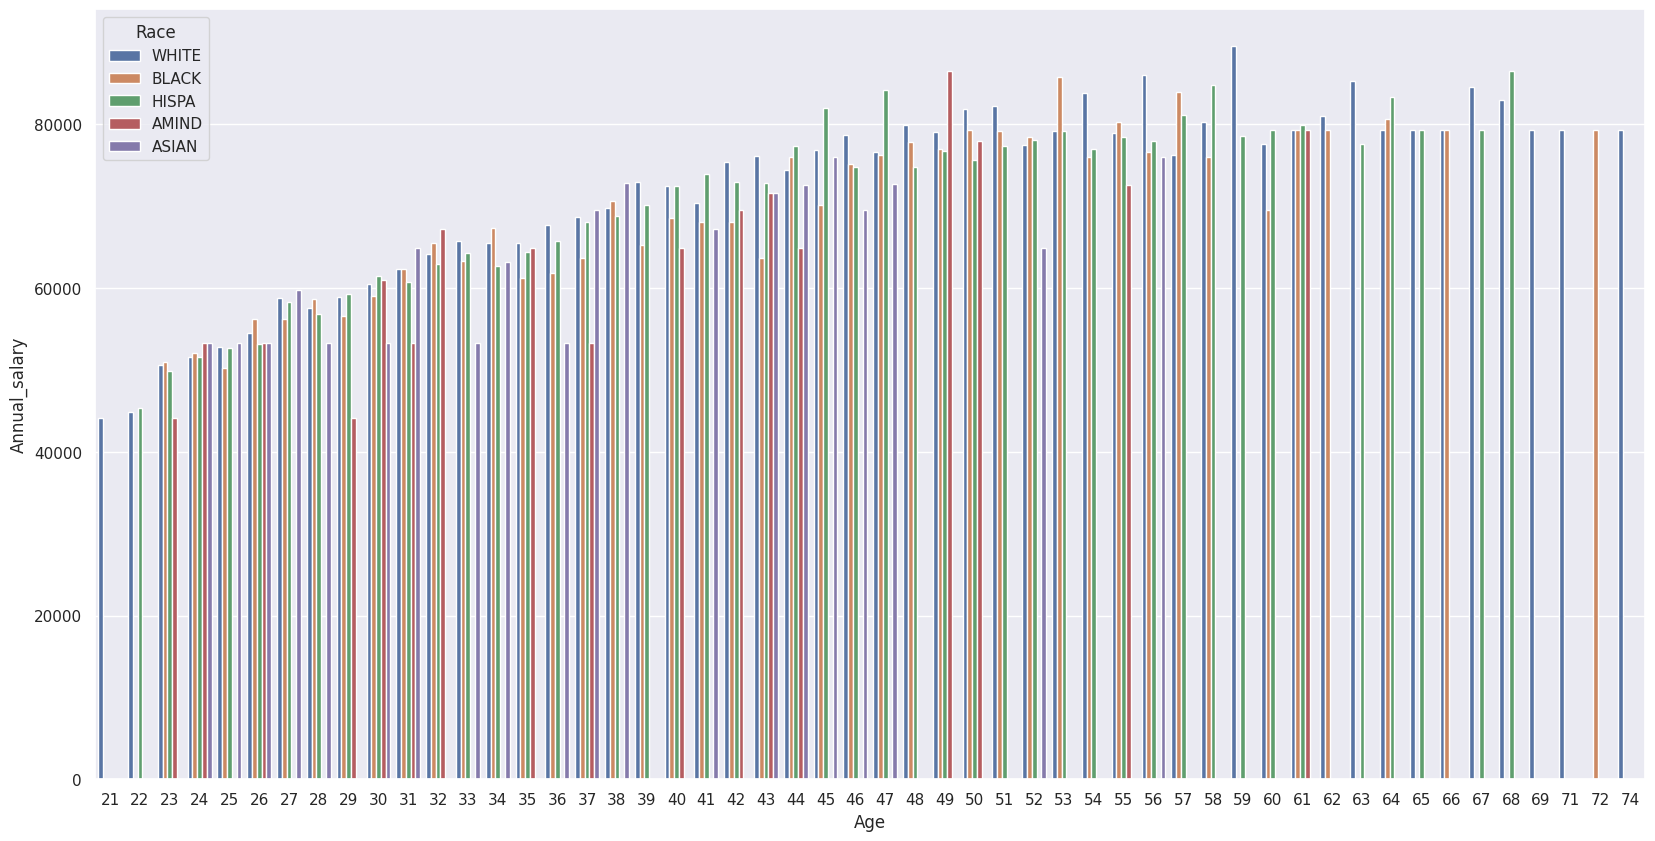

In [ ]:
ax = sns.barplot(x="Age", y="Annual_salary", hue='Race',data=df, errorbar=('ci', False))

##### How annual salary varies with experience

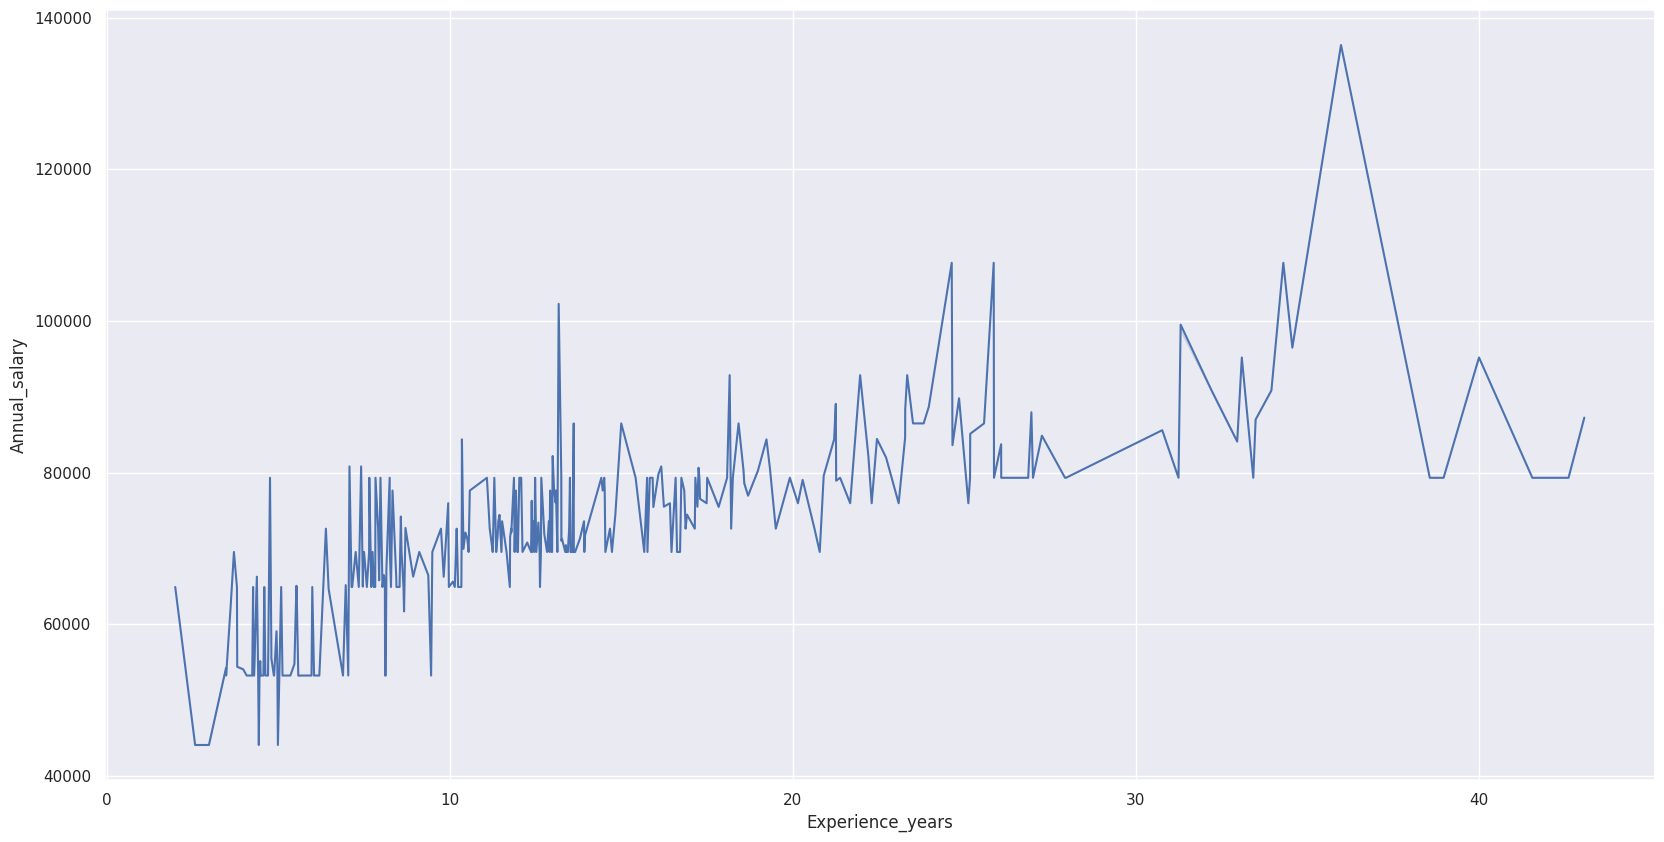

In [ ]:
ax = sns.lineplot(x="Experience_years", y="Annual_salary", data=df, errorbar=('ci', False))

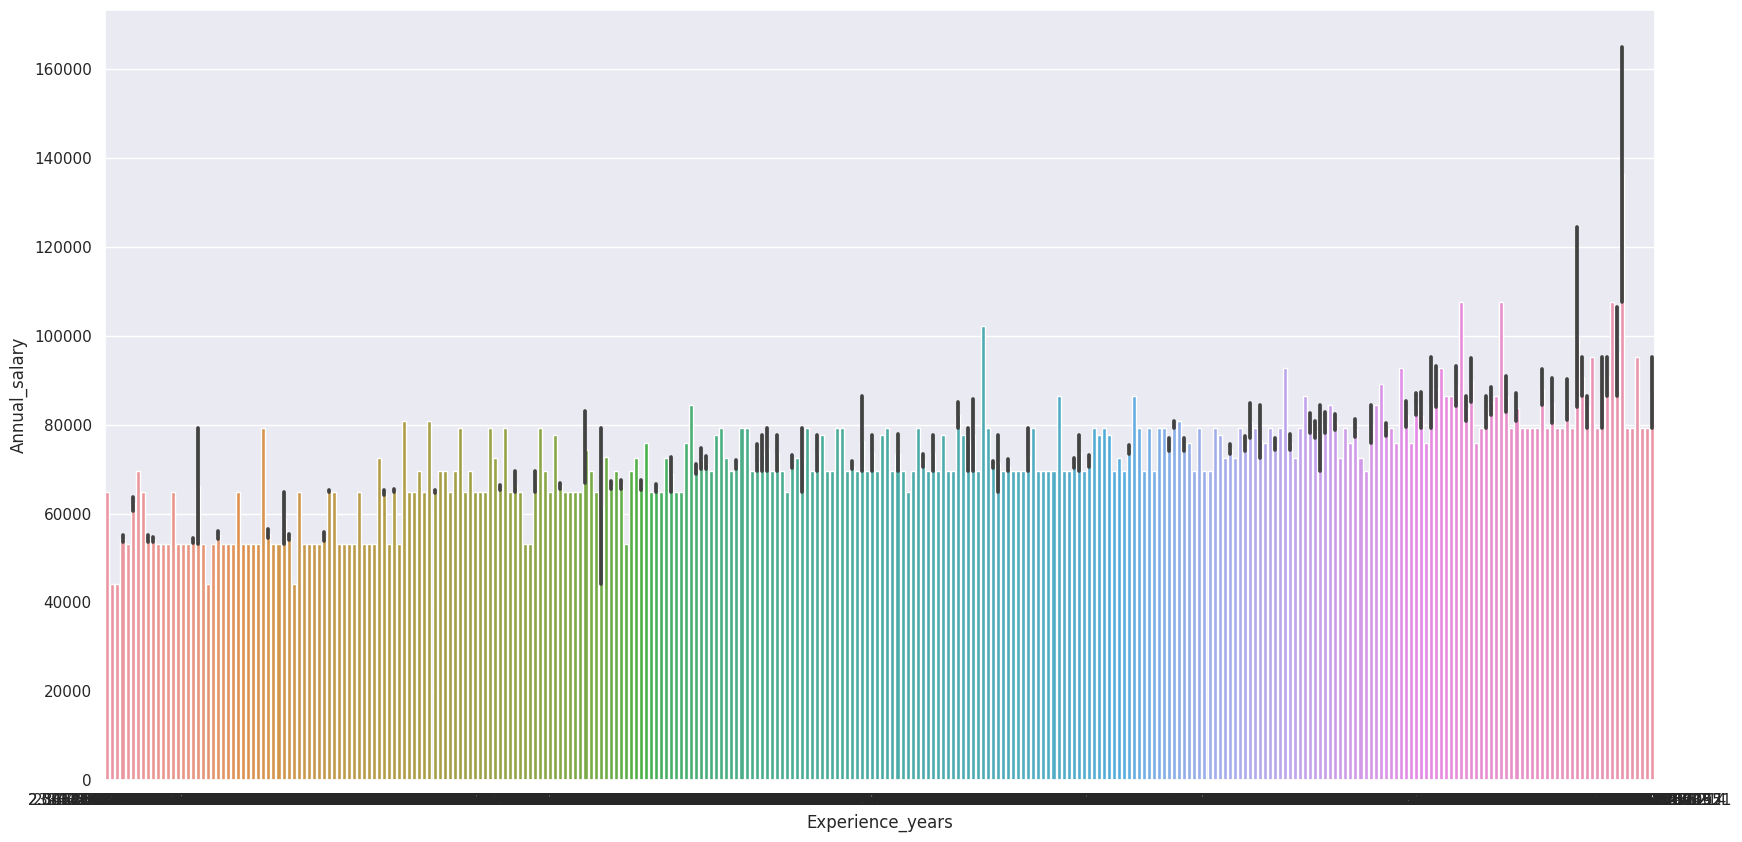

In [ ]:
ax = sns.barplot(x="Experience_years", y="Annual_salary", data=df)
#this just shows the mean of the years of experience

##### How annual salary varies with job title

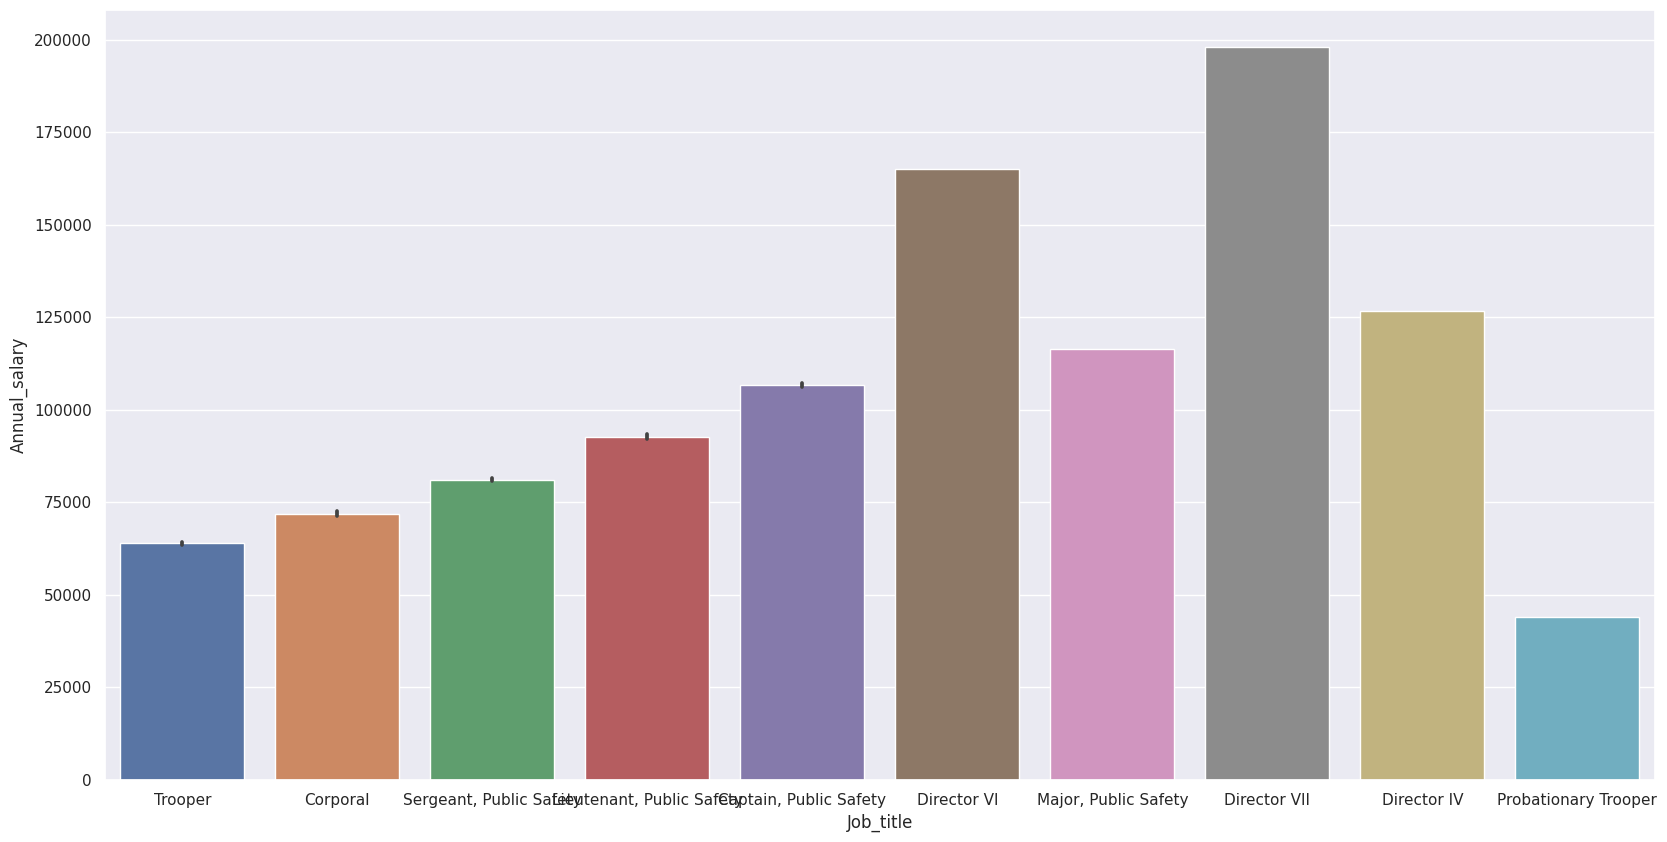

In [ ]:
#Job title vs Annual salary
ax = sns.barplot(x="Job_title", y="Annual_salary", data=df)

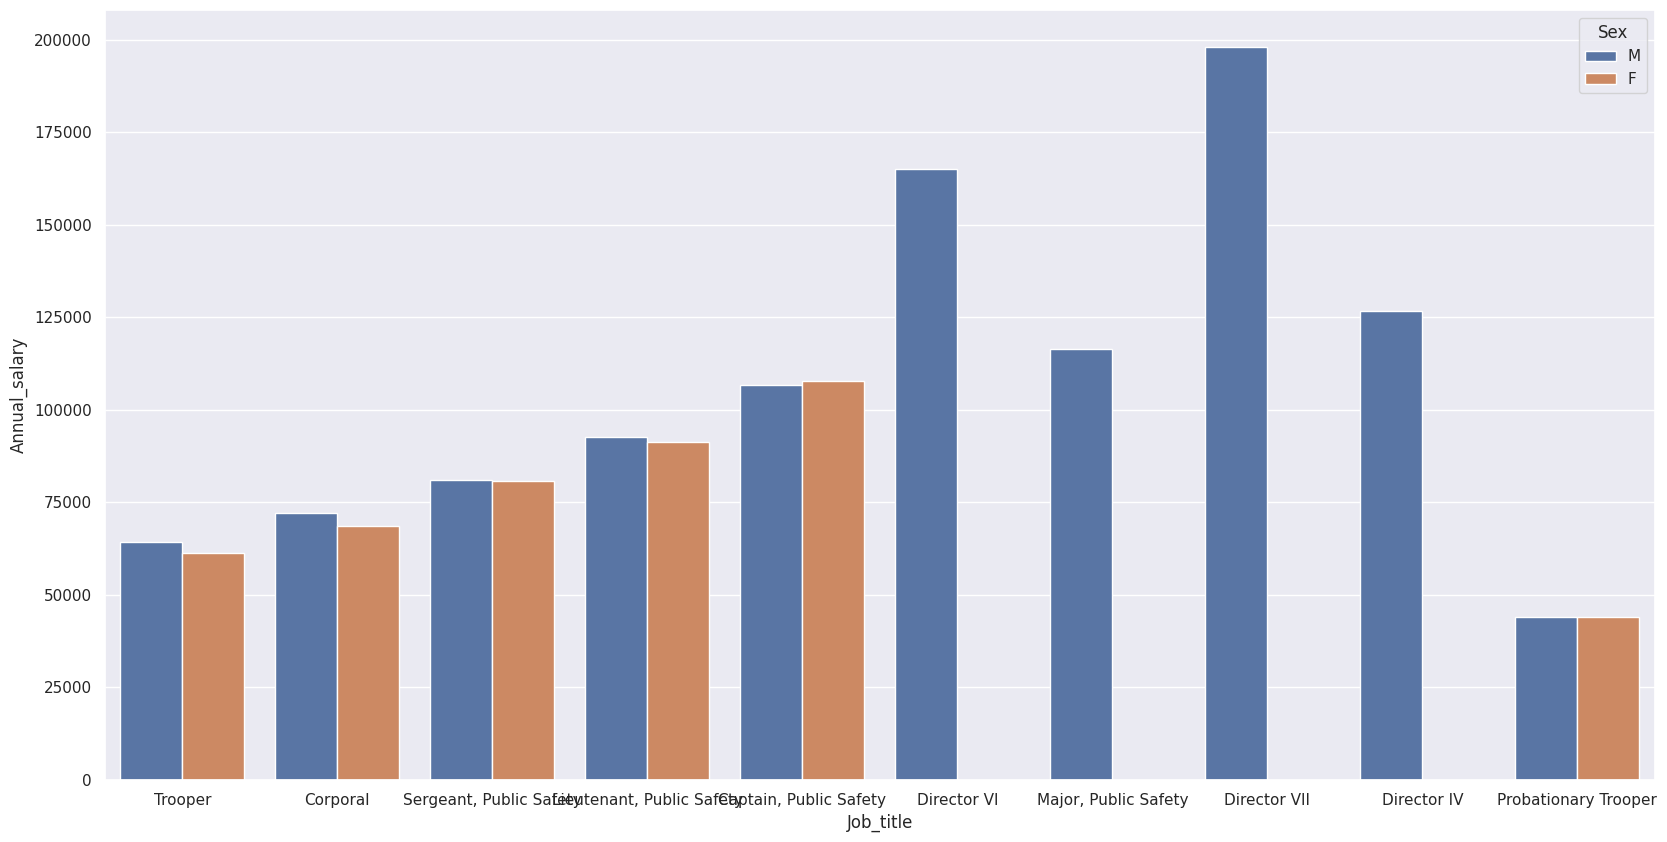

In [ ]:
#Job title vs Annual salary vs Sex
ax = sns.barplot(x="Job_title", y="Annual_salary", hue='Sex',data=df, errorbar=('ci', False))

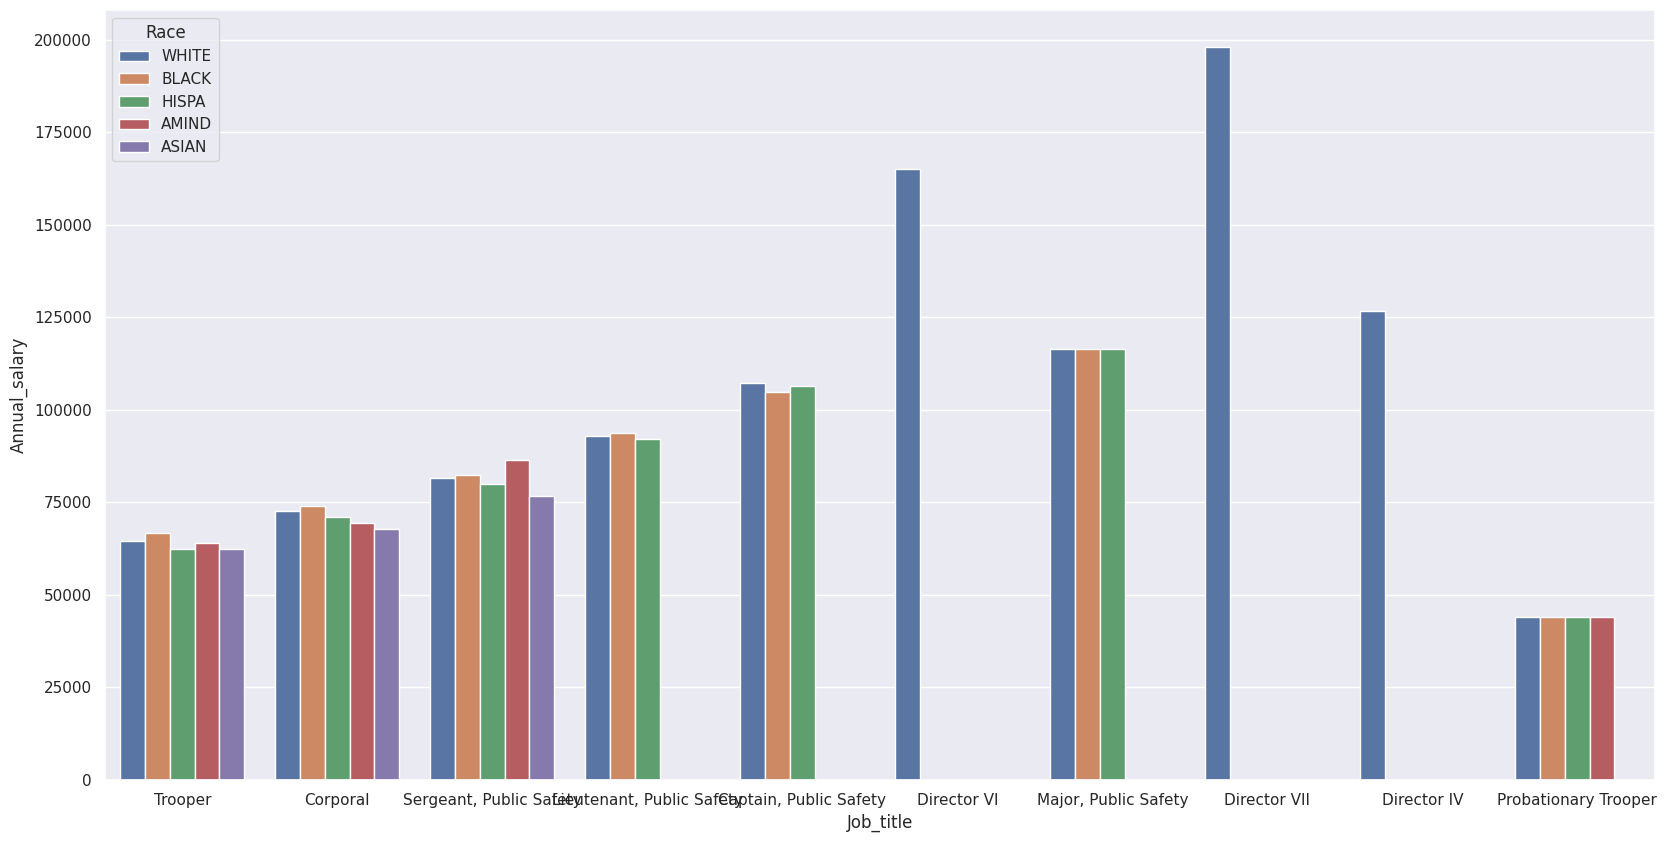

In [ ]:
#Job title vs Annual salary vs Race
ax = sns.barplot(x="Job_title", y="Annual_salary", hue='Race',data=df, errorbar=('ci', False))

##### How annual salary varies with race

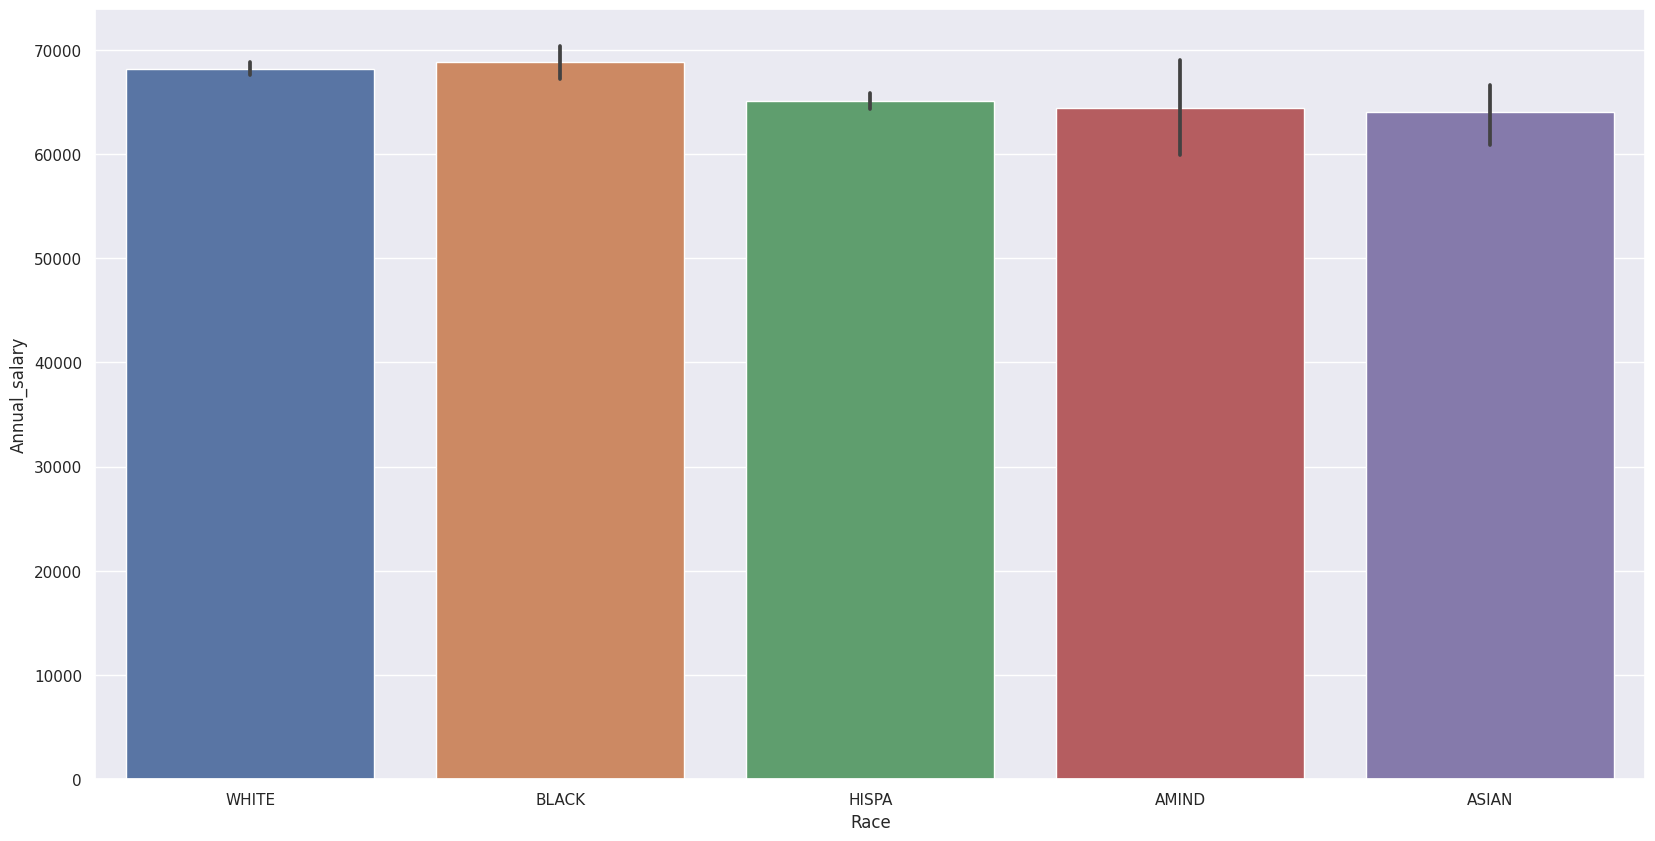

In [ ]:
ax = sns.barplot(x="Race", y="Annual_salary", data=df)

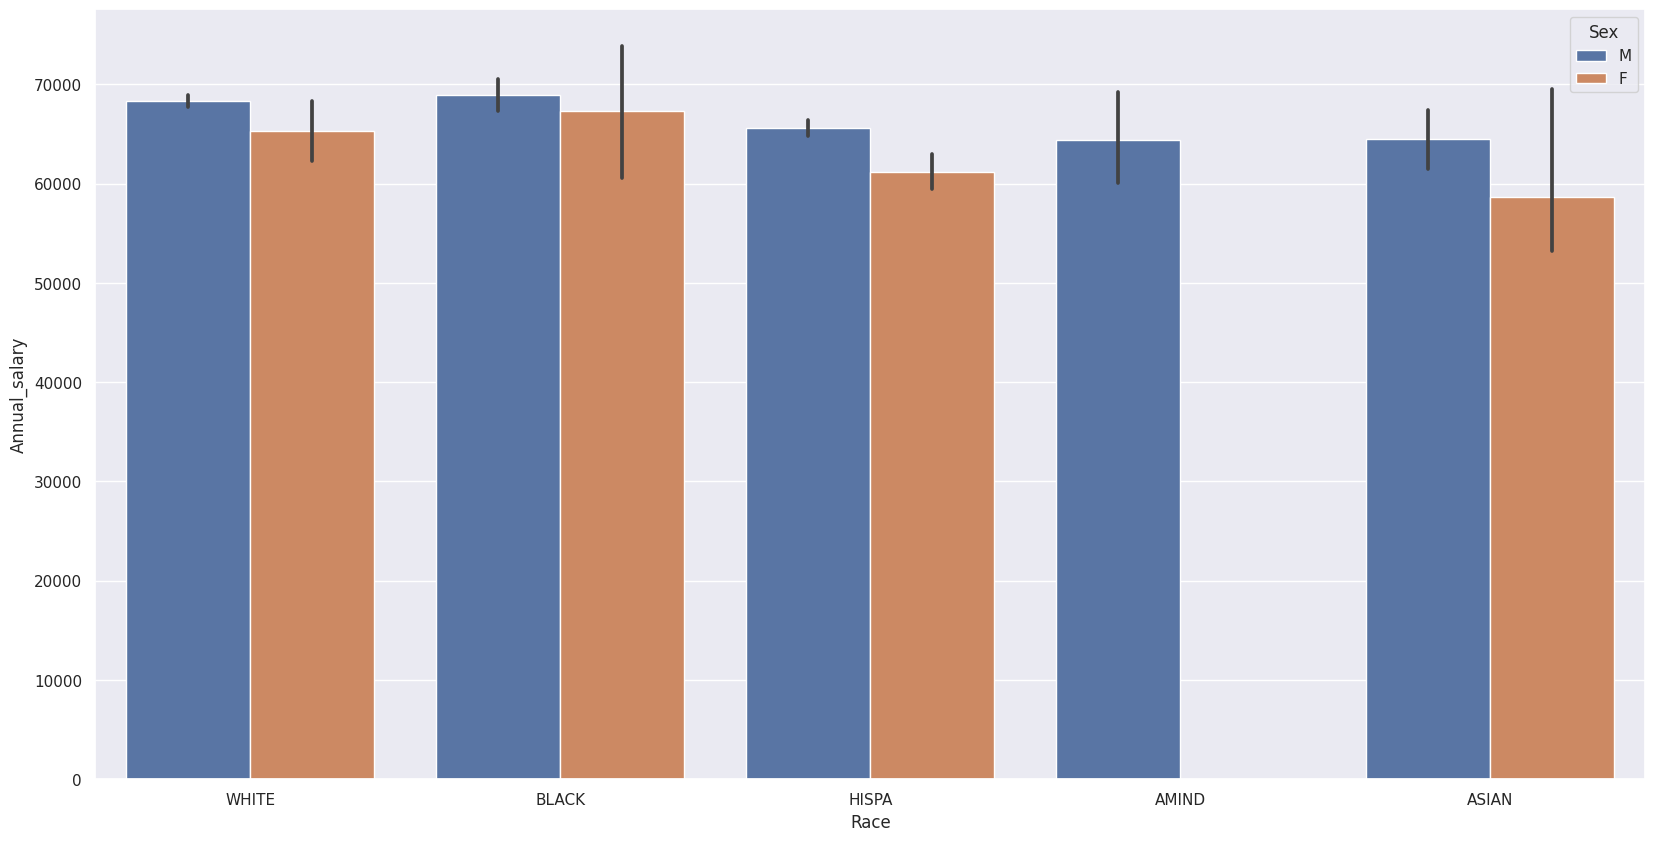

In [ ]:
ax = sns.barplot(x="Race", y="Annual_salary", data=df, hue='Sex')

##### How annual salary varies with sex

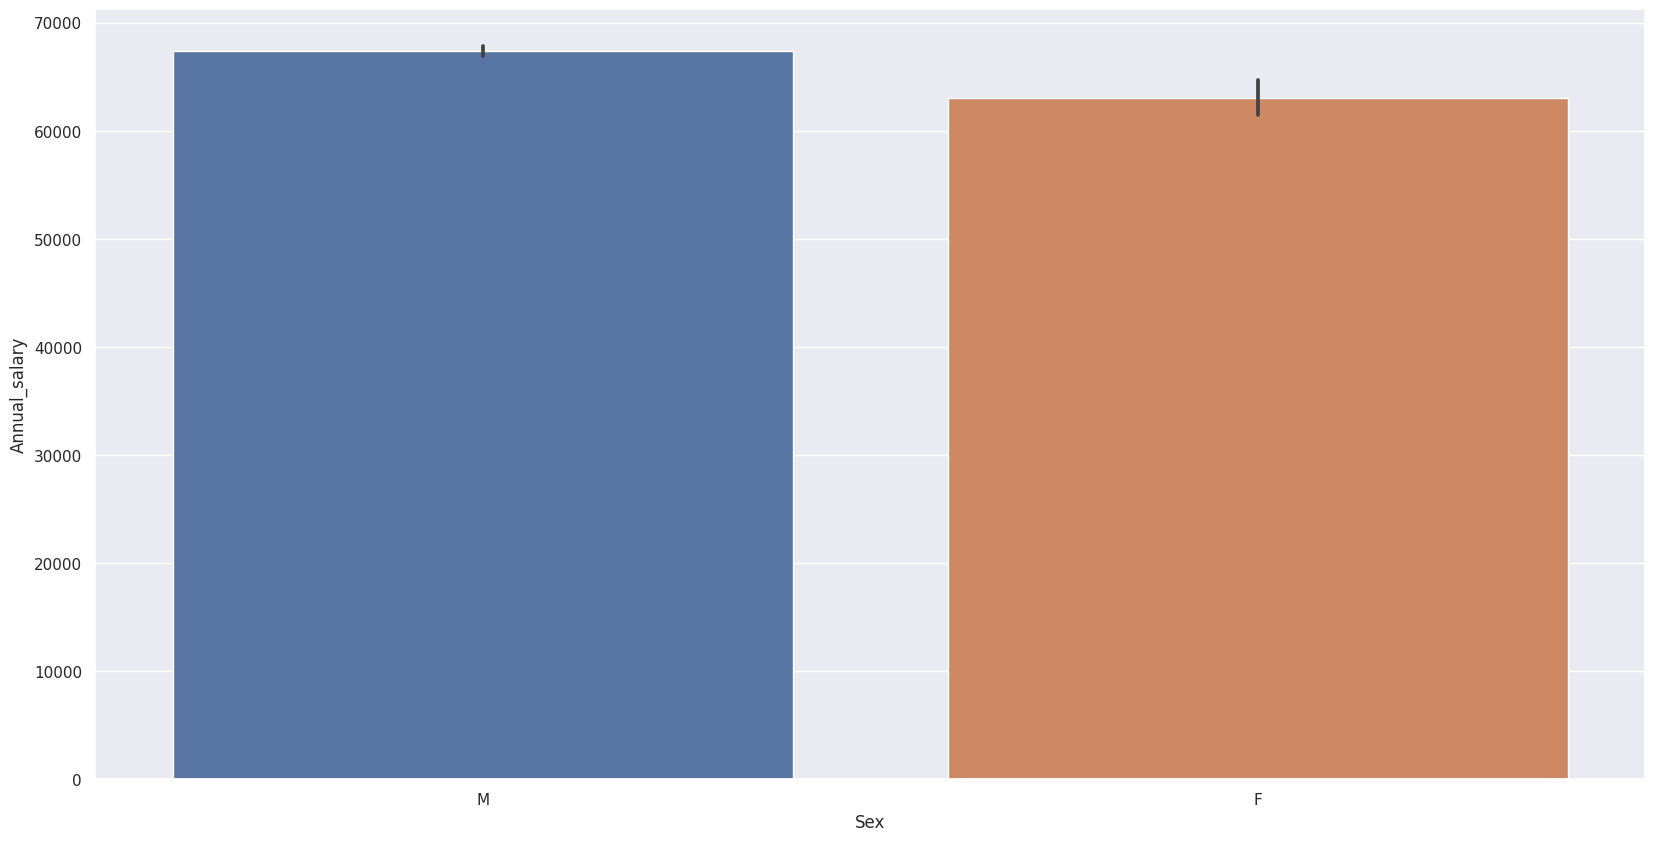

In [ ]:
ax = sns.barplot(x="Sex", y="Annual_salary", data=df)

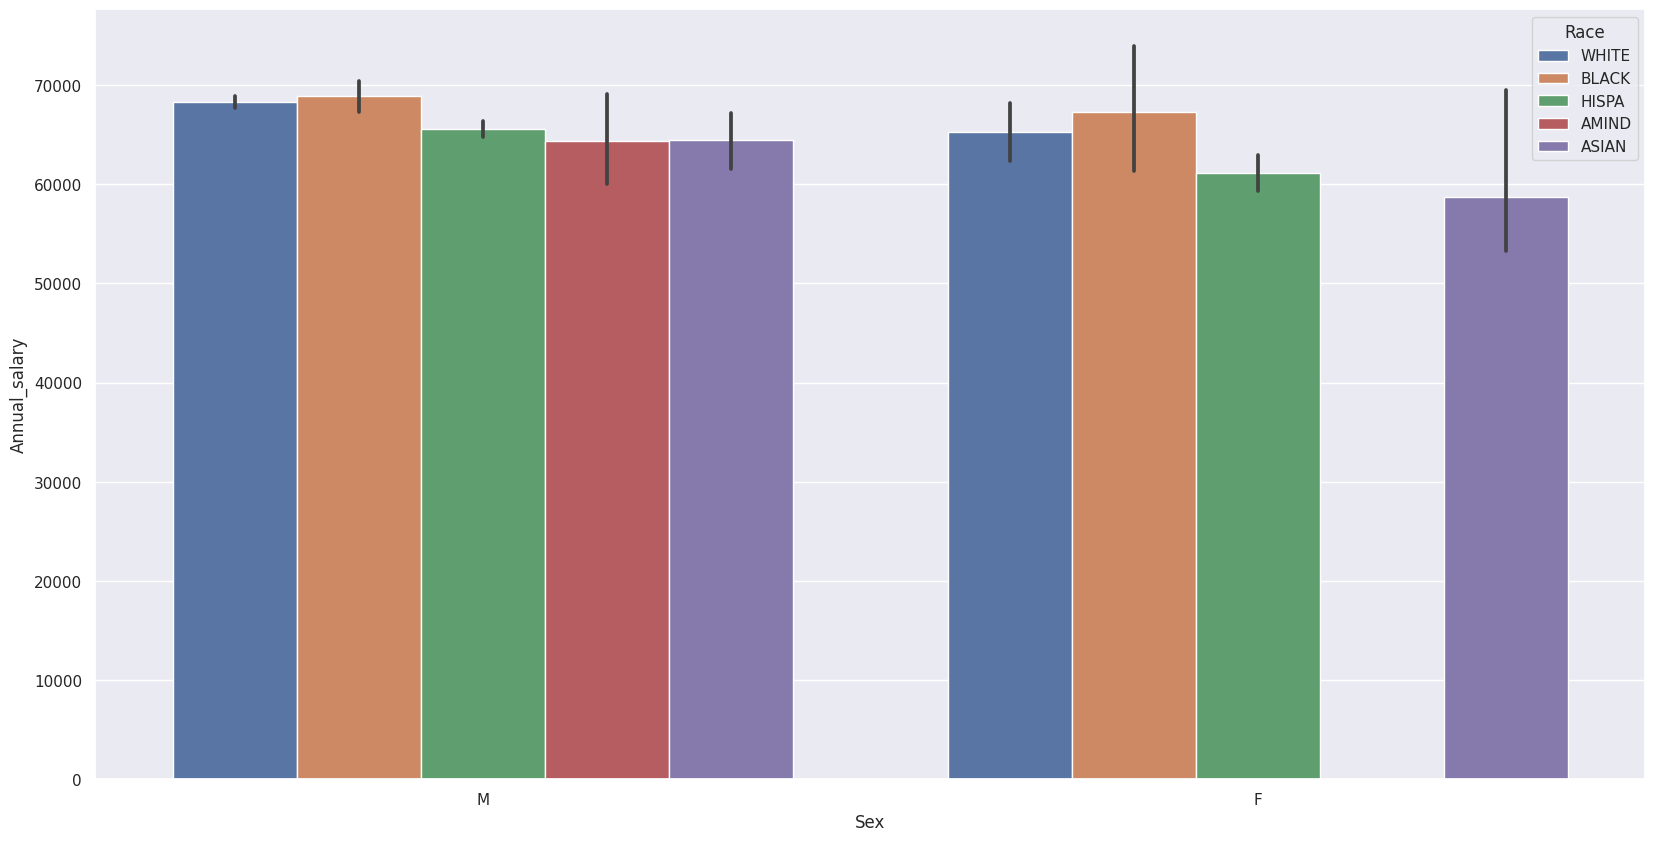

In [ ]:
ax = sns.barplot(x="Sex", y="Annual_salary", data=df, hue='Race')

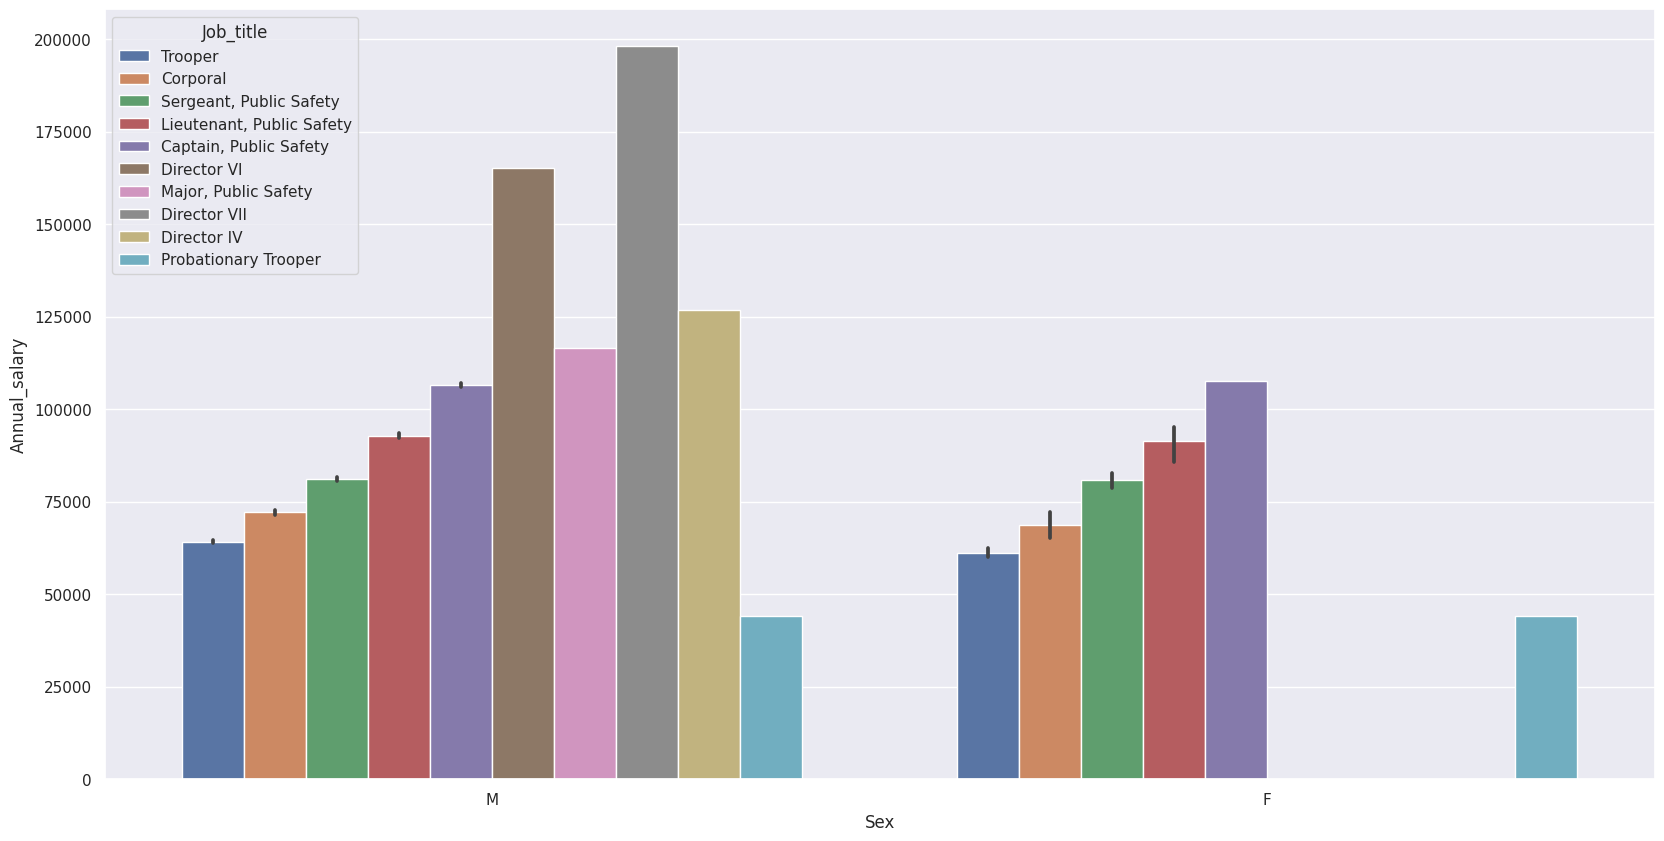

In [ ]:
ax = sns.barplot(x="Sex", y="Annual_salary", data=df, hue='Job_title')

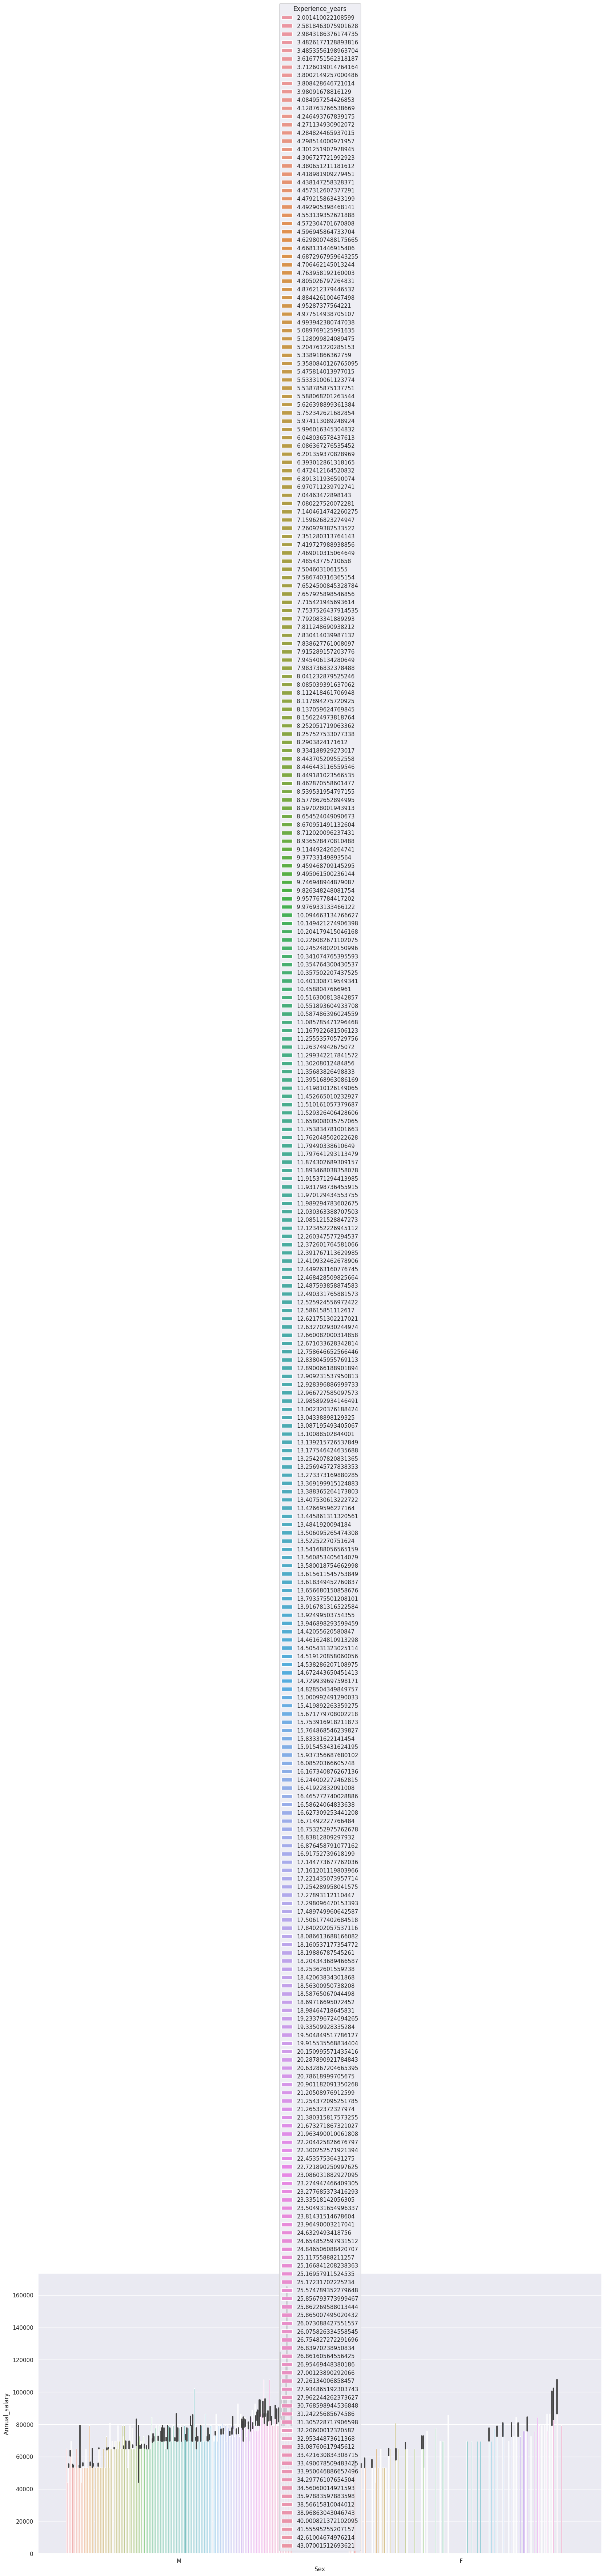

In [ ]:
ax = sns.barplot(x="Sex", y="Annual_salary", data=df, hue='Experience_years')

##### Key Variable Distribution

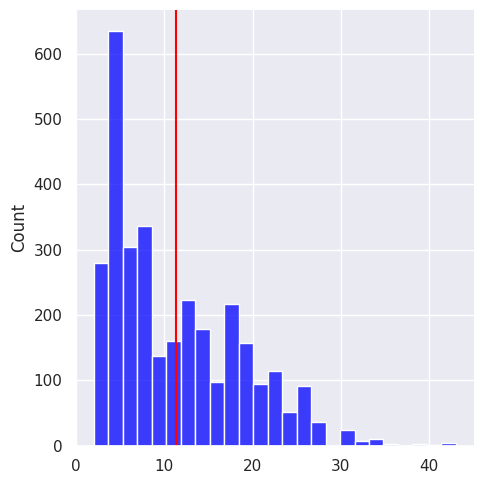

In [ ]:
x = df['Experience_years'].values

sns.displot(x, color = 'blue');

# Calculating the mean
mean = df['Experience_years'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

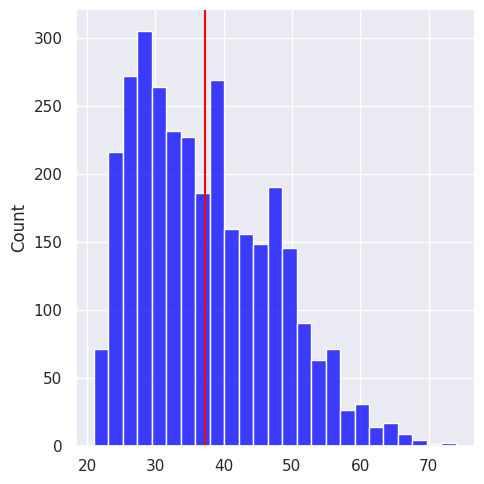

In [ ]:
x = df['Age'].values

sns.displot(x, color = 'blue');

# Calculating the mean
mean = df['Age'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

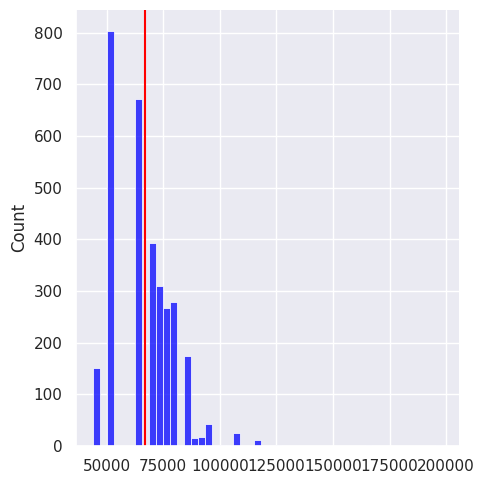

In [ ]:
x = df['Annual_salary'].values

sns.displot(x, color = 'blue');

# Calculating the mean
mean = df['Annual_salary'].mean()

#ploting the mean
plt.axvline(mean, 0,1, color = 'red')

The meadian is:  64918.92


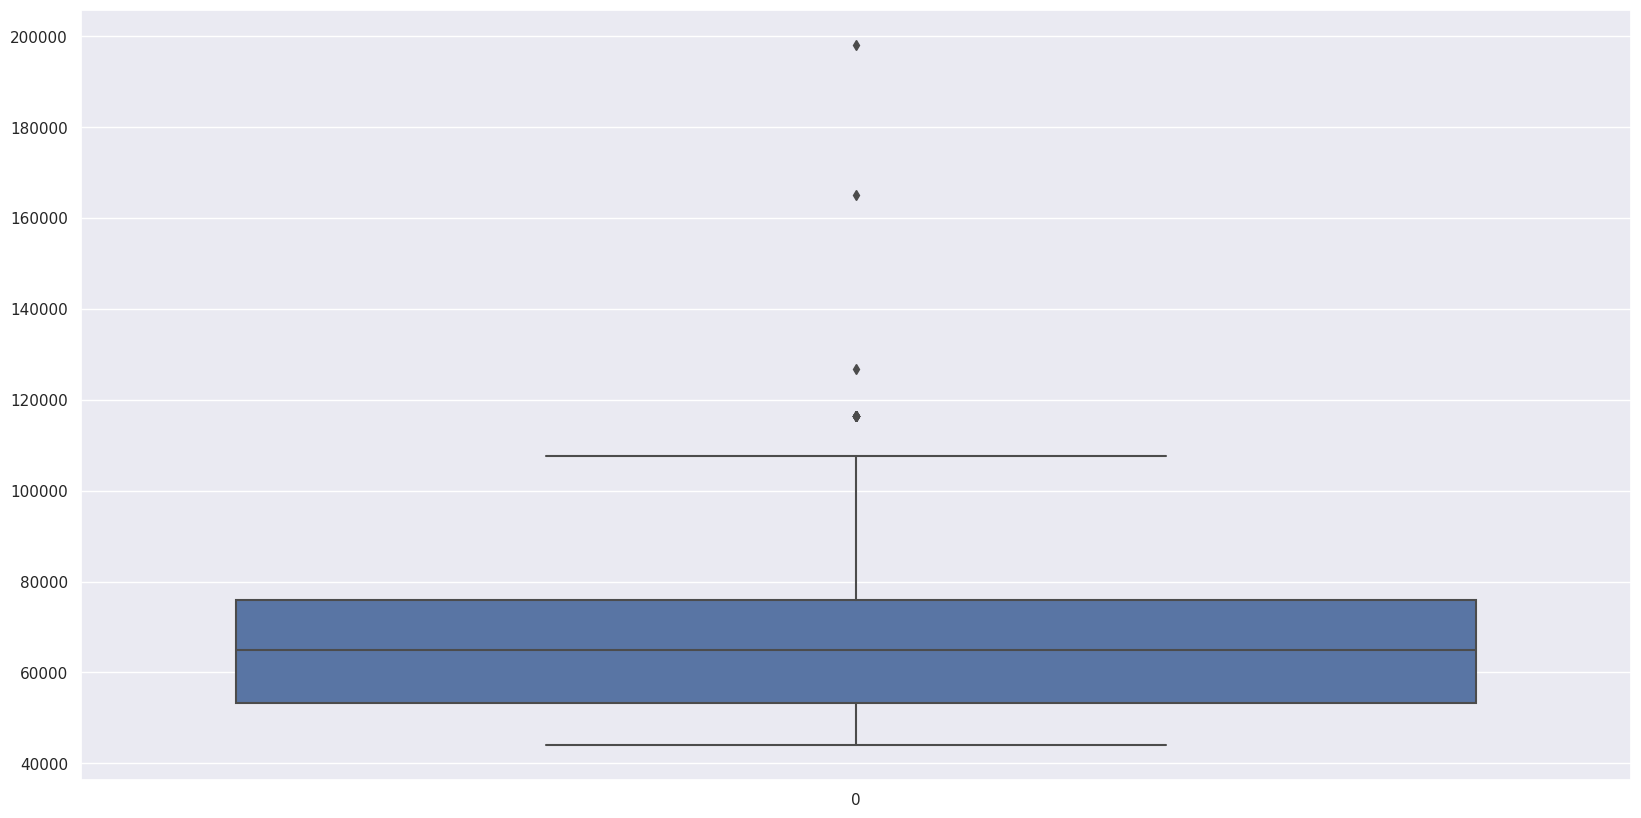

In [ ]:
x = df['Annual_salary'].values

ax = sns.boxplot(x)

print('The meadian is: ', df['Annual_salary'].median())

The meadian is:  35.0


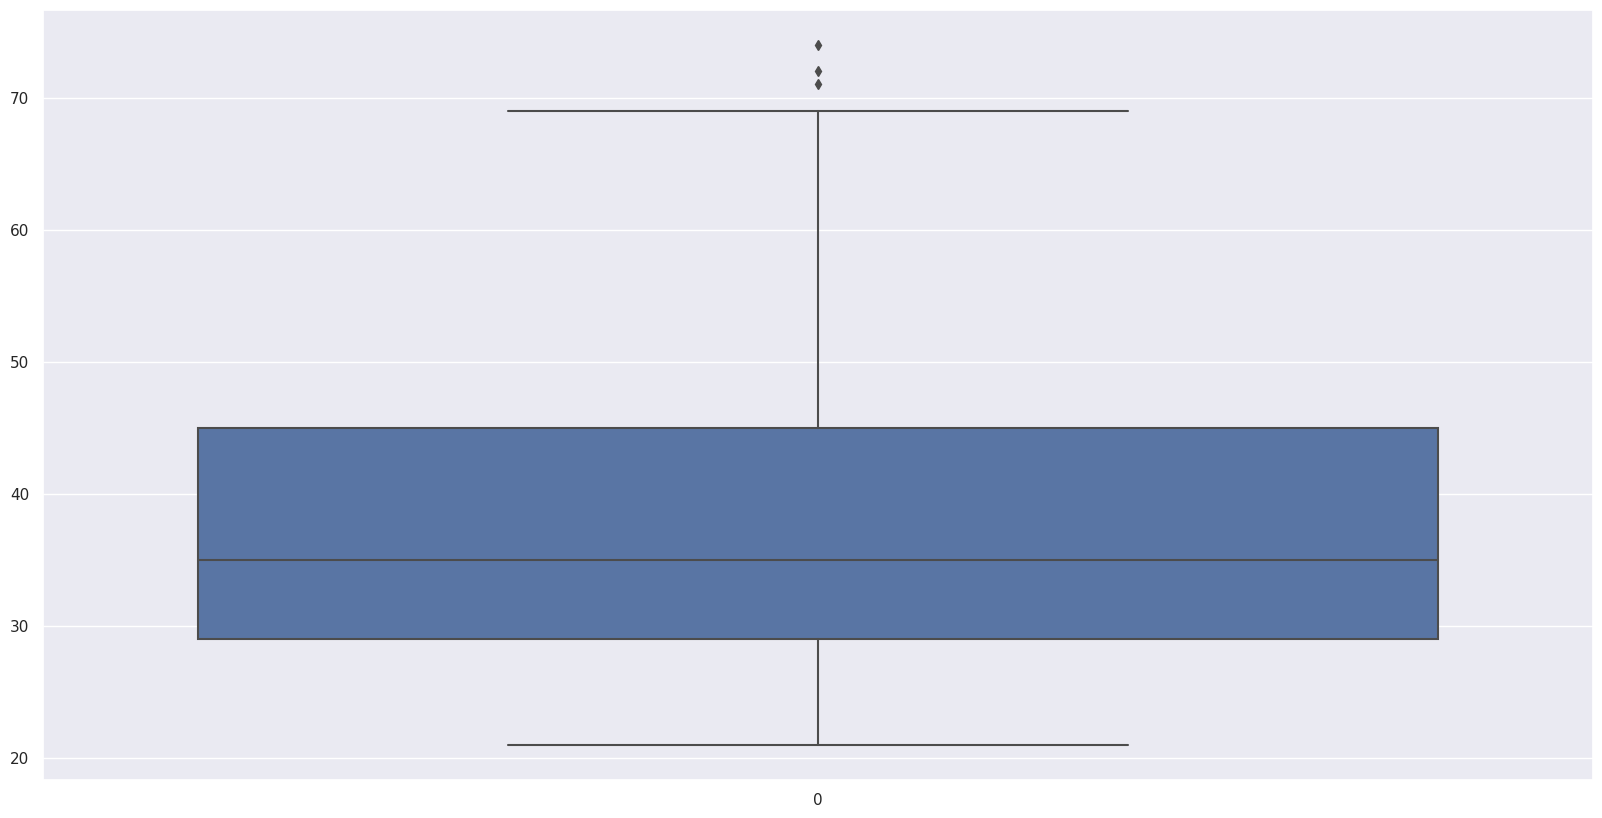

In [ ]:
x = df['Age'].values

ax = sns.boxplot(x)

print('The meadian is: ', df['Age'].median())

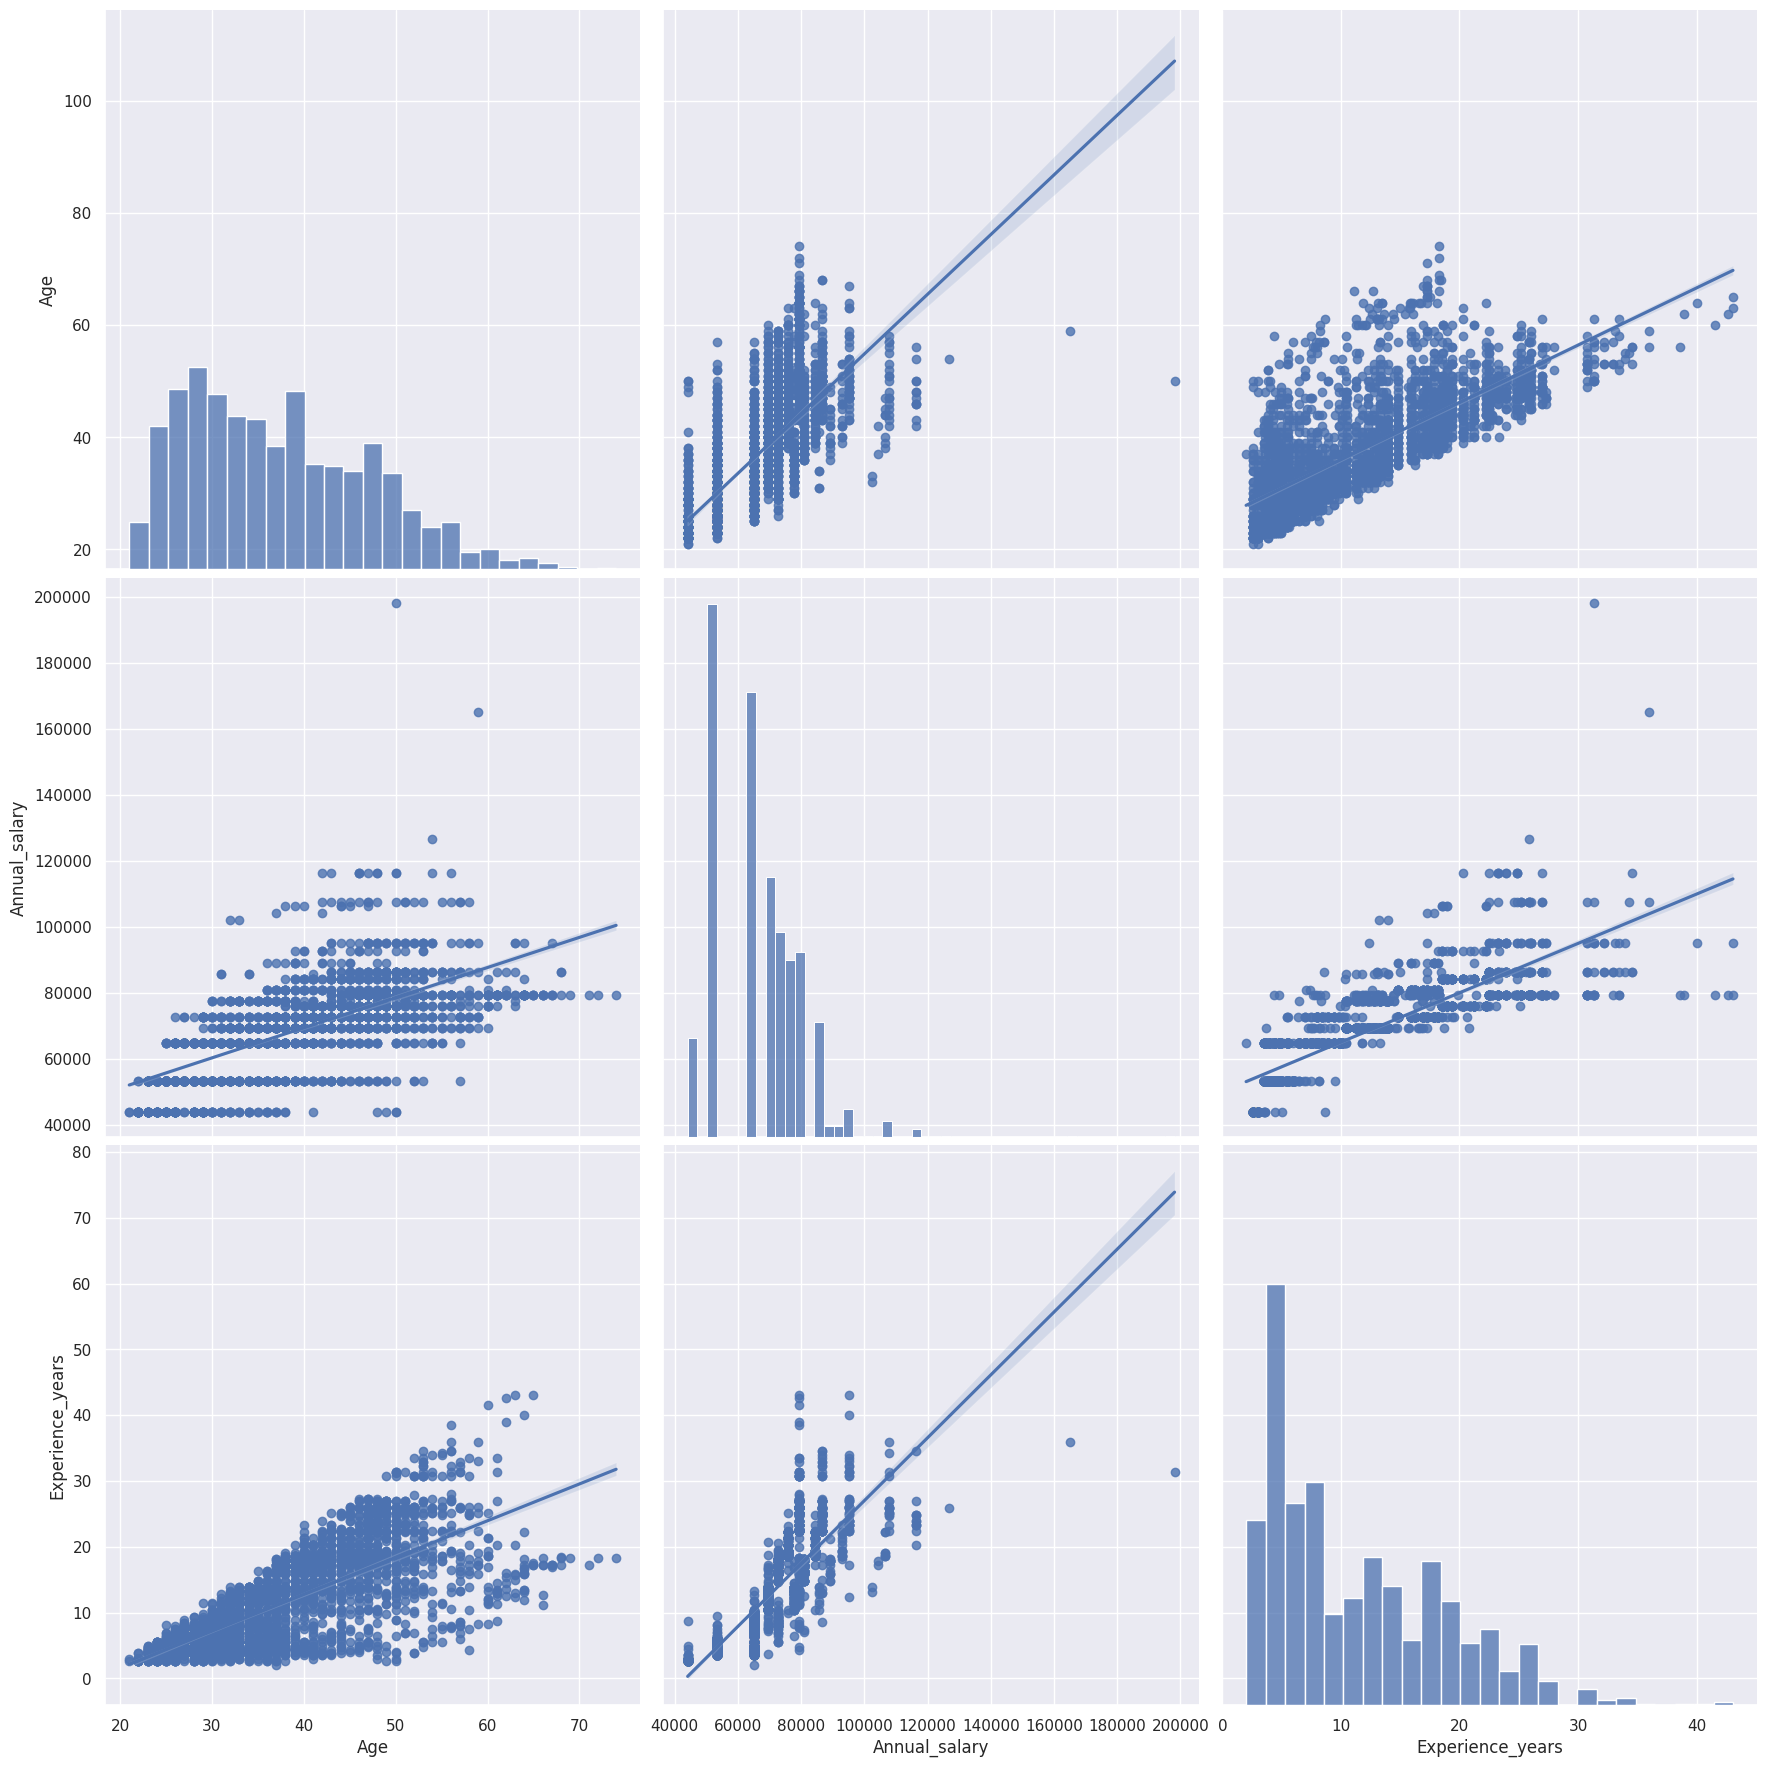

In [ ]:
g = sns.pairplot(df[['Age','Annual_salary','Experience_years']], kind="reg", height = 6)

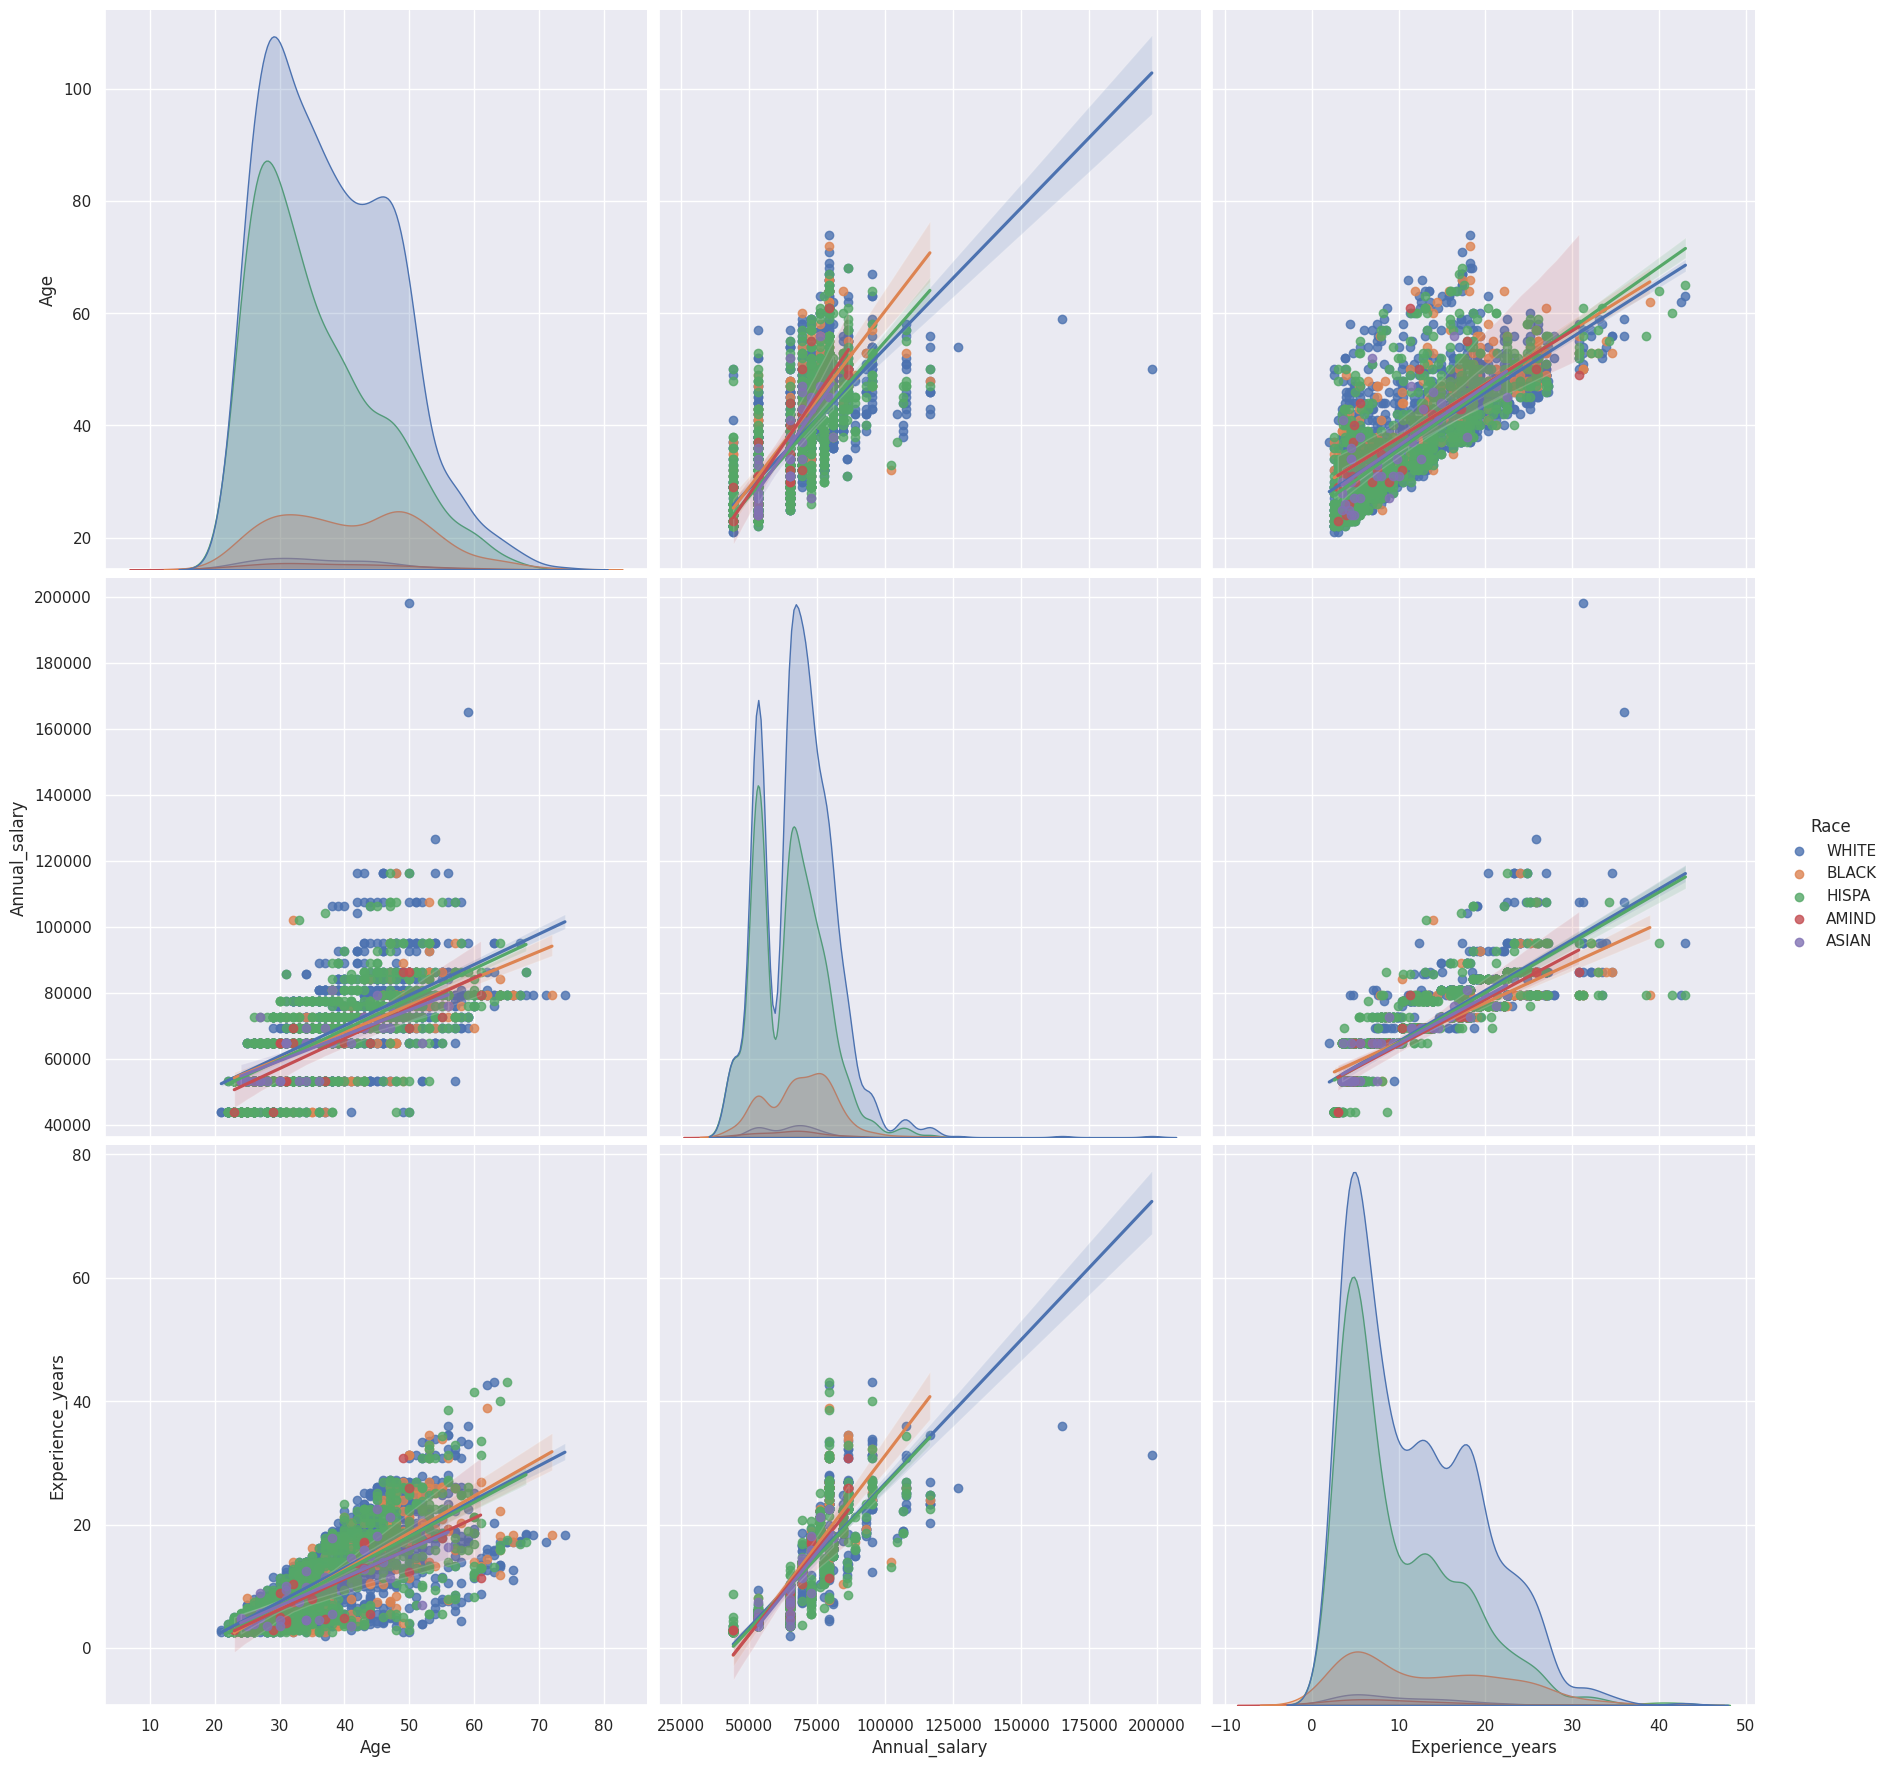

In [ ]:
g = sns.pairplot(df[['Age','Annual_salary', 'Experience_years','Race']], hue = 'Race', kind="reg", height = 6)

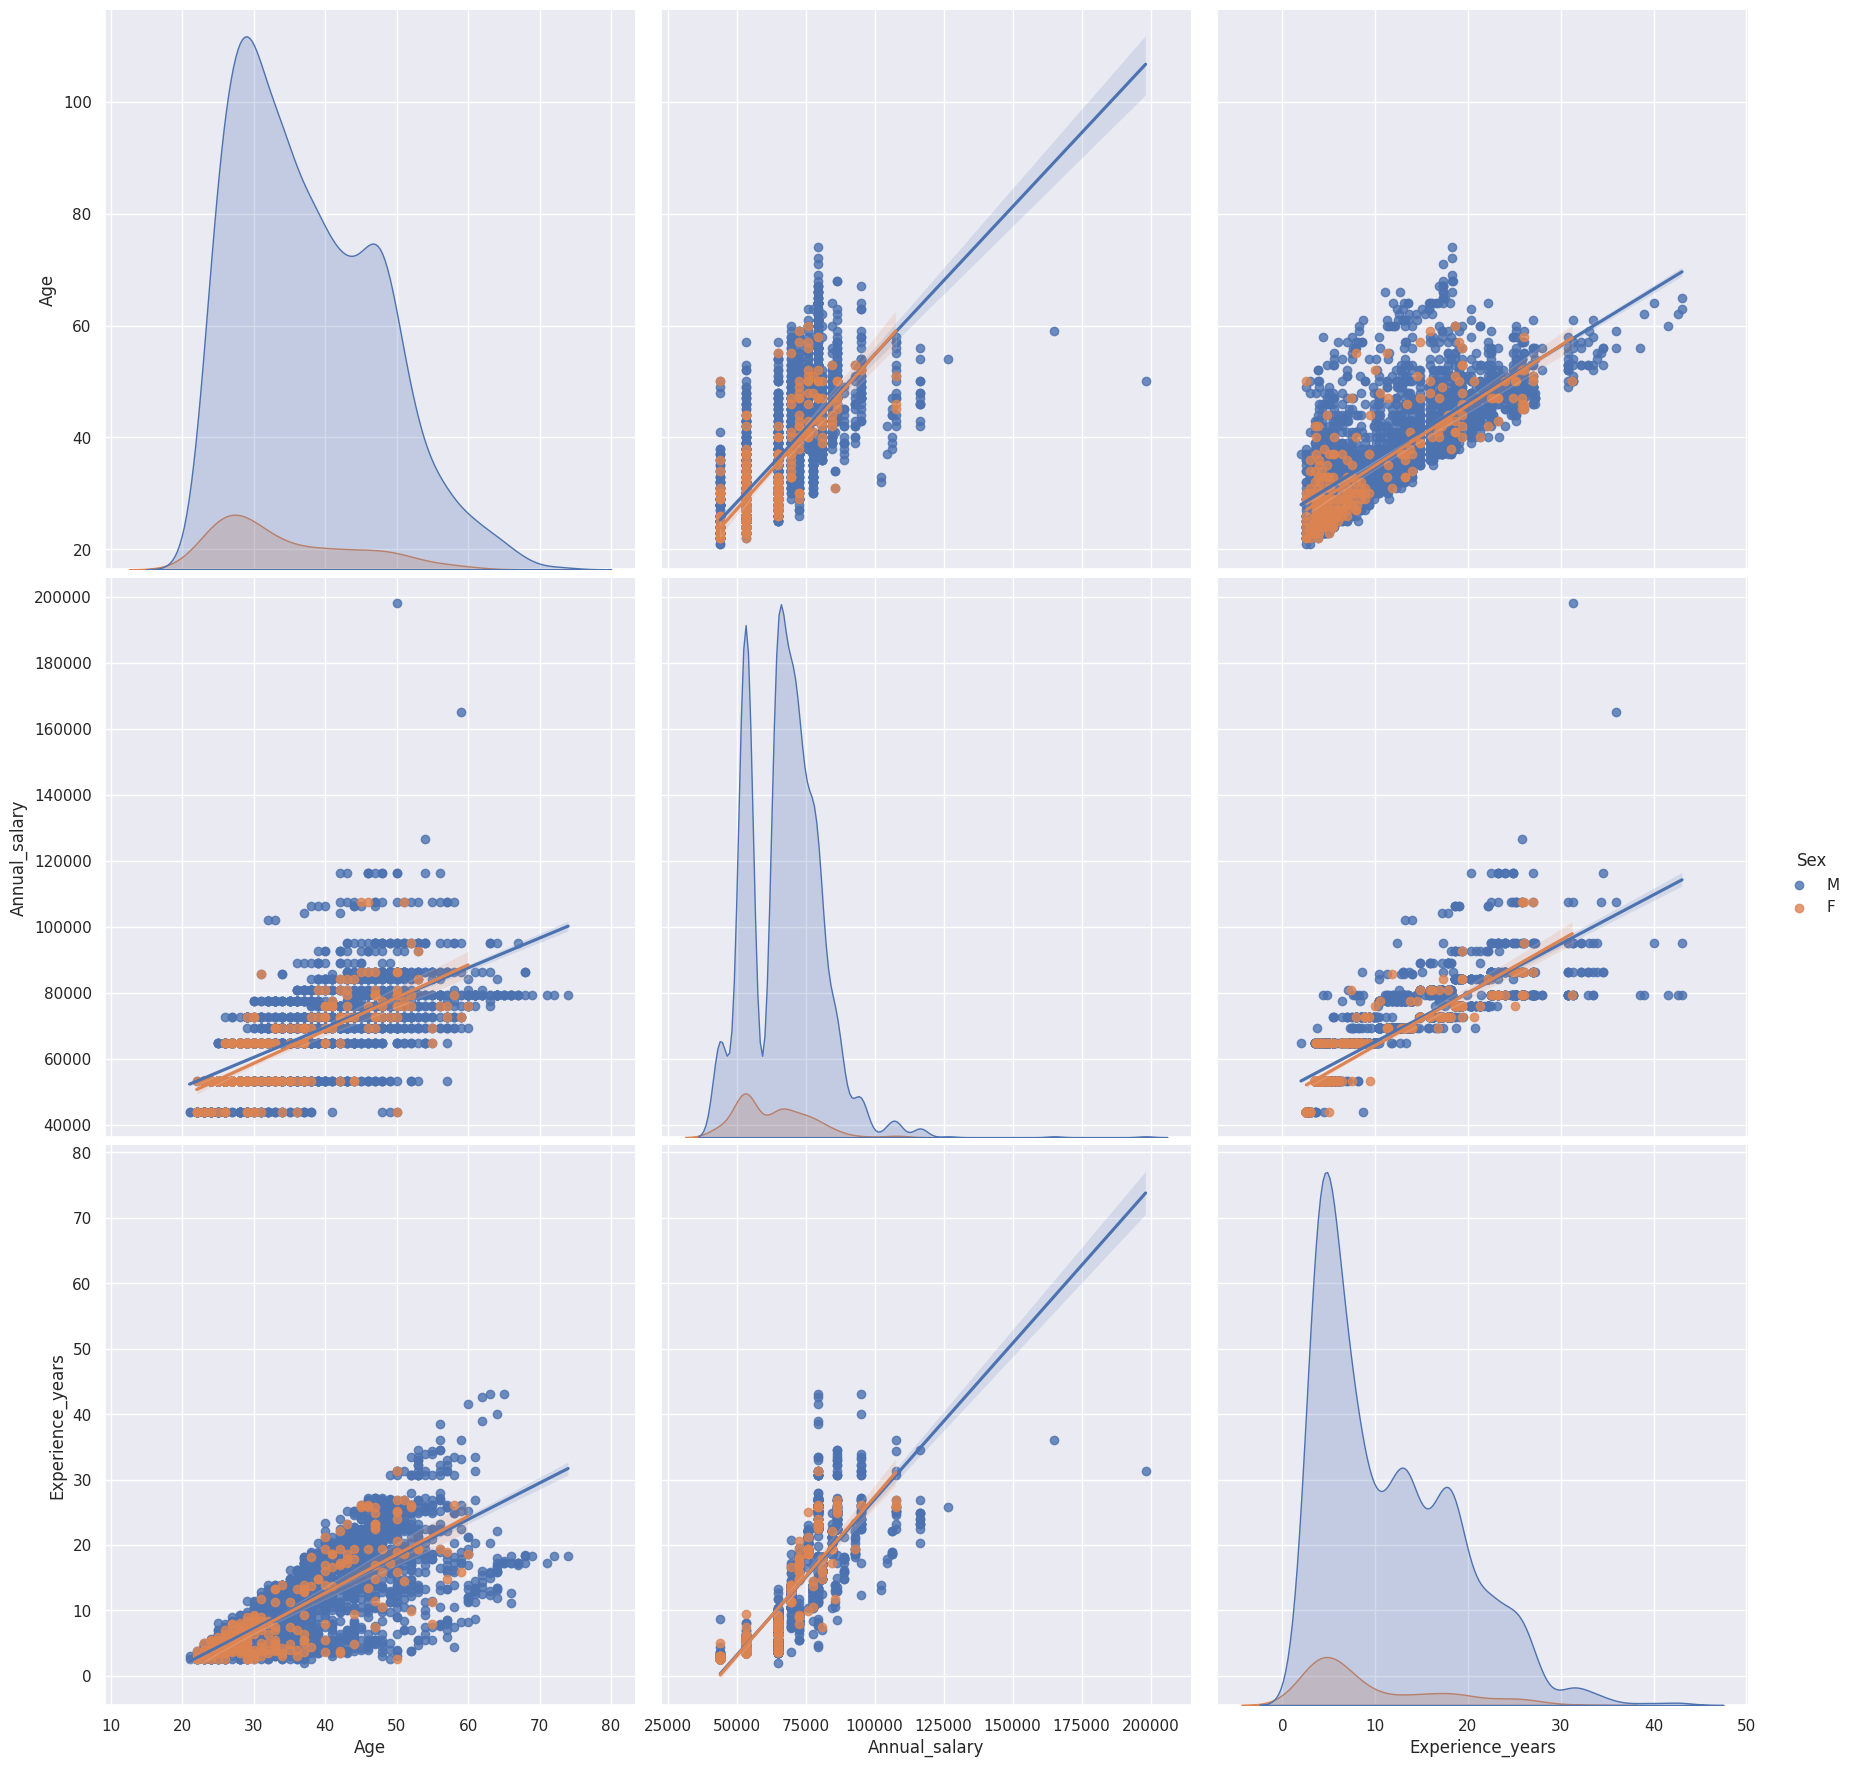

In [ ]:
g = sns.pairplot(df[['Age','Annual_salary','Experience_years', 'Sex']], hue = 'Sex', kind="reg", height = 6)

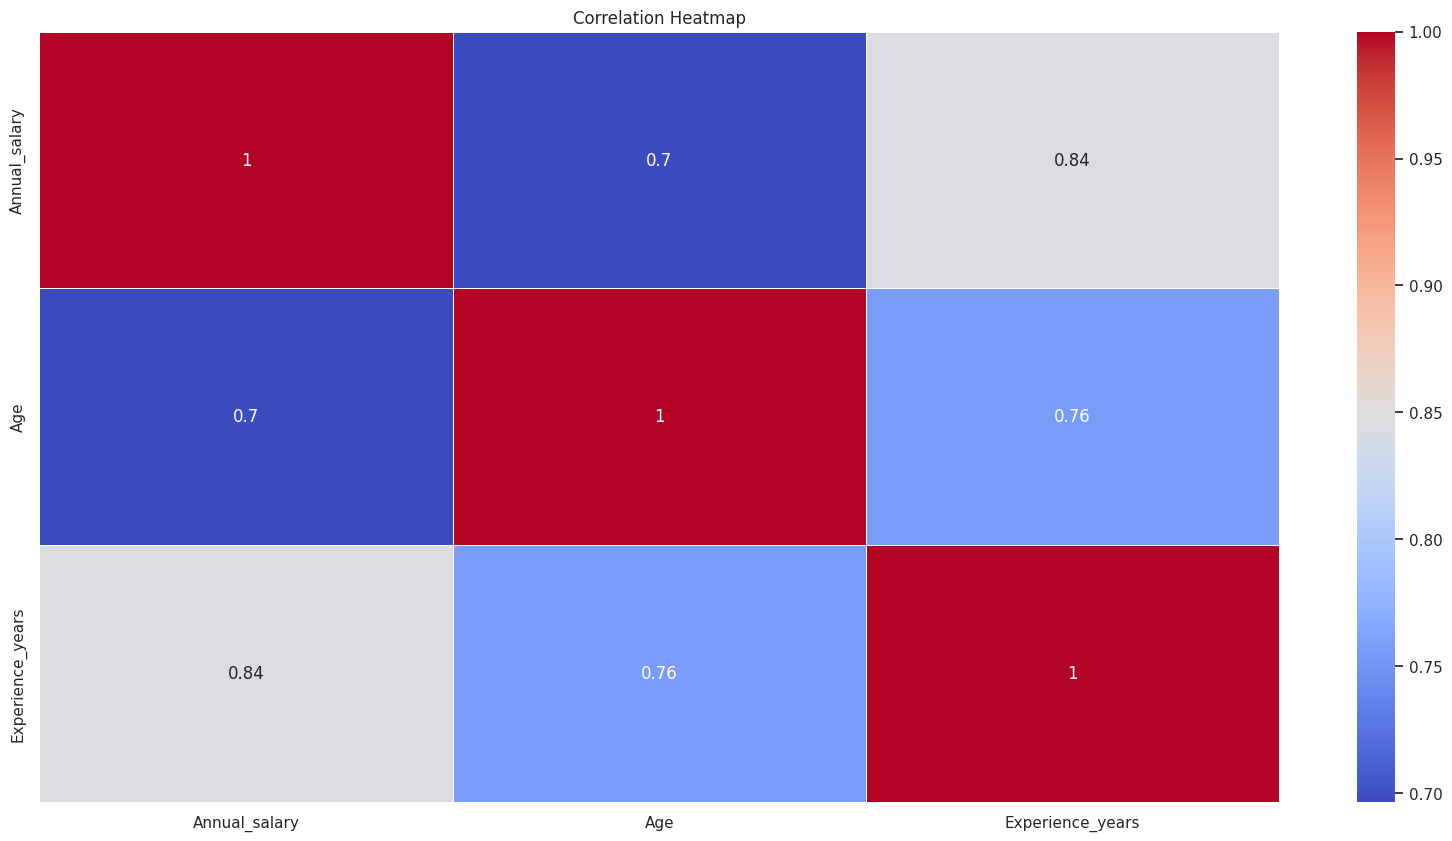

In [ ]:
# Heatmap

numeric_cols = ['Annual_salary', 'Age', 'Experience_years']
correlation_matrix = df[numeric_cols].corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

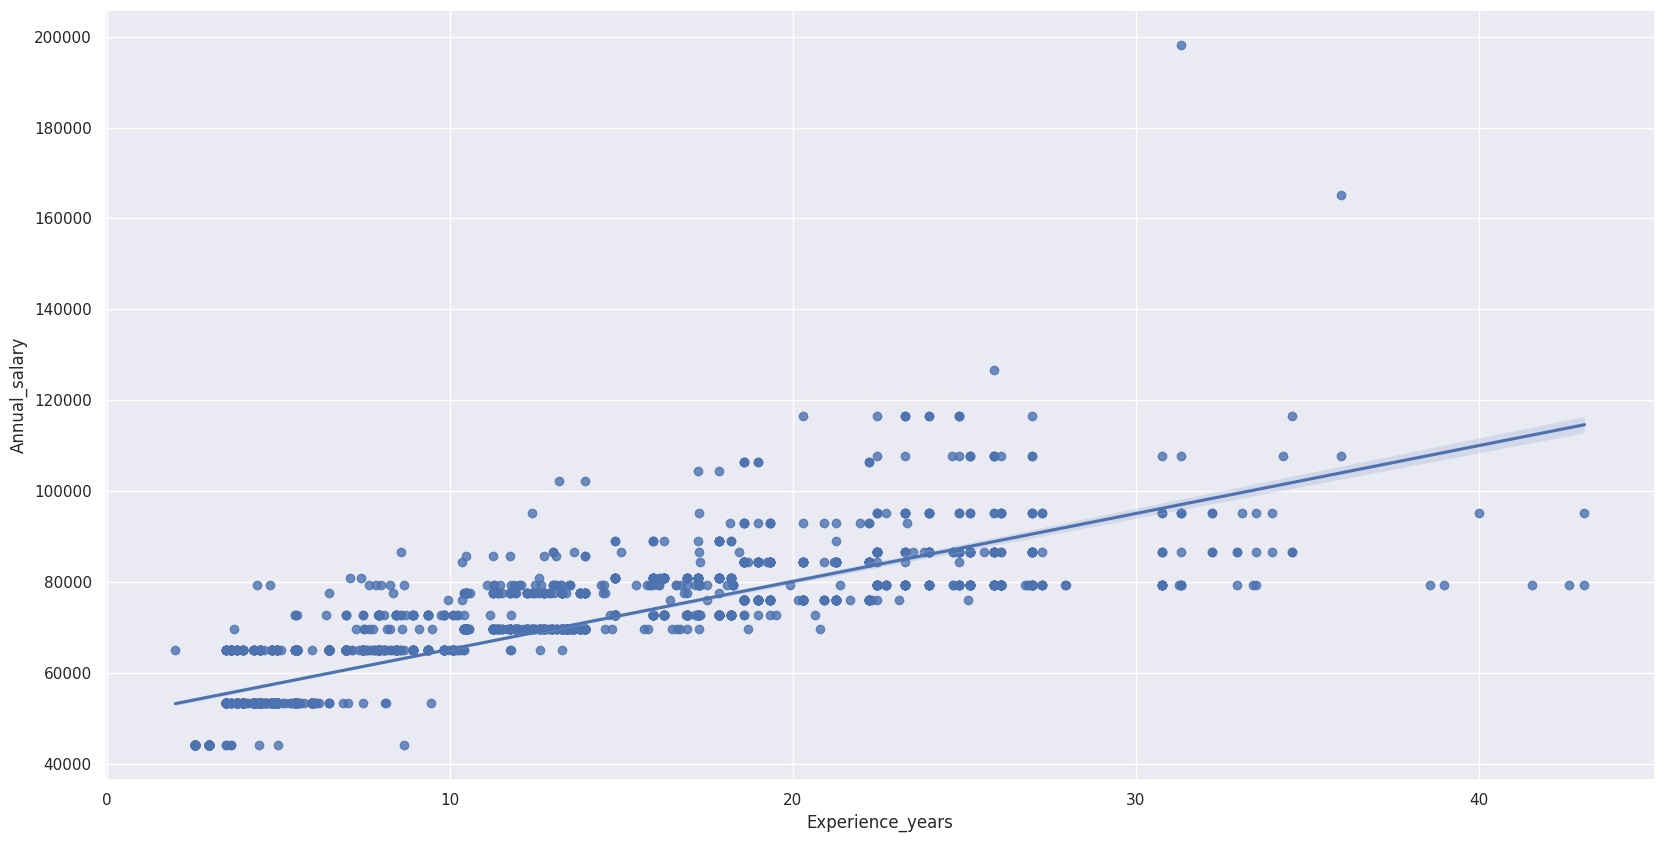

In [ ]:
ax = sns.regplot(x='Experience_years', y='Annual_salary', data =df)

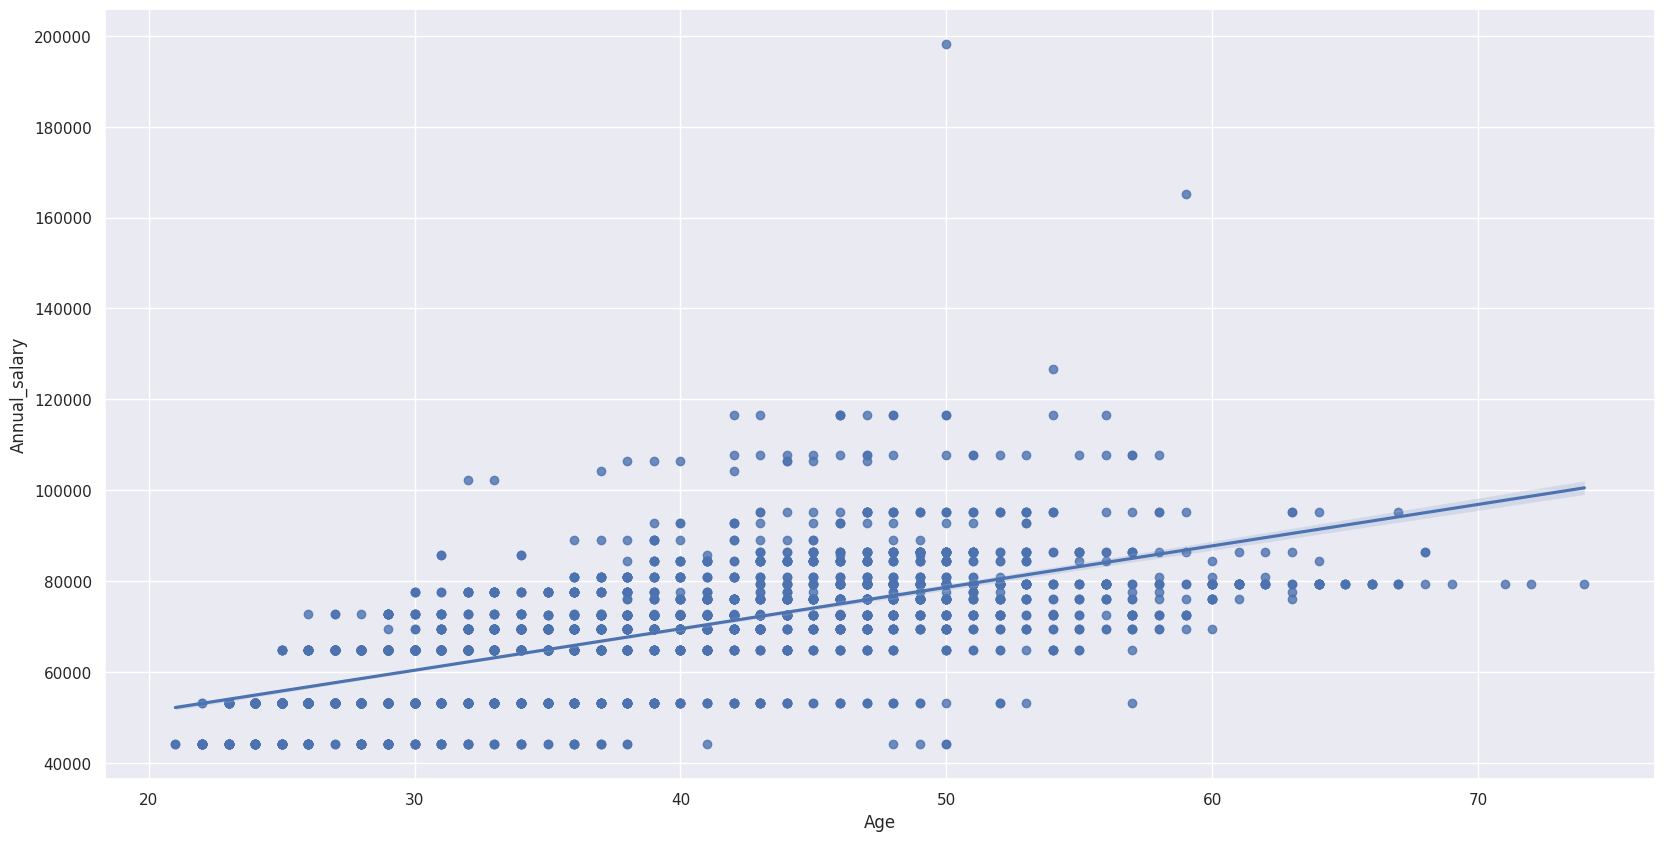

In [ ]:
ax = sns.regplot(x='Age', y='Annual_salary', data =df)

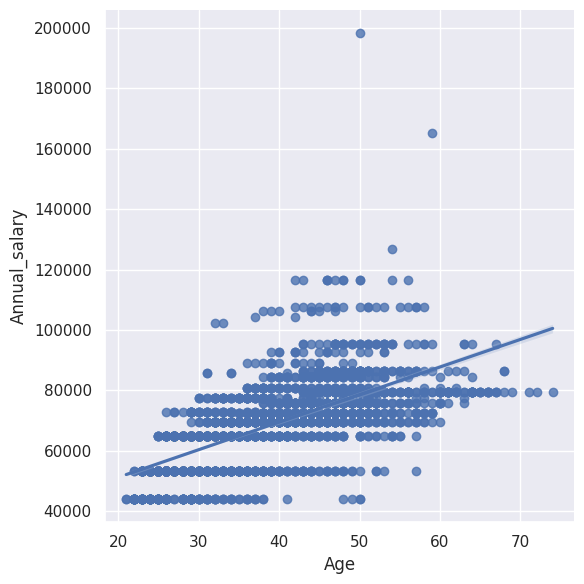

In [ ]:
ax = sns.lmplot(x="Age", y="Annual_salary", data=df, height=6)

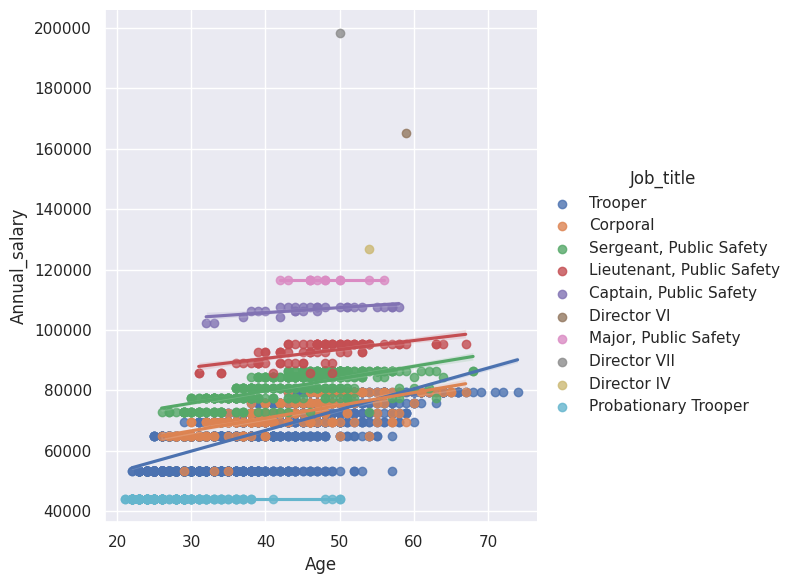

In [ ]:
ax = sns.lmplot(x="Age", y="Annual_salary", data=df, hue = 'Job_title', height=6)

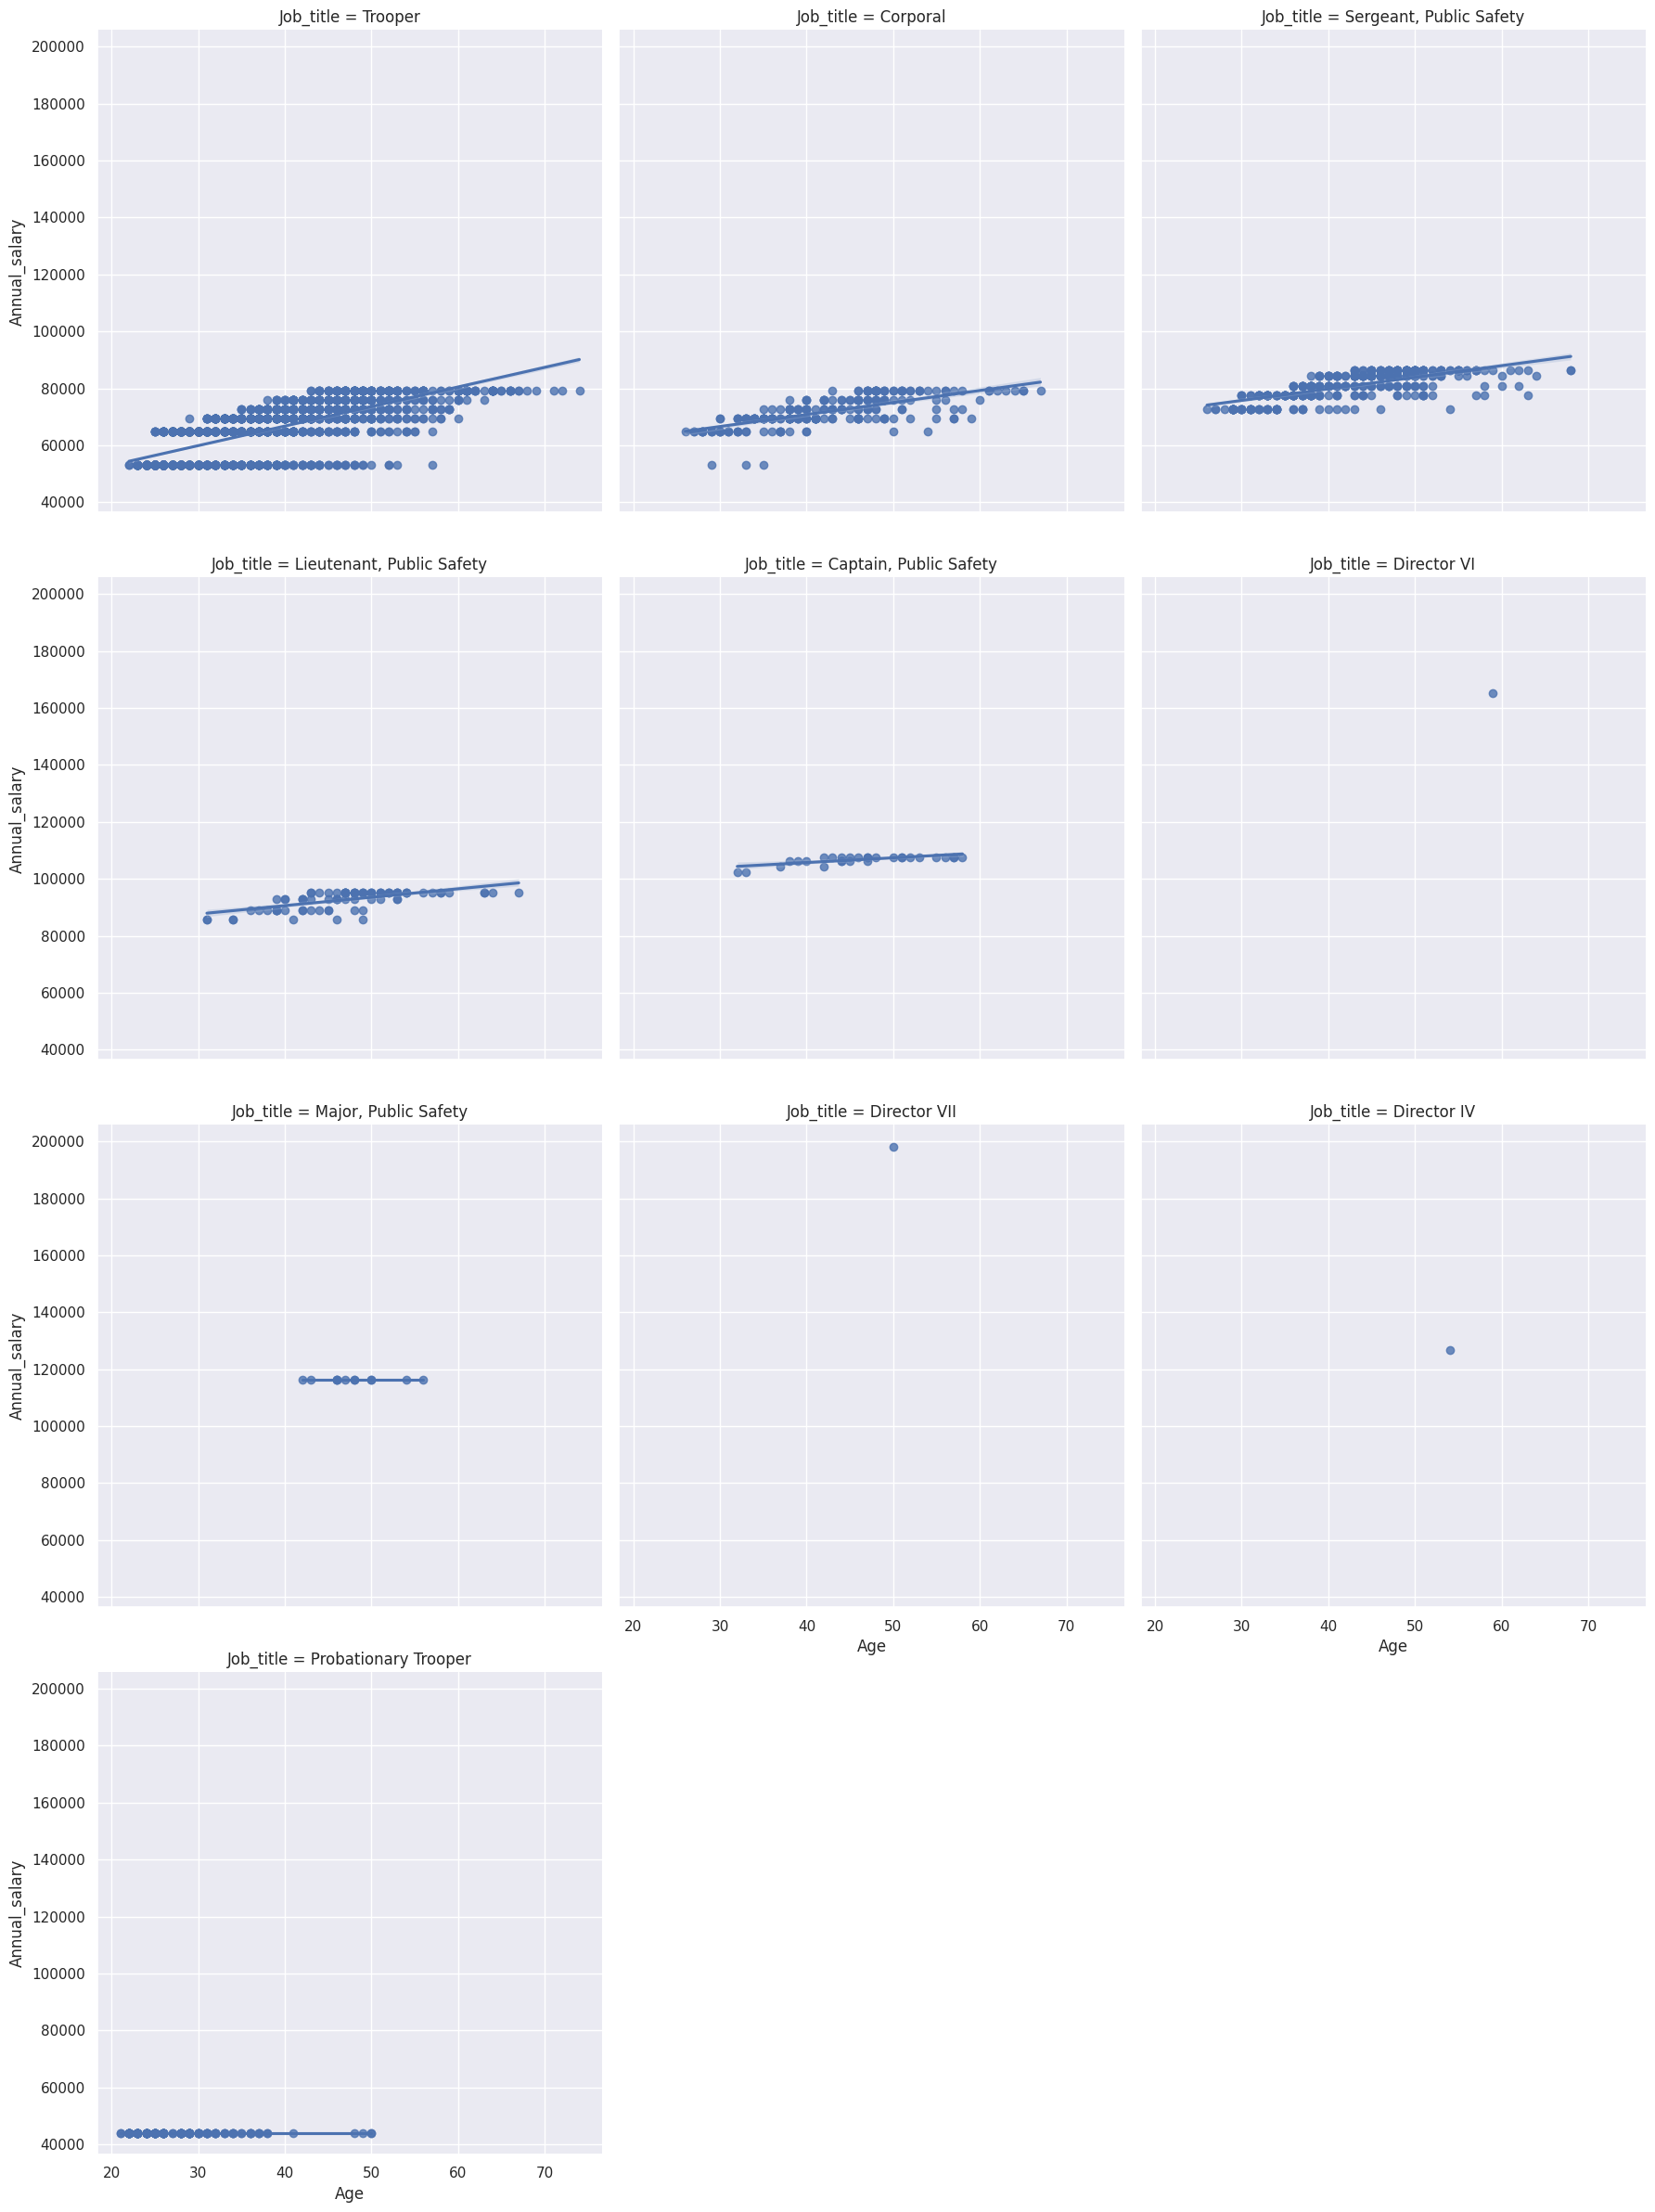

In [ ]:
ax = sns.lmplot(x="Age", y="Annual_salary", data=df, col = 'Job_title', height=6, col_wrap=3)

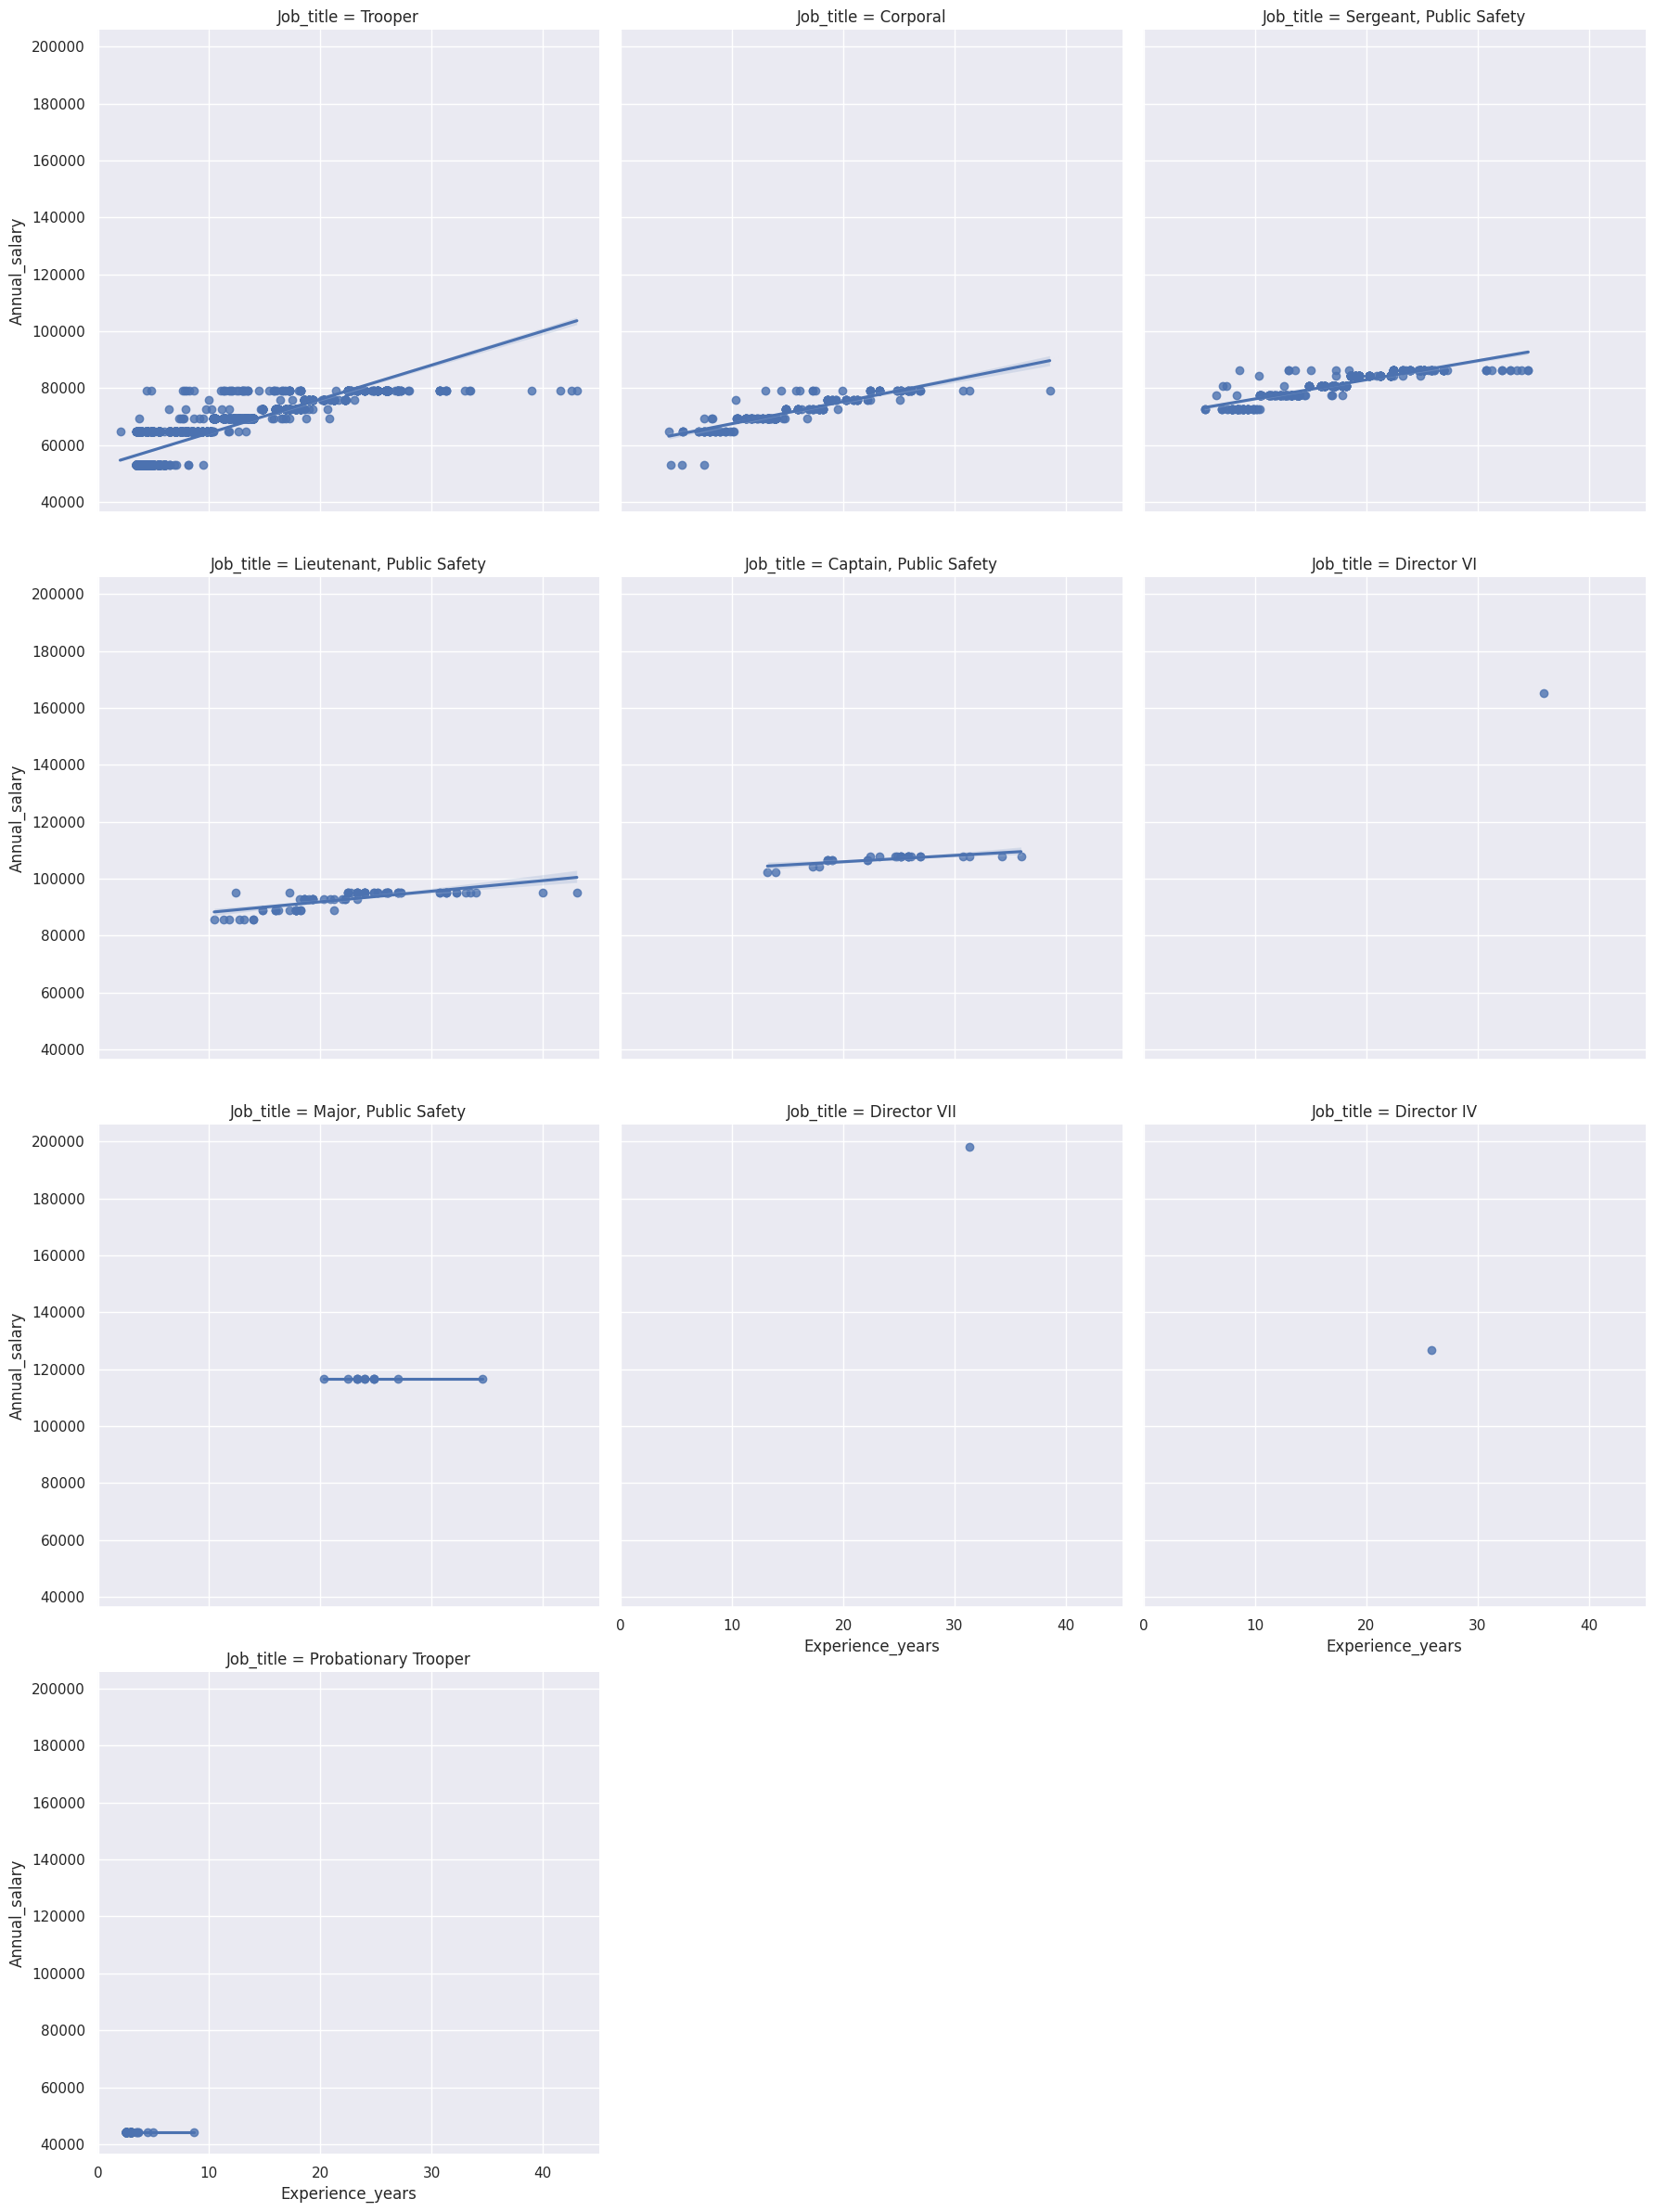

In [ ]:
ax = sns.lmplot(x="Experience_years", y="Annual_salary", data=df, col = 'Job_title', height=6, col_wrap=3)

##### Report on key covariates- Sex, Race, Job_title, Experience_years, Age

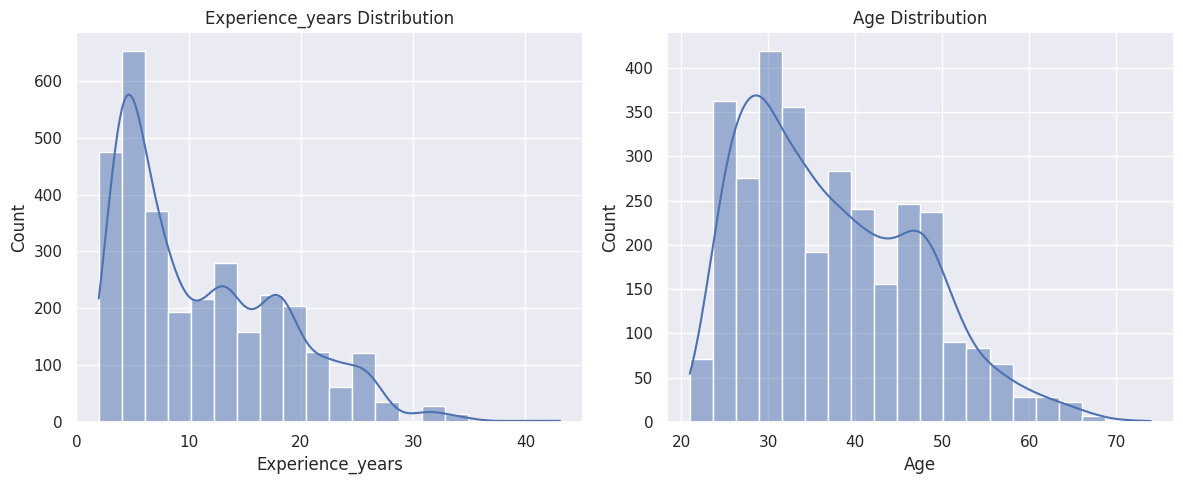

In [ ]:
# Create histograms
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Experience_years', bins=20, kde=True)
plt.title('Experience_years Distribution')

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='Age', bins=20, kde=True)
plt.title('Age Distribution')
plt.tight_layout()
plt.show()

In [ ]:
sex_counts = df['Sex'].value_counts()
race_counts = df['Race'].value_counts()
job_title_counts = df['Job_title'].value_counts()

sex_proportions = df['Sex'].value_counts(normalize=True)
race_proportions = df['Race'].value_counts(normalize=True)
job_title_proportions = df['Job_title'].value_counts(normalize=True)

In [ ]:
# Create DataFrames for counts and proportions
counts_df = pd.DataFrame({
    'Sex Counts': sex_counts,
    'Race Counts': race_counts,
    'Job Title Counts': job_title_counts
})

proportions_df = pd.DataFrame({
    'Sex Proportions': sex_proportions,
    'Race Proportions': race_proportions,
    'Job Title Proportions': job_title_proportions
})

# Display the DataFrames
print("Counts:")
print(counts_df)

print("\nProportions:")
print(proportions_df)

Counts:
                           Sex Counts  Race Counts  Job Title Counts
AMIND                             NaN         24.0               NaN
ASIAN                             NaN         37.0               NaN
BLACK                             NaN        245.0               NaN
Captain, Public Safety            NaN          NaN              29.0
Corporal                          NaN          NaN             233.0
Director IV                       NaN          NaN               1.0
Director VI                       NaN          NaN               1.0
Director VII                      NaN          NaN               1.0
F                               241.0          NaN               NaN
HISPA                             NaN       1099.0               NaN
Lieutenant, Public Safety         NaN          NaN              83.0
M                              2926.0          NaN               NaN
Major, Public Safety              NaN          NaN              12.0
Probationary Trooper      

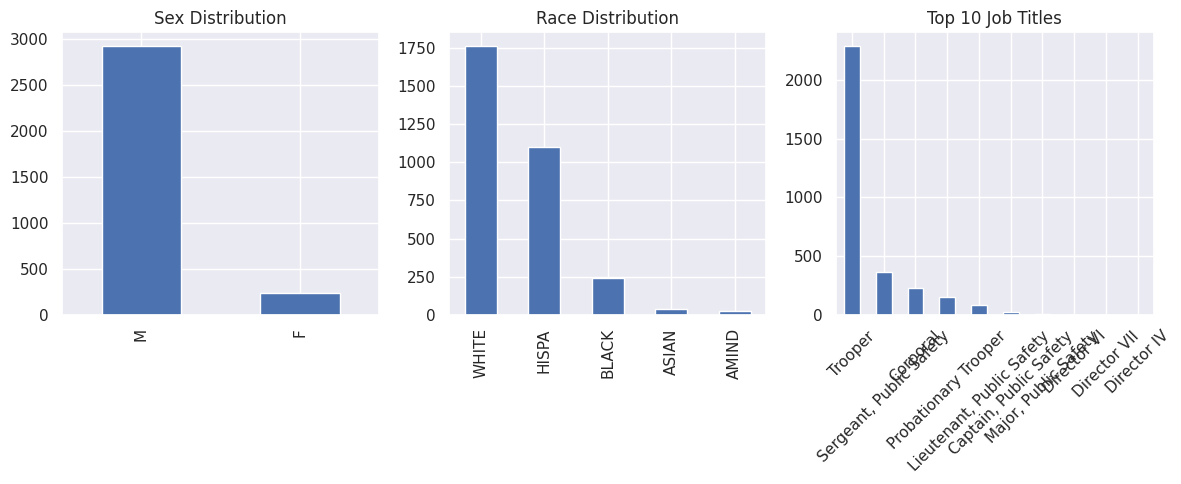

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 3, 1)
sex_counts.plot(kind='bar', title='Sex Distribution')

plt.subplot(1, 3, 2)
race_counts.plot(kind='bar', title='Race Distribution')

plt.subplot(1, 3, 3)
job_title_counts.head(10).plot(kind='bar', title='Top 10 Job Titles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Question 2: Advanced Regression Analysis
##### Enhancing the Dataset: I will incorporate interaction and power terms into my dataset.
##### OLS Regression: I will execute the Ordinary Least Squares (OLS) regression using the enhanced dataset.
##### Results Interpretation: I will report and interpret the regression results. Do the outcomes align logically with your expectations?
##### Bootstrap Analysis: I will bootstrap the clustered standard errors. Justify your choice of clustering level.

In [ ]:
# Selecting my variables for machine learning
df1 = df[['Job_title','Annual_salary','Age','Sex','Race','Experience_years']]

In [ ]:
df1

Job_title  Annual_salary  Age Sex   Race  Experience_years
0                     Trooper       79323.00   74   M  WHITE         18.253626
1                    Corporal       69540.96   34   M  BLACK         13.369200
2                     Trooper       79323.00   69   M  WHITE         18.253626
3                     Trooper       79323.00   71   M  WHITE         17.254290
4     Sergeant, Public Safety       86494.92   68   M  WHITE         18.420638
...                       ...            ...  ...  ..    ...               ...
3162     Probationary Trooper       44082.00   30   M  WHITE          2.581846
3163     Probationary Trooper       44082.00   23   M  BLACK          2.581846
3164     Probationary Trooper       44082.00   22   F  HISPA          2.581846
3165     Probationary Trooper       44082.00   24   M  BLACK          2.581846
3166     Probationary Trooper       44082.00   26   M  HISPA          2.581846

[3167 rows x 6 columns]

In [ ]:
#encoding my categories

df2 = pd.get_dummies(df1, columns = ['Sex', 'Race','Job_title'])

In [ ]:
df2

Annual_salary  Age  Experience_years  Sex_F  Sex_M  Race_AMIND  \
0          79323.00   74         18.253626      0      1           0   
1          69540.96   34         13.369200      0      1           0   
2          79323.00   69         18.253626      0      1           0   
3          79323.00   71         17.254290      0      1           0   
4          86494.92   68         18.420638      0      1           0   
...             ...  ...               ...    ...    ...         ...   
3162       44082.00   30          2.581846      0      1           0   
3163       44082.00   23          2.581846      0      1           0   
3164       44082.00   22          2.581846      1      0           0   
3165       44082.00   24          2.581846      0      1           0   
3166       44082.00   26          2.581846      0      1           0   

      Race_ASIAN  Race_BLACK  Race_HISPA  Race_WHITE  \
0              0           0           0           1   
1              0           1           0           0   
2              0           0           0           1   
3              0           0           0           1   
4              0           0           0           1   
...          ...         ...         ...         ...   
3162           0           0           0           1   
3163           0           1           0           0   
3164           0           0           1           0   
3165           0           1           0           0   
3166           0           0           1           0   

      Job_title_Captain, Public Safety  Job_title_Corporal  \
0                                    0                   0   
1                                    0                   1   
2                                    0                   0   
3                                    0                   0   
4                                    0                   0   
...                                ...                 ...   
3162                                 0                   0   
3163                                 0                   0   
3164                                 0                   0   
3165                                 0                   0   
3166                                 0                   0   

      Job_title_Director IV  Job_title_Director VI  Job_title_Director VII  \
0                         0                      0                       0   
1                         0                      0                       0   
2                         0                      0                       0   
3                         0                      0                       0   
4                         0                      0                       0   
...                     ...                    ...                     ...   
3162                      0                      0                       0   
3163                      0                      0                       0   
3164                      0                      0                       0   
3165                      0                      0                       0   
3166                      0                      0                       0   

      Job_title_Lieutenant, Public Safety  Job_title_Major, Public Safety  \
0                                       0                               0   
1                                       0                               0   
2                                       0                               0   
3                                       0                               0   
4                                       0                               0   
...                                   ...                             ...   
3162                                    0                               0   
3163                                    0                               0   
3164                                    0                               0   
3165            

In [ ]:
# Split the data into X & y

X = df2.drop('Annual_salary', axis = 1).values
X2 = df2.drop('Annual_salary', axis = 1)
y = df2['Annual_salary']

print(X.shape)
print(y.shape)

X

(3167, 19)
(3167,)


array([[74.        , 18.25362602,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [34.        , 13.36919992,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [69.        , 18.25362602,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [22.        ,  2.58184631,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [24.        ,  2.58184631,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [26.        ,  2.58184631,  0.        , ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
df2.columns

Index(['Annual_salary', 'Age', 'Experience_years', 'Sex_F', 'Sex_M',
       'Race_AMIND', 'Race_ASIAN', 'Race_BLACK', 'Race_HISPA', 'Race_WHITE',
       'Job_title_Captain, Public Safety', 'Job_title_Corporal',
       'Job_title_Director IV', 'Job_title_Director VI',
       'Job_title_Director VII', 'Job_title_Lieutenant, Public Safety',
       'Job_title_Major, Public Safety', 'Job_title_Probationary Trooper',
       'Job_title_Sergeant, Public Safety', 'Job_title_Trooper'],
      dtype='object')

##### Enhancing the dataset

In [ ]:
# Enhancing df2

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)
X_poly_df = pd.DataFrame(X_poly, columns=poly.get_feature_names(['Age', 'Experience_years', 'Sex_F', 'Sex_M',
       'Race_AMIND', 'Race_ASIAN', 'Race_BLACK', 'Race_HISPA', 'Race_WHITE',
       'Job_title_Captain, Public Safety', 'Job_title_Corporal',
       'Job_title_Director IV', 'Job_title_Director VI',
       'Job_title_Director VII', 'Job_title_Lieutenant, Public Safety',
       'Job_title_Major, Public Safety', 'Job_title_Probationary Trooper',
       'Job_title_Sergeant, Public Safety', 'Job_title_Trooper']))
ml = pd.concat([df2, X_poly_df], axis=1)
# ml is my machine learning dataframe

AttributeError: ignored

In [ ]:
pd.set_option('display.max_columns', None)
ml.head(10)

In [ ]:
ml.columns

In [ ]:
ml.dropna(inplace=True)  # This removes rows with missing values

In [ ]:
ml.head()

In [ ]:
# Dropping non-numeric variables

ml = ml.select_dtypes(include=['number'])

##### OLS Regression

In [ ]:
import pandas as pd
import statsmodels.api as sm

# Convert columns to appropriate data types and handle missing values
ml['Age'] = ml['Age'].astype(float)  # Convert 'Age' column to float if needed
ml['Experience_years'] = ml['Experience_years'].astype(float)  # Convert 'Experience_years' to float if needed

# Define your dependent variable (target)
y = ml['Annual_salary']

# Define your independent variables (features)
X = ml.drop(columns=['Annual_salary'])  # Remove the dependent variable

# Add a constant (intercept) to the independent variables
X = sm.add_constant(X)

# Fit the OLS regression model
model = sm.OLS(y, X).fit()

# Print the regression summary
print(model.summary())


##### Bootstrapping the clustered errors

In [ ]:
ml.columns

In [ ]:
# Checking for multicollinearity

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your DataFrame of independent variables
# Drop the constant (intercept) if it exists
if 'const' in X.columns:
    X = X.drop(columns=['const'])

# Calculate VIF for each variable
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif)


In [ ]:
# import statsmodels.api as sm

# # Convert columns to appropriate data types and handle missing values
# ml['Age'] = ml['Age'].astype(float)  # Convert 'Age' column to float if needed
# ml['Experience_years'] = ml['Experience_years'].astype(float)  # Convert 'Experience_years' to float if needed

# # Define your dependent variable (target)
# y = ml['Annual_salary']

# # Define your independent variables (features)
# X = ml.drop(columns=['Annual_salary'])  # Remove the dependent variable

# # Add a constant (intercept) to the independent variables
# X = sm.add_constant(X)

# # Fit the OLS regression model with bootstrap clustered errors
# model = sm.OLS(y, X).fit(cov_type='cluster', cov_kwds={'groups': ml['Age Sex_F']})

# # Print the regression summary
# print(model.summary())


### Question 3: Residualization and Model Evaluation
##### Residualization Techniques: I will implement the residualization technique using the following methods:

###### Ordinary Least Squares (OLS)
###### LASSO
###### Ridge
##### Pre-analysis Assessment: I will examine the models to determine if any pre-analysis tasks are required.
##### Performance Evaluation: I will assess the performance of each model. Can you draw conclusions regarding their effectiveness?

##### Ordinary Least Squares (OLS) Residualization technique

In [ ]:
# Calculate residuals from the original OLS model
residuals = model.resid

# Create a new dependent variable using residuals
y_residual = residuals

# Fit a new OLS model with the residuals as the dependent variable
model_residual = sm.OLS(y_residual, X).fit()

# Print the summary of the new model
print(model_residual.summary())


##### OLS Performance Evaluation

In [ ]:
# Calculate residuals from the original OLS model
residuals = model.resid

# Create a new dependent variable using residuals
y_residual = residuals

# Fit a new OLS model with the residuals as the dependent variable
model_residual = sm.OLS(y_residual, X).fit()

# Calculate R-squared for the new model
r_squared_residual = model_residual.rsquared

# Print the R-squared value
print("OLS R-squared for the residual model:", r_squared_residual)

In [ ]:

# Get predicted values from the model
predicted_values = model.predict()

# Calculate residuals (observed - predicted)
residuals = y - predicted_values

# Calculate RMSE
rmse = np.sqrt(np.mean(residuals**2))

# Print RMSE
print("Root Mean Squared Error (RMSE):", rmse)

# Plot Residuals
#plt.figure(figsize=(8, 6))
plt.scatter(predicted_values, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


##### LASSO Residualization Technique

In [ ]:
# Train the Lasso regression model

from sklearn.linear_model import Lasso

# Create a Lasso regression model with a specific alpha (regularization strength)
alpha = 1.0  # You can adjust this value
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X, y)  # Assuming X contains your independent variables and y contains your target variable

In [ ]:
# Make predictions and calculate residuals

lasso_predicted_values = lasso_model.predict(X)
lasso_residuals = y - lasso_predicted_values

##### LASSO Residualization Technique Performance Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

lasso_rmse = np.sqrt(mean_squared_error(y, lasso_predicted_values))
print("Lasso RMSE:", lasso_rmse)

In [ ]:
from sklearn.metrics import r2_score

lasso_r_squared = r2_score(y, lasso_predicted_values)
print("Lasso R-squared:", lasso_r_squared)

In [ ]:
plt.scatter(lasso_predicted_values, lasso_residuals, alpha=0.5)
plt.xlabel("Lasso Predicted Values")
plt.ylabel("Lasso Residuals")
plt.title("Lasso Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

##### Ridge Residualization Technique

In [ ]:
# Train the Ridge Regression Model

from sklearn.linear_model import Ridge

# Create a Ridge regression model with a specific alpha (regularization strength)
alpha = 1.0  # You can adjust this value
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X, y)  # Assuming X contains your independent variables and y contains your target variable

In [ ]:
# Make predictions and calculate residuals

ridge_predicted_values = ridge_model.predict(X)
ridge_residuals = y - ridge_predicted_values

##### Ridge Residualization Technique Performance Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error

ridge_rmse = np.sqrt(mean_squared_error(y, ridge_predicted_values))
print("Ridge RMSE:", ridge_rmse)

In [ ]:
from sklearn.metrics import r2_score

ridge_r_squared = r2_score(y, ridge_predicted_values)
print("Ridge R-squared:", ridge_r_squared)

In [ ]:

plt.scatter(ridge_predicted_values, ridge_residuals, alpha=0.5)
plt.xlabel("Ridge Predicted Values")
plt.ylabel("Ridge Residuals")
plt.title("Ridge Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

### Question 4: Random Forest and Visualization

##### Model Implementation:
###### I will execute the Random Forest model.
###### I will implement the Causal Random Forest model.
##### Visualization: I will provide plots corresponding to the results of both models.

##### Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model to the training data
random_forest_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest_model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)

# Print RMSE and R-squared
print("Random Forest RMSE:", rmse)
print("Random Forest R-squared:", r_squared)

##### Random Forest model plots

In [ ]:
# Feature Importance Plot

# Get feature importances from the model
feature_importances = random_forest_model.feature_importances_

# Create a bar plot of feature importances

plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Plot')
plt.show()

In [ ]:
# Actual vs predicted plot
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Plot')
plt.show()

In [ ]:
# Residual plot

residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

##### Causal Random Forest model

In [ ]:
# Install econml library if not installed
#!pip install econml
#!pip install -q econml
#import econml
#!pip uninstall numba

#!pip install numba

In [ ]:
#!pip install pyproject

#!pip install --upgrade pip setuptools wheel

#!pip install shap

In [ ]:
pip install grf
from grf import CausalForest

In [ ]:
# Generate a random treatment variable T with binary values (0 or 1)
ml['Treatment'] = np.random.choice([0, 1], size=len(ml))

In [ ]:
from sklearn.model_selection import train_test_split
#from econml.causal_forest import CausalForest

# Sample data with features, treatment, and outcome
X = ml.drop(columns=['Annual_salary'])  # Features
T = ml['Treatment']  # Treatment variable
Y = ml['Annual_salary']  # Outcome variable

# Split data into training and testing sets
X_train, X_test, T_train, T_test, Y_train, Y_test = train_test_split(X, T, Y, test_size=0.2, random_state=42)

# Initialize and fit the Causal Forest model
#causal_forest = CausalForestDML()
causal_forest = CausalForest(n_estimators=100, min_samples_leaf=10, random_state=42)
causal_forest.fit(Y=Y_train, T=T_train, X=X_train)

# Estimate treatment effects
treatment_effects = causal_forest.effect(X=X_test)

# Print estimated treatment effects
print("Estimated Treatment Effects:")
print(treatment_effects)

# Evaluate the model (e.g., using RMSE)
mse = ((treatment_effects - T_test) ** 2).mean()
rmse = mse ** 0.5
print("Root Mean Squared Error:", rmse)


##### Causal Random Forest model plot

In [ ]:
# # Split the data into trainset and testset

# X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size = 0.2, random_state=15)

# print(X_train.shape)
# print(X_test.shape)
# print(y_train.shape)
# print(y_test.shape)

In [ ]:
# # Training dataset

# lm = LinearRegression(fit_intercept = True)
# lm.fit(X_train, y_train)

# y_pred = lm.predict(X_train)

In [ ]:
# # Model Accuracy on training dataset

# print('The Accuracy  on the training dataset is: ', lm.score(X_train, y_train) )
# print('The Accuracy on the training dataset is: ',r2_score(y_train,y_pred) )

# print("")
# # Model Accuracy on testing dataset
# print('The Accuracy  on the testing dataset is: ', lm.score(X_test, y_test) )

# print("")
# # The Root Mean Squared Error (RMSE)
# print('The RMSE  on the training dataset is: ',sqrt(mean_squared_error(y_train,y_pred)))
# print('The RMSE  on the testing dataset is: ',sqrt(mean_squared_error(y_test,lm.predict(X_test))))

# print("")
# # The Mean Absolute Error (MAE)
# print('The MAE  on the training dataset is: ',mean_absolute_error(y_train,y_pred))
# print('The MAE  on the testing dataset is: ',mean_absolute_error(y_test,lm.predict(X_test)))


# print("")
# # Coefficients
# print('Coefficients: ', lm.coef_ )

# print("")
# # The Intercept
# print('Intercept: ', lm.intercept_)

In [ ]:
# # Plotting Actuals Vs Predicted

# plt.figure(figsize=(15,10))

# plt.scatter(y_train, y_pred, c='green')
# plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', c='red', lw=3)
# plt.xlabel('Actuals')
# plt.ylabel('Predicted Values')
# plt.title('Actuals Vs Predicted Values')

In [ ]:
# # Ploting Residuals - to see how much off the predicted values are!

# residuals = y_train - y_pred

# #plt.figure(figsize=(15, 10))
# sns.residplot(x=y_pred, y=residuals, color='green')
# plt.xlabel('Predicted Values')
# plt.ylabel('Residuals')
# plt.title('Residual Plot')
# plt.show()

In [ ]:
X.columns

In [ ]:
# # Passing Coeff into a table

# Coeff = lm.coef_
# Coeff.shape

# # Reshaping
# Coeff = Coeff.reshape(-1,19)


# # Creating a Dataframe
# Coeff_df = pd.DataFrame(Coeff, columns = [X2.columns])

# # Displaying
# Coeff_df

In [ ]:
# # Making Predictions

# # Variables

# Sex = 'Sex_F'
# Age = 50
# Race = 'Race_WHITE'
# Job_title = 'Job_title_Director IV'

# # Regression Formula for pred
# # y = a + bx + ..   # Where y = price, a = intercept,  b = Age and x = coefficient of age

# # Prediction Calculator
# pred1 = (lm.intercept_) + (Coeff_df[Sex].values[0] * 1) + (Coeff_df['Age'].values[0] * Age) + (Coeff_df[Race].values[0] * 1) + (Coeff_df[Job_title].values[0] * 1)

# print('The predicted Revenue is: ', pred1)